# Credit Card Fraud Detection

## Problem Statement

### Business Objective:
- To predict fraudulent credit card transactions with the help of machine learning models and thus reduce time-consuming manual reviews, costly chargebacks and fees, and denials of legitimate transactions
- With the rise in the number of fraudulent transactions happening in different ways, credit card fraud detection using machine learning is a necessity for the banking industry to put proactive monitoring and fraud prevention mechanisms in place

### Technical Objective:
- To build different predictive models using classification algorithm on imbalanced and balanced data
- To balance the Class imbalance using three balancing techniques 
    - Random Oversampling
    - SMOTE
    - ADASYN
- To tune the hyperparameters and find the best parameters for each model 
- To evaluate the metrics of each model. Since this is an imbalanced dataset, metrics like Precision/Recall and F1-score to be considered
- Choose the best model based on the evaluation
- Make predictions on the test data  whether a transaction is a normal payment or a fraud using the best model
- Identify the important features of the data based on the model selected

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

In [2]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

<b> Please specify the location of the data file here </b>

In [3]:
path = r'C:\Users\secty\Downloads\Upgrad\Credit Card Fraud Detection'

<b> Extracting the credit card data </b>

In [4]:
df = pd.read_csv(path + '\\' + 'creditcard.csv')

In [5]:
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [6]:
df.tail()

Time         V1         V2        V3        V4        V5  \
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[5 rows x 31 columns]

## Exploratory data analysis

#### Performing some routine checks on the data

In [7]:
# Getting the number of rows and columns
df.shape

(284807, 31)

In [8]:
# Getting the column names and types
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [9]:
# Getting the statistical view of the dataset
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.537294e-16  7.959909e-16  5.367590e-16  4.458112e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   1.453003e-15  1.699104e-15 -3.660161e-16 -1.206049e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [10]:
# Checking for null values
df.isnull().sum(axis=0)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Here we can observe that there are no missing values in the dataset

<b> Observing the distribution of our classes </b>

In [11]:
classes = df['Class'].value_counts()
normal_share = classes[0]/df['Class'].count()*100
fraud_share = classes[1]/df['Class'].count()*100

In [12]:
# Printing the percentage of fraudalent information
print('Percentage of Fraudalent Transactions: ' + str(round(fraud_share, 3)))
print('Percentage of Non-Fraudalent Transactions: ' + str(round(normal_share, 3)))

Percentage of Fraudalent Transactions: 0.173
Percentage of Non-Fraudalent Transactions: 99.827


In [13]:
def perc_annotate(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.3f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 14)
    plt.show()

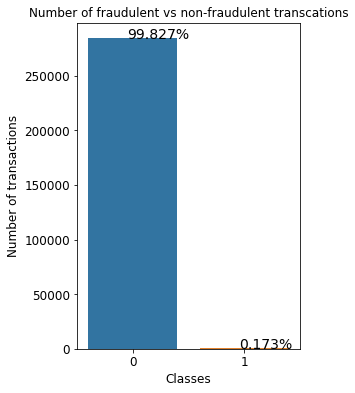

In [14]:
# Create a bar plot for the number of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(4,6))
ax = sns.countplot(x="Class", data=df)
plt.title('Number of fraudulent vs non-fraudulent transcations')
plt.xticks(size=12)
plt.xlabel('Classes',size=12)
plt.yticks(size=12)
plt.ylabel('Number of transactions',size=12)
perc_annotate(ax,df.Class)

We can see that the dataset is heavily imbalanced with 0.173% of fraudalent transactions and 99.827% of non-fraudalent transactions. Hence, we will have to balance the dataset using class balancing techniques.

<b> Creating a scatter plot to observe the distribution of classes with Time and Amount </b>

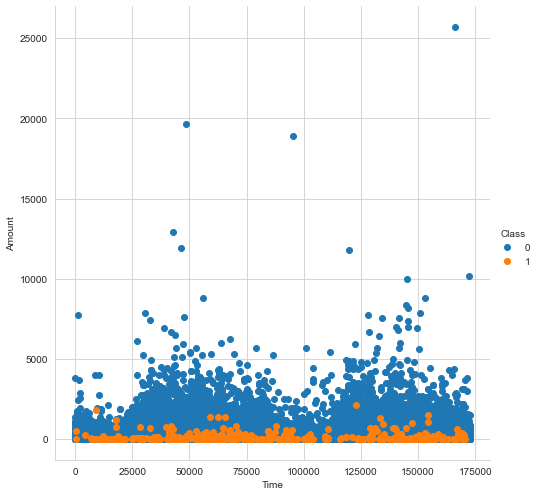

In [15]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue="Class", size = 7).map(plt.scatter, "Time", "Amount").add_legend()
plt.show()

<b> From the above scatter plot, we can make the following observations:
 - With respect to Amount, all the fraudalent transctions are restricted to amounts around or lesser than 2500
 - With respect to Time, all the fraudalent transactions seem to be following an even distribution across time </b>

#### Dropping unnecessary columns

Time column is an offset column which behaves like an index. Hence we will delete this column as it provides no additional information towards the predictive value of our final model.

In [16]:
df = df.drop(["Time"], axis=1)

### Splitting the data into train & test data

In [17]:
X = df.drop('Class', axis = 1)
y = df['Class']

We perform a stratified train test split to maintain a true representation of fraudalent and non-fraudalent transactions in both the train and test sets. This way we can ensure that the small percentage of fraudalent transactions present in the entire dataset is split in the right proportion between the train and test sets.

In [18]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, stratify = y, random_state = 100)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(227845, 29)
(227845,)
(56962, 29)
(56962,)


In [19]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
394
98


In [20]:
print('Percentage of Fraudalent Transactions in the original dataset: ' + str(round((np.sum(y)/len(df.index)) * 100, 3)))
print('Percentage of Fraudalent Transactions in the train dataset: ' + str(round((np.sum(y_train)/len(y_train))*100, 3)))
print('Percentage of Fraudalent Transactions in the test dataset: ' + str(round((np.sum(y_test)/len(y_test))*100, 3)))

Percentage of Fraudalent Transactions in the original dataset: 0.173
Percentage of Fraudalent Transactions in the train dataset: 0.173
Percentage of Fraudalent Transactions in the test dataset: 0.172


### Plotting the distribution of variables with the intention of detecting and mitigating skewness

In [21]:
# Getting all the numerical columns
num_cols = list(X_train.dtypes[df.dtypes != 'object'].index)

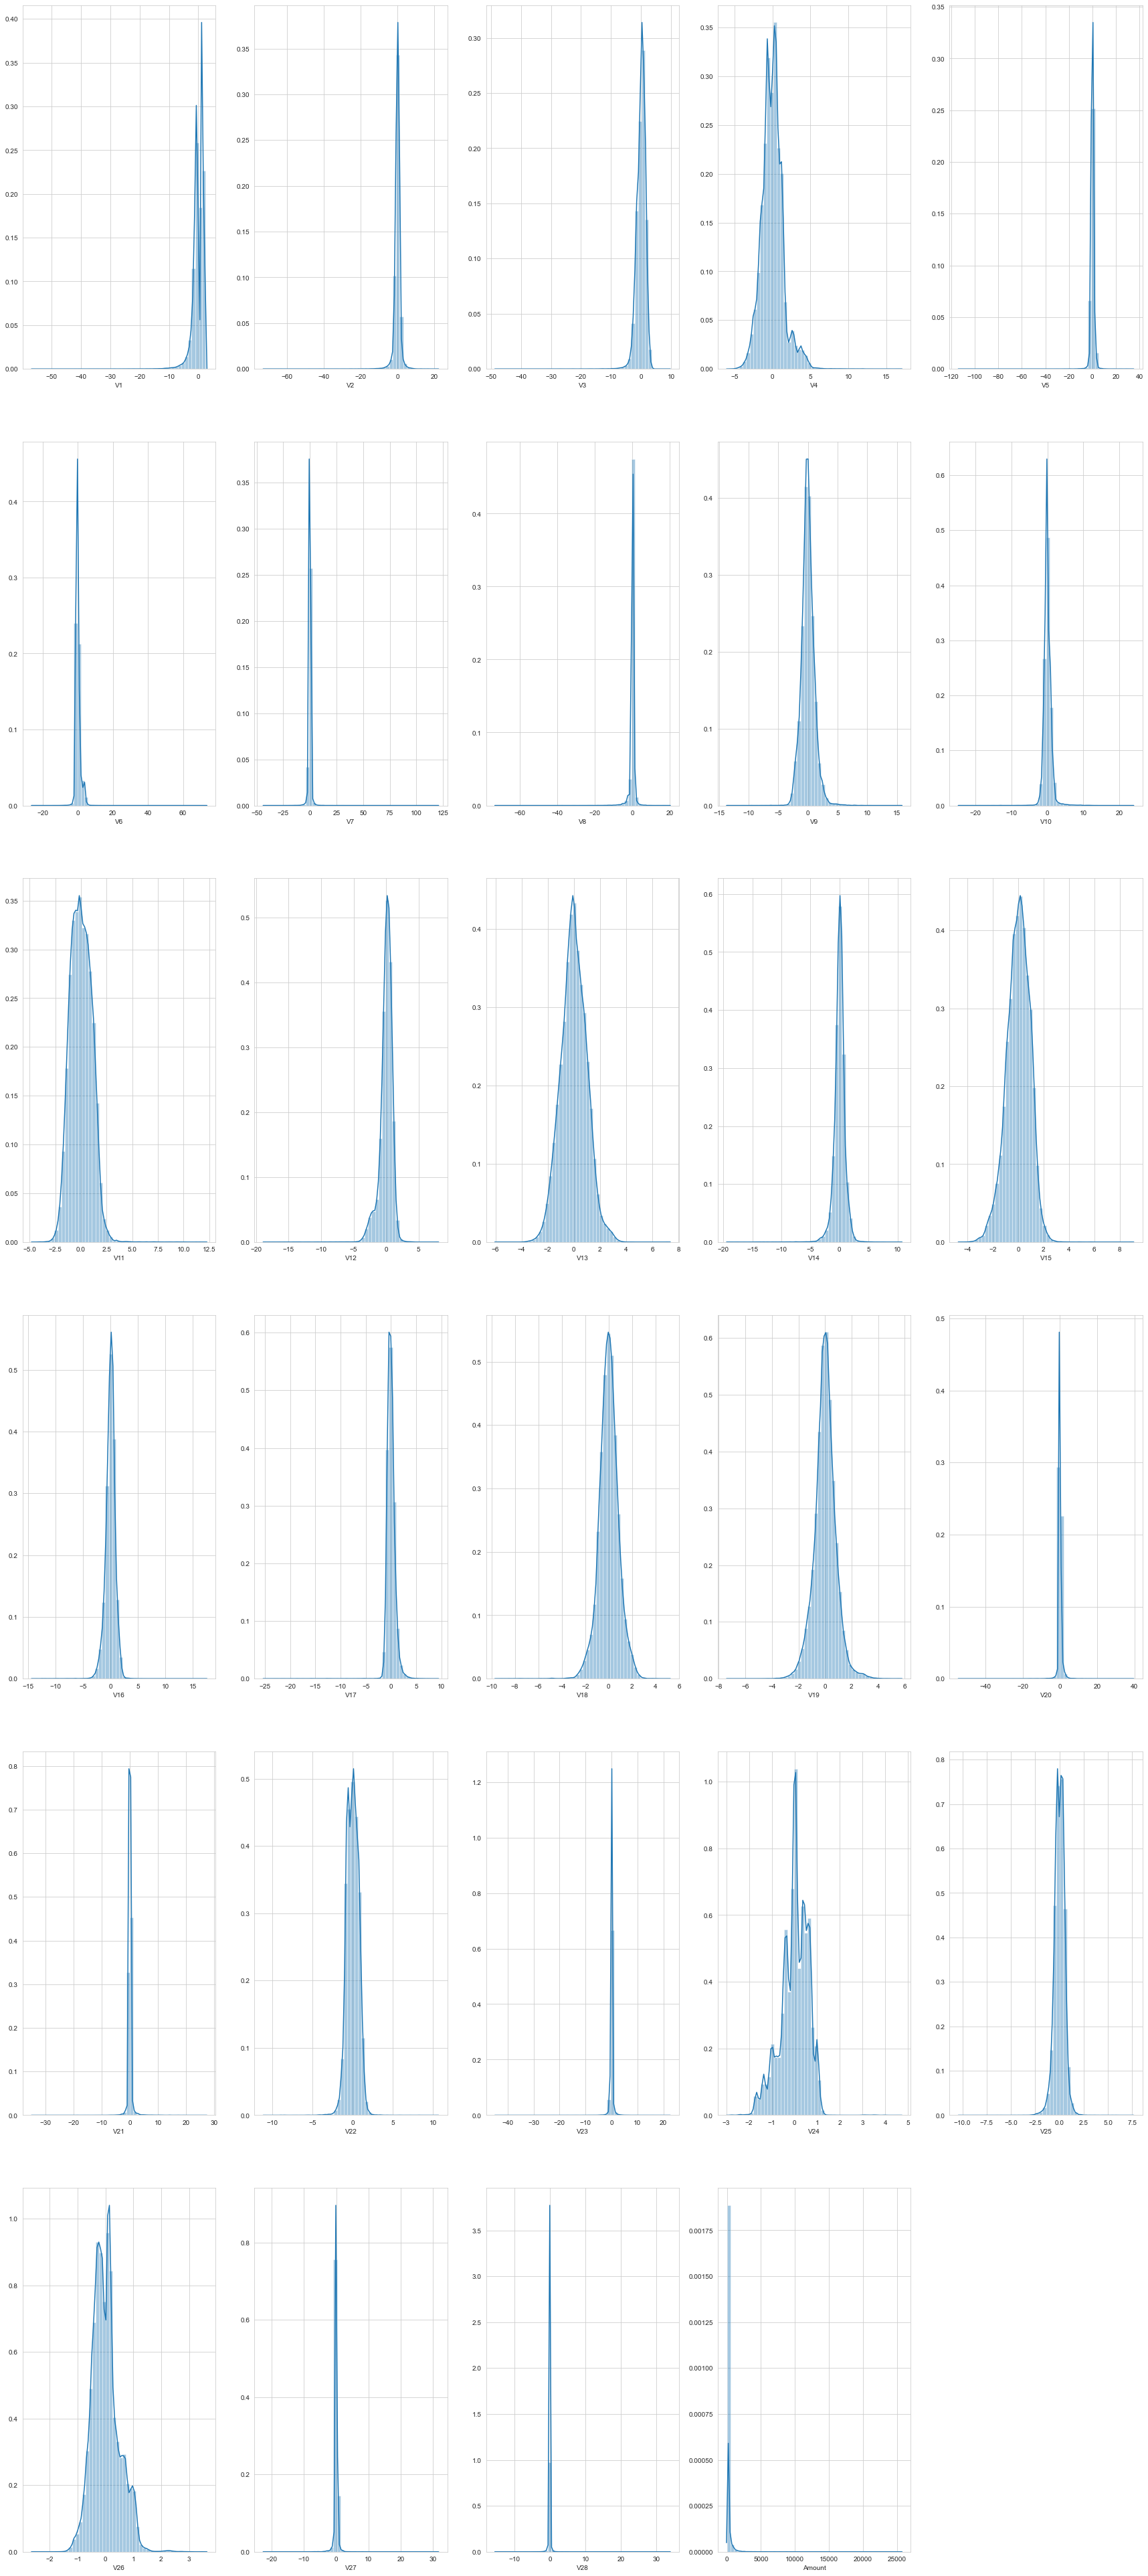

In [22]:
plt.figure(figsize=(30, 70))
i = 0
for col in num_cols:
    plt.subplot(6,5,i+1)
    sns.distplot(X_train[col])
    plt.xlabel(col)
    i = i + 1

plt.show()

<b> We can see that there is skewness present in the distribution of many of the variables. Hence, we will use the Power Transformer package present in the preprocessing library provided by sklearn to make distribution more gaussian </b> 

Since there arre negative values present, we will use the Yeo Johnson method to power transfom the variables.

In [23]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method = 'yeo-johnson', copy=False)
pt.fit(X_train)                       
X_train_pt = pt.transform(X_train)    
X_test_pt = pt.transform(X_test)

In [24]:
X_train_pt = pd.DataFrame(X_train_pt)
X_train_pt = X_train_pt.add_prefix('V')
X_train_pt.rename(columns={'V29':'Amount'},inplace=True)
X_train_pt.head()

V0        V1        V2        V3        V4        V5        V6  \
0 -0.815616  1.696579 -1.175359  0.640686  0.700124  0.049867  0.647395   
1 -0.770010  0.728662  2.125186 -0.100338  0.317321 -0.210971  1.012322   
2 -0.809096 -0.208923  0.906346 -2.592702 -0.558388 -0.127357 -0.471249   
3  0.541855 -0.547496 -0.415552 -0.382632 -0.530569 -0.634915 -0.148118   
4  1.679047 -0.848528 -1.233028 -1.132316 -0.478354 -0.772043 -0.374829   

         V7        V8        V9  ...       V19       V20       V21       V22  \
0  0.705516 -1.076441 -0.459059  ...  0.076745  0.174720  0.582792 -0.396565   
1 -0.802812  1.696790  0.028598  ...  0.453147 -0.514347 -0.070511 -0.812135   
2  0.439171 -2.353408  0.362995  ... -0.153056 -0.441519 -1.170403 -0.101305   
3 -0.169090 -1.043781  0.377780  ...  0.458559 -0.298451 -1.689489  0.025010   
4 -0.482034 -1.555210  1.460382  ... -0.448498  0.186876  1.133052 -0.127573   

        V23       V24       V25       V26       V27       V28  
0  0.117321  0.328464 -0.835820  0.480075  0.600026  0.363845  
1  0.642635  1.181690  0.561785 -1.071546 -1.560850 -0.614934  
2  0.632513  0.772026 -0.930718  0.369288  0.105728  0.371682  
3 -0.328793  0.184807 -1.484139 -0.106168  0.171249  1.175758  
4  1.412269  0.765088  0.485937 -0.119273 -0.171617  0.604400  

[5 rows x 29 columns]

In [25]:
X_test_pt = pd.DataFrame(X_test_pt)
X_test_pt = X_test_pt.add_prefix('V')
X_test_pt.rename(columns={'V29':'Amount'},inplace=True)
X_test_pt.head()

V0        V1        V2        V3        V4        V5        V6  \
0 -0.232273  1.030620 -0.453466  0.923555  0.801601 -0.663934  0.843707   
1 -0.170350 -0.014027  0.435430 -0.688790  0.837735  1.503231  0.030512   
2 -0.934431 -0.376757  1.422487  0.521792 -0.421249  0.723706 -0.640918   
3  0.647675 -0.282851  0.769980  0.288331 -0.760856 -0.076077 -0.650752   
4  0.490554 -0.122892 -0.032885  0.789254 -0.080164  0.192195 -0.028993   

         V7        V8        V9  ...       V19       V20       V21       V22  \
0 -0.189948 -0.597128 -0.863759  ...  0.309364 -0.454985 -1.147507  0.096945   
1  0.412404  0.608427 -0.536388  ... -0.144871  0.421357  1.815890 -0.236638   
2  0.736661 -1.299133  0.122137  ...  0.037213 -0.029304  0.005784 -0.110878   
3 -0.066073  2.098103 -0.687090  ... -0.137691 -0.386059 -0.631910  0.023807   
4  0.073902 -0.035358  0.217689  ... -0.106576  0.233435  0.387502 -0.302193   

        V23       V24       V25       V26       V27       V28  
0  1.524615  0.110891 -1.820225  0.644012  0.193251 -0.068559  
1 -1.424790 -0.874717 -0.432159 -0.103720 -0.704825 -0.429497  
2 -1.239178  0.537379  0.117639  0.062224 -0.240115  0.957494  
3 -0.053348  0.180715  1.823478 -0.179775  0.035784  0.058209  
4 -0.602289  1.071639 -0.472351  0.012639  0.059186  0.731202  

[5 rows x 29 columns]

#### Plotting the histogram of all the variables from the dataset again to see the result 

In [26]:
# Getting all the numerical columns
num_cols = list(X_train_pt.dtypes[X_train_pt.dtypes != 'object'].index)

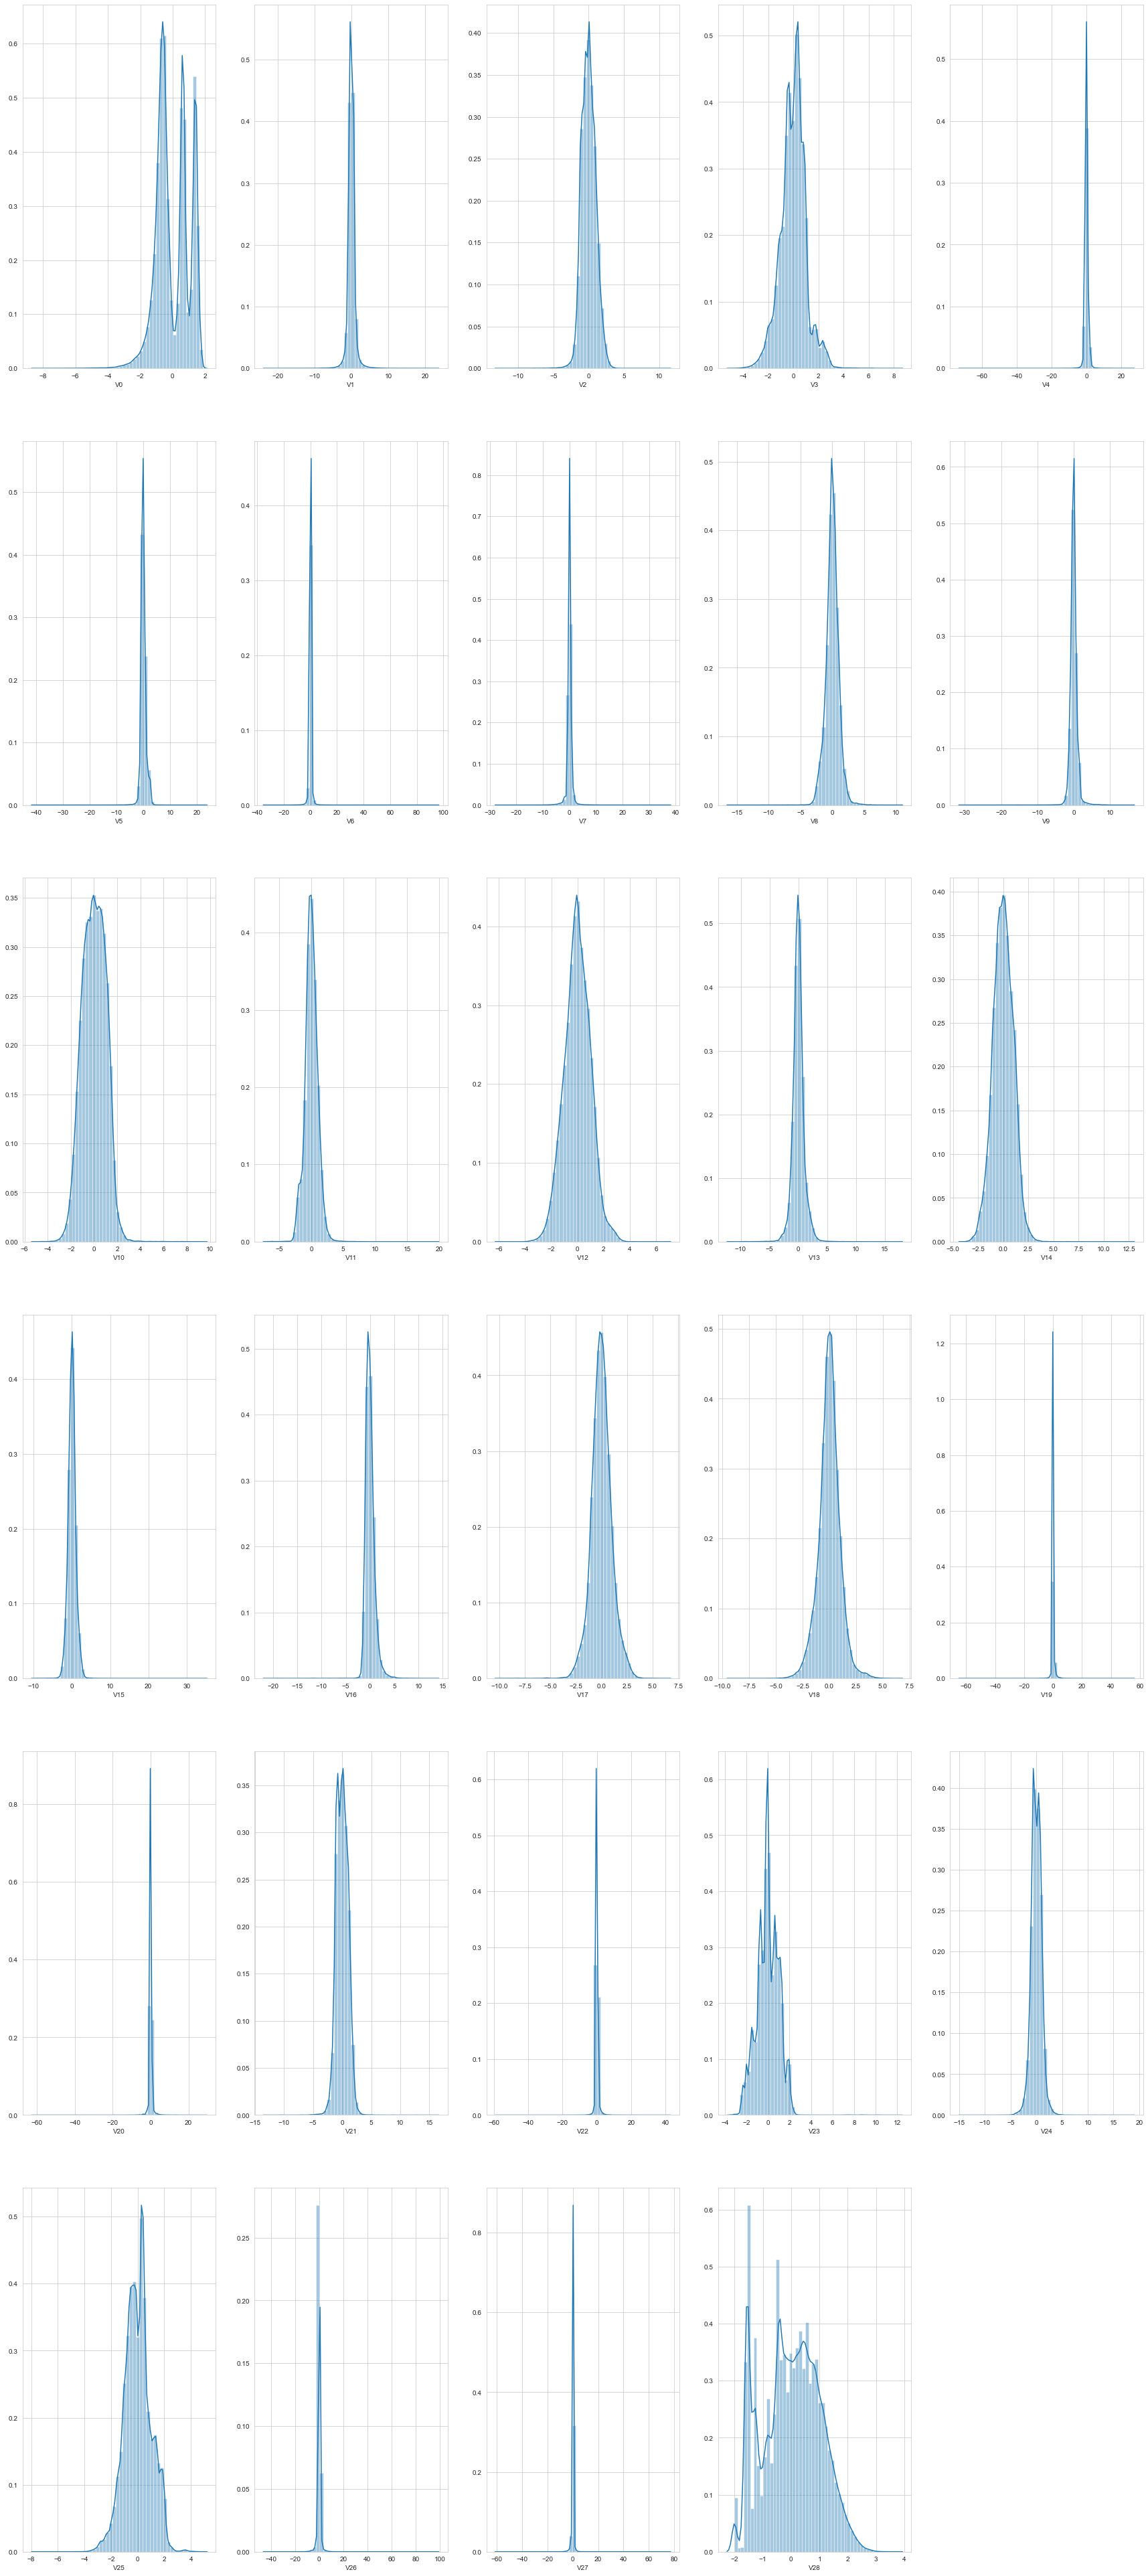

In [27]:
plt.figure(figsize=(30, 70))
i = 0
for col in num_cols:
    plt.subplot(6,5,i+1)
    sns.distplot(X_train_pt[col])
    plt.xlabel(col)
    i = i + 1

plt.show()

<b> We can see that the skewness present in the variables before the Power Transformation has been mitigated to a large extent by the Power Transformation.

## Model Building with Imbalanced Classes

<b> We will use the following models on the imbalanced dataset
 - Logisitic Regression
 - Decision Trees
 - Random Forests
 - XGBoost
    
Here we will also follow a Stratified K-Fold Cross Validation approach for hyperparameter tuning. This is to ensure that each of the folds maintain a fair representation of the fraudalent transactions.

After building these models we will evaluate the metrics for all the models on the train dataset </b>

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score

In [29]:
def ModelMetrics(y_test, y_test_pred):
    from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

    # Printing classification report
    print("********* Classification Report *********")
    print(classification_report(y_test, y_test_pred))

    # Printing confusion matrix and accuracy
    print("**** Confusion Matrix ****")
    confusion_mat = confusion_matrix(y_test, y_test_pred)
    print(confusion_mat)
    print('\n')
    
    TP = confusion_mat[1,1] # true positive 
    TN = confusion_mat[0,0] # true negatives
    FP = confusion_mat[0,1] # false positives
    FN = confusion_mat[1,0] # false negatives
    
    print("Accuracy Score: " + str(round(accuracy_score(y_test, y_test_pred), 4)))
    print("Sensitivity: " + str(round(TP/float(TP+FN), 4)))
    print("Specificity: " + str(round(TN/float(TN+FP), 4)))
    print("False Positive Rate: " + str(round(FP/float(TN+FP), 4)))
    print("Positive Predictive Value: " + str(round(TP/float(TP+FP), 4)))
    print("Negative Predictive Value: " + str(round(TN/float(TN+FN), 4)))
    precision = round(TP/float(TP+FP), 4)
    print("Precision: " + str(precision))
    recall = round(TP/float(TP+FN), 4)
    print("Recall: " + str(recall))
    F1 = round(2 * (precision*recall)/(precision+recall), 4)
    print("F1 Score: " + str(F1))

In [30]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

### Logistic Regression with Imbalanced Classes

In [31]:
from sklearn import linear_model 
from sklearn.linear_model import LogisticRegression

#### Logisitc Regression with default hyperparameters

In [32]:
lr = LogisticRegression()
lr = lr.fit(X_train_pt, y_train)

#### Predictions on the train set

In [33]:
# Making predictions
y_pred = lr.predict_proba(X_train_pt)

# Converting y_pred to a dataframe
y_pred_df = pd.DataFrame(y_pred)

# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

y_pred_1.head()

1
0  0.000474
1  0.000280
2  0.000045
3  0.000102
4  0.000758

In [34]:
# Converting y_test to dataframe
y_train_df = pd.DataFrame(y_train)
y_train_df.head()

Class
211885      0
12542       0
270932      0
30330       0
272477      0

In [35]:
# Putting TransID to index
y_train_df['TransID'] = y_train_df.index

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_train_df.reset_index(drop=True, inplace=True)

# Appending y_train_df and y_pred_1
y_pred_final = pd.concat([y_train_df,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Fraud_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['TransID','Class','Fraud_Prob'], axis=1)

y_pred_final.head()

TransID  Class  Fraud_Prob
0   211885      0    0.000474
1    12542      0    0.000280
2   270932      0    0.000045
3    30330      0    0.000102
4   272477      0    0.000758

In [36]:
# Creating new column 'predicted' with 1 if Fraud_Prob > 0.5 else 0
y_pred_final['predicted'] = y_pred_final.Fraud_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

TransID  Class  Fraud_Prob  predicted
0   211885      0    0.000474          0
1    12542      0    0.000280          0
2   270932      0    0.000045          0
3    30330      0    0.000102          0
4   272477      0    0.000758          0

In [37]:
ModelMetrics(y_pred_final.Class, y_pred_final.predicted)

********* Classification Report *********
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.88      0.68      0.76       394

   micro avg       1.00      1.00      1.00    227845
   macro avg       0.94      0.84      0.88    227845
weighted avg       1.00      1.00      1.00    227845

**** Confusion Matrix ****
[[227415     36]
 [   128    266]]


Accuracy Score: 0.9993
Sensitivity: 0.6751
Specificity: 0.9998
False Positive Rate: 0.0002
Positive Predictive Value: 0.8808
Negative Predictive Value: 0.9994
Precision: 0.8808
Recall: 0.6751
F1 Score: 0.7644


#### Logisitic Regression with hyperparameters tuning :  Tuning penalty, C and solver

In [38]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [39]:
# GridSearchCV to find optimal hyperparameters 

# specify number of folds for Stratified k-fold CV
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 42)

# parameters to build the model on
parameters = {'penalty' : ['l1', 'l2'], # l1 or l2 regularization
              'C' : np.logspace(-4, 4, 20), # size of penalty
              'solver' : ['liblinear']} # type of solver used  

# instantiate the model
logsk = LogisticRegression(random_state = 100)

# fit tree on training data
log_grid = GridSearchCV(estimator = logsk, 
                    param_grid = parameters, 
                    cv = folds, 
                    return_train_score = True,
                    scoring = "roc_auc")
log_grid.fit(X_train_pt, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
       error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=100, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([1.00000e-04, 2.63665e-04, 6.95193e-04, 1.83298e-03, 4.83293e-03,
       1.27427e-02, 3.35982e-02, 8.85867e-02, 2.33572e-01, 6.15848e-01,
       1.62378e+00, 4.28133e+00, 1.12884e+01, 2.97635e+01, 7.84760e+01,
       2.06914e+02, 5.45559e+02, 1.43845e+03, 3.79269e+03, 1.00000e+04]), 'solver': ['liblinear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [41]:
cv_results = pd.DataFrame(log_grid.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time     param_C  \
11       1.467062      0.145075         0.029004    1.412988e-03   0.0127427   
12       1.128127      0.076149         0.028003    8.166323e-04   0.0335982   
14       1.800151      0.148472         0.029337    1.886887e-03   0.0885867   
13       1.648792      0.054794         0.028003    1.946680e-07   0.0335982   
9        1.221800      0.056948         0.031338    4.027818e-03  0.00483293   

   param_penalty param_solver  \
11            l2    liblinear   
12            l1    liblinear   
14            l1    liblinear   
13            l2    liblinear   
9             l2    liblinear   

                                               params  split0_test_score  \
11  {'C': 0.012742749857031334, 'penalty': 'l2', '...           0.979486   
12  {'C': 0.03359818286283781, 'penalty': 'l1', 's...           0.981171   
14  {'C': 0.08858667904100823, 'penalty': 'l1', 's...           0.979160   
13  {'C': 0.03359818286283781, 'penalty': 'l2', 's...           0.980077   
9   {'C': 0.004832930238571752, 'penalty': 'l2', '...           0.978018   

    split1_test_score  split2_test_score  mean_test_score  std_test_score  \
11           0.983130           0.977989         0.980202        0.002159   
12           0.975304           0.983891         0.980122        0.003584   
14           0.980618           0.980578         0.980119        0.000678   
13           0.983156           0.976745         0.979993        0.002618   
9            0.981314           0.979997         0.979776        0.001355   

    rank_test_score  split0_train_score  split1_train_score  \
11                1            0.985667            0.980988   
12                2            0.982396            0.983292   
14                3            0.984152            0.982293   
13                4            0.985168            0.980954   
9                 5            0.985679            0.980855   

    split2_train_score  mean_train_score  std_train_score  
11            0.984635          0.983763         0.002007  
12            0.981210          0.982299         0.000853  
14            0.984861          0.983769         0.001083  
13            0.984824          0.983649         0.001911  
9             0.983941          0.983492         0.001995

In [42]:
log_grid.best_params_

{'C': 0.012742749857031334, 'penalty': 'l2', 'solver': 'liblinear'}

#### Fitting the final model with the best parameters obtained from grid search

In [43]:
lr = LogisticRegression(C=0.0127427, solver='liblinear', penalty='l2')
lr = lr.fit(X_train_pt, y_train)

#### Predictions on the train set

In [44]:
# Making predictions
y_pred = lr.predict_proba(X_train_pt)

# Converting y_pred to a dataframe
y_pred_df = pd.DataFrame(y_pred)

# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

y_pred_1.head()

1
0  0.003367
1  0.003087
2  0.001330
3  0.002781
4  0.002585

In [45]:
# Converting y_train to dataframe
y_train_df = pd.DataFrame(y_train)
y_train_df.head()

Class
211885      0
12542       0
270932      0
30330       0
272477      0

In [46]:
# Putting TransID to index
y_train_df['TransID'] = y_train_df.index

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_train_df.reset_index(drop=True, inplace=True)

# Appending y_train_df and y_pred_1
y_pred_final = pd.concat([y_train_df,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Fraud_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['TransID','Class','Fraud_Prob'], axis=1)

y_pred_final.head()

TransID  Class  Fraud_Prob
0   211885      0    0.003367
1    12542      0    0.003087
2   270932      0    0.001330
3    30330      0    0.002781
4   272477      0    0.002585

In [47]:
# Creating new column 'predicted' with 1 if Fraud_Prob > 0.5 else 0
y_pred_final['predicted'] = y_pred_final.Fraud_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

TransID  Class  Fraud_Prob  predicted
0   211885      0    0.003367          0
1    12542      0    0.003087          0
2   270932      0    0.001330          0
3    30330      0    0.002781          0
4   272477      0    0.002585          0

#### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced accuracy, sensitivity and specificity

In [48]:
y_pred_final.head()

TransID  Class  Fraud_Prob  predicted
0   211885      0    0.003367          0
1    12542      0    0.003087          0
2   270932      0    0.001330          0
3    30330      0    0.002781          0
4   272477      0    0.002585          0

In [49]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.Fraud_Prob.map(lambda x: 1 if x > i else 0)
y_pred_final.head()

TransID  Class  Fraud_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0   211885      0    0.003367          0    1    0    0    0    0    0    0   
1    12542      0    0.003087          0    1    0    0    0    0    0    0   
2   270932      0    0.001330          0    1    0    0    0    0    0    0   
3    30330      0    0.002781          0    1    0    0    0    0    0    0   
4   272477      0    0.002585          0    1    0    0    0    0    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0

In [50]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in num:
    cm1 = confusion_matrix(y_pred_final.Class, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.001729  1.000000  0.000000
0.1   0.1  0.999438  0.814721  0.999758
0.2   0.2  0.999443  0.786802  0.999811
0.3   0.3  0.999386  0.743655  0.999829
0.4   0.4  0.999280  0.675127  0.999842
0.5   0.5  0.999245  0.637056  0.999873
0.6   0.6  0.999184  0.598985  0.999877
0.7   0.7  0.999105  0.548223  0.999886
0.8   0.8  0.999021  0.500000  0.999886
0.9   0.9  0.998868  0.408629  0.999890


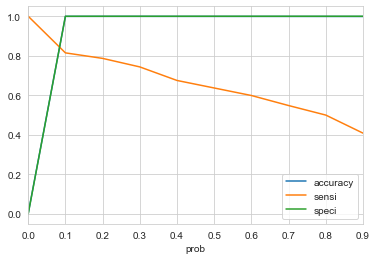

In [51]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], grid = True)
plt.show()

From the curve above, we will take 0.09 as the optimum cutoff probability.

In [52]:
y_pred_final['final_predicted'] = y_pred_final.Fraud_Prob.map( lambda x: 1 if x > 0.09 else 0)

y_pred_final.head()

TransID  Class  Fraud_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0   211885      0    0.003367          0    1    0    0    0    0    0    0   
1    12542      0    0.003087          0    1    0    0    0    0    0    0   
2   270932      0    0.001330          0    1    0    0    0    0    0    0   
3    30330      0    0.002781          0    1    0    0    0    0    0    0   
4   272477      0    0.002585          0    1    0    0    0    0    0    0   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    0    0    0                0  
2    0    0    0                0  
3    0    0    0                0  
4    0    0    0                0

#### Metrics Analysis on the train set for Logisitic Regression Model

In [53]:
ModelMetrics(y_pred_final.Class, y_pred_final.final_predicted)

********* Classification Report *********
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.85      0.82      0.83       394

   micro avg       1.00      1.00      1.00    227845
   macro avg       0.92      0.91      0.92    227845
weighted avg       1.00      1.00      1.00    227845

**** Confusion Matrix ****
[[227394     57]
 [    72    322]]


Accuracy Score: 0.9994
Sensitivity: 0.8173
Specificity: 0.9997
False Positive Rate: 0.0003
Positive Predictive Value: 0.8496
Negative Predictive Value: 0.9997
Precision: 0.8496
Recall: 0.8173
F1 Score: 0.8331


#### Plotting the ROC Curve for the Train Dataset

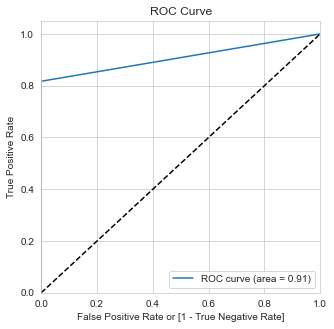

In [54]:
draw_roc(y_pred_final.Class, y_pred_final.final_predicted)

### Decision Tree with Imbalanced Classes

In [55]:
from sklearn.tree import DecisionTreeClassifier

#### Decision tree with default hyperparameters

In [56]:
fraud_tree = DecisionTreeClassifier(max_depth = 10)
fraud_tree.fit(X_train_pt, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [57]:
# Making predictions
y_train_pred = fraud_tree.predict(X_train_pt)

In [58]:
ModelMetrics(y_train, y_train_pred)

********* Classification Report *********
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      0.88      0.93       394

   micro avg       1.00      1.00      1.00    227845
   macro avg       1.00      0.94      0.97    227845
weighted avg       1.00      1.00      1.00    227845

**** Confusion Matrix ****
[[227451      0]
 [    49    345]]


Accuracy Score: 0.9998
Sensitivity: 0.8756
Specificity: 1.0
False Positive Rate: 0.0
Positive Predictive Value: 1.0
Negative Predictive Value: 0.9998
Precision: 1.0
Recall: 0.8756
F1 Score: 0.9337


#### Decision tree with hyperparameters tuning : Tuning max_depth

In [59]:
# GridSearchCV to find optimal max_depth

# specify number of folds for Stratified k-fold CV
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 42)

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", random_state = 100)

# fit tree on training data
tree = GridSearchCV(estimator = dtree, 
                    param_grid = parameters, 
                    cv = folds, 
                    return_train_score = True,
                    scoring = "roc_auc")
tree.fit(X_train_pt, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
       error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(1, 40)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='roc_auc', verbose=0)

In [60]:
cv_results = pd.DataFrame(tree.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
3        3.075860      0.218249         0.027003        0.002161   
2        2.448973      0.127772         0.037685        0.007610   
17      10.716000      1.389402         0.029330        0.000475   
18      10.647701      1.565307         0.028336        0.000471   
20      10.737431      1.612410         0.028001        0.000818   

   param_max_depth             params  split0_test_score  split1_test_score  \
3                4   {'max_depth': 4}           0.893771           0.908245   
2                3   {'max_depth': 3}           0.889930           0.912052   
17              18  {'max_depth': 18}           0.890133           0.861801   
18              19  {'max_depth': 19}           0.885749           0.862378   
20              21  {'max_depth': 21}           0.877096           0.862404   

    split2_test_score  mean_test_score  std_test_score  rank_test_score  \
3            0.927350         0.909789        0.013752                1   
2            0.923501         0.908494        0.013934                2   
17           0.916477         0.889471        0.022326                3   
18           0.918058         0.888728        0.022828                4   
20           0.918054         0.885852        0.023548                5   

    split0_train_score  split1_train_score  split2_train_score  \
3             0.923565            0.925740            0.912450   
2             0.921605            0.921912            0.908578   
17            0.998966            0.999986            0.999263   
18            0.999638            0.999999            0.999901   
20            0.999979            1.000000            0.999965   

    mean_train_score  std_train_score  
3           0.920585         0.005820  
2           0.917365         0.006215  
17          0.999405         0.000428  
18          0.999846         0.000153  
20          0.999981         0.000014

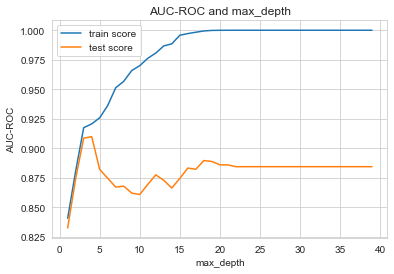

In [61]:
# plotting mean test and train scores with max_depth 
plt.figure(figsize= [6, 4])

plt.plot(cv_results['param_max_depth'], cv_results['mean_train_score'])
plt.plot(cv_results['param_max_depth'], cv_results['mean_test_score'])
plt.xlabel('max_depth')
plt.ylabel('AUC-ROC')
plt.title("AUC-ROC and max_depth")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### Decision tree with hyperparameters tuning : Tuning min_samples_leaf

In [62]:
# GridSearchCV to find optimal min_samples_leaf

# specify number of folds for Stratified k-fold CV
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 42)

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", random_state = 100)

# fit tree on training data
tree = GridSearchCV(estimator = dtree, 
                    param_grid = parameters, 
                    cv = folds, 
                    return_train_score = True,
                    scoring = "roc_auc")
tree.fit(X_train_pt, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
       error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [63]:
cv_results = pd.DataFrame(tree.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
6       7.635696      0.402347         0.027670        0.000473   
8       7.294961      0.291608         0.029336        0.002626   
7       7.276337      0.378648         0.027002        0.000001   
2       9.735532      1.328269         0.031336        0.002054   
9       7.156178      0.466349         0.033003        0.004319   

  param_min_samples_leaf                     params  split0_test_score  \
6                    125  {'min_samples_leaf': 125}           0.926285   
8                    165  {'min_samples_leaf': 165}           0.922114   
7                    145  {'min_samples_leaf': 145}           0.922429   
2                     45   {'min_samples_leaf': 45}           0.923178   
9                    185  {'min_samples_leaf': 185}           0.922094   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
6           0.941077           0.952800         0.940054        0.010849   
8           0.944680           0.952347         0.939714        0.012832   
7           0.944886           0.944883         0.937399        0.010586   
2           0.938266           0.945799         0.935748        0.009405   
9           0.936943           0.944478         0.934505        0.009299   

   rank_test_score  split0_train_score  split1_train_score  \
6                1            0.998877            0.998673   
8                2            0.998467            0.998283   
7                3            0.998681            0.998455   
2                4            0.999257            0.999338   
9                5            0.998471            0.998381   

   split2_train_score  mean_train_score  std_train_score  
6            0.998617          0.998722         0.000111  
8            0.998174          0.998308         0.000121  
7            0.998384          0.998507         0.000127  
2            0.999289          0.999295         0.000033  
9            0.998084          0.998312         0.000165

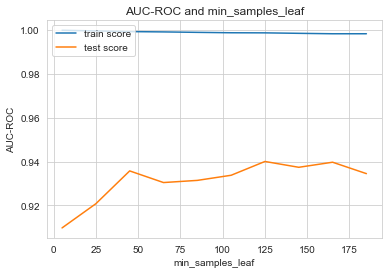

In [64]:
# plotting mean test and train scores with min_samples_leaf
plt.figure(figsize= [6, 4])

plt.plot(cv_results['param_min_samples_leaf'], cv_results['mean_train_score'])
plt.plot(cv_results['param_min_samples_leaf'], cv_results['mean_test_score'])
plt.xlabel('min_samples_leaf')
plt.ylabel('AUC-ROC')
plt.title("AUC-ROC and min_samples_leaf")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### Decision tree with hyperparameters tuning : Tuning min_samples_split

In [65]:
# GridSearchCV to find optimal min_samples_split

# specify number of folds for Stratified k-fold CV
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 42)

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", random_state = 100)

# fit tree on training data
tree = GridSearchCV(estimator = dtree, 
                    param_grid = parameters, 
                    cv = folds, 
                    return_train_score = True,
                    scoring = "roc_auc")
tree.fit(X_train_pt, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
       error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [66]:
cv_results = pd.DataFrame(tree.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
8      10.842819      1.681091         0.036005        0.004083   
9      10.753198      1.438758         0.029336        0.000943   
5      11.926797      2.262882         0.031337        0.001248   
6      12.058367      1.675728         0.032683        0.003697   
7      10.964821      1.822492         0.029003        0.002159   

  param_min_samples_split                      params  split0_test_score  \
8                     165  {'min_samples_split': 165}           0.911895   
9                     185  {'min_samples_split': 185}           0.911895   
5                     105  {'min_samples_split': 105}           0.912198   
6                     125  {'min_samples_split': 125}           0.912088   
7                     145  {'min_samples_split': 145}           0.911895   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
8           0.919142           0.949608         0.926882        0.016340   
9           0.919142           0.949571         0.926869        0.016323   
5           0.907765           0.949867         0.923276        0.018889   
6           0.907800           0.949740         0.923210        0.018841   
7           0.907620           0.949673         0.923063        0.018897   

   rank_test_score  split0_train_score  split1_train_score  \
8                1            0.999696            0.999675   
9                2            0.999696            0.999675   
5                3            0.999790            0.999806   
6                4            0.999747            0.999744   
7                5            0.999696            0.999697   

   split2_train_score  mean_train_score  std_train_score  
8            0.999538          0.999636         0.000070  
9            0.999472          0.999614         0.000101  
5            0.999765          0.999787         0.000017  
6            0.999656          0.999716         0.000042  
7            0.999572          0.999655         0.000059

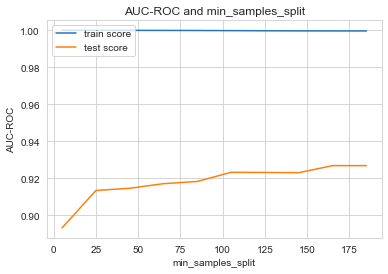

In [67]:
# plotting mean test and train scores with min_samples_split
plt.figure(figsize= [6, 4])

plt.plot(cv_results['param_min_samples_split'], cv_results['mean_train_score'])
plt.plot(cv_results['param_min_samples_split'], cv_results['mean_test_score'])
plt.xlabel('min_samples_split')
plt.ylabel('AUC-ROC')
plt.title("AUC-ROC and min_samples_split")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### Fitting the final model with the best parameters obtained from grid search

In [68]:
# model with optimal hyperparameters
tree_final = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=4, 
                                  min_samples_leaf=125,
                                  min_samples_split=165)
tree_final.fit(X_train_pt, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=125, min_samples_split=165,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

#### Predictions on the train set

In [69]:
y_train_pred = tree_final.predict(X_train_pt)

#### Metrics Analysis on the train set for Decision Tree

In [70]:
ModelMetrics(y_train, y_train_pred)

********* Classification Report *********
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.77      0.69      0.73       394

   micro avg       1.00      1.00      1.00    227845
   macro avg       0.89      0.85      0.86    227845
weighted avg       1.00      1.00      1.00    227845

**** Confusion Matrix ****
[[227370     81]
 [   121    273]]


Accuracy Score: 0.9991
Sensitivity: 0.6929
Specificity: 0.9996
False Positive Rate: 0.0004
Positive Predictive Value: 0.7712
Negative Predictive Value: 0.9995
Precision: 0.7712
Recall: 0.6929
F1 Score: 0.73


#### Plotting the ROC Curve for the Train Dataset

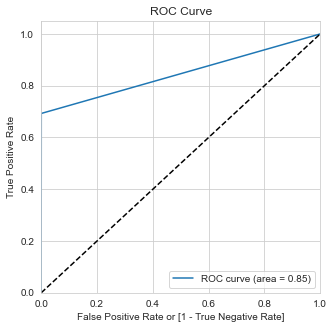

In [71]:
draw_roc(y_train, y_train_pred)

### Random Forest with Imbalanced Classes

In [72]:
from sklearn.ensemble import RandomForestClassifier

#### Random Forest with default hyperparameters

In [73]:
fraud_forest = RandomForestClassifier(max_depth = 5)
fraud_forest.fit(X_train_pt, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [74]:
# Making predictions
y_train_pred = fraud_forest.predict(X_train_pt)

In [75]:
ModelMetrics(y_train, y_train_pred)

********* Classification Report *********
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.96      0.76      0.85       394

   micro avg       1.00      1.00      1.00    227845
   macro avg       0.98      0.88      0.92    227845
weighted avg       1.00      1.00      1.00    227845

**** Confusion Matrix ****
[[227439     12]
 [    96    298]]


Accuracy Score: 0.9995
Sensitivity: 0.7563
Specificity: 0.9999
False Positive Rate: 0.0001
Positive Predictive Value: 0.9613
Negative Predictive Value: 0.9996
Precision: 0.9613
Recall: 0.7563
F1 Score: 0.8466


#### Random forest with hyperparameters tuning : Tuning max_depth

In [76]:
# GridSearchCV to find optimal max_depth

# specify number of folds for Stratified k-fold CV
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 42)

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier(criterion = "gini", random_state = 100)

# fit random forest on training data
rf = GridSearchCV(estimator = rf, 
                    param_grid = parameters, 
                    cv = folds, 
                    return_train_score = True,
                    scoring = "roc_auc")
rf.fit(X_train_pt, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(2, 20, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='roc_auc', verbose=0)

In [77]:
cv_results = pd.DataFrame(rf.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
2       9.760567      0.150945         0.090399        0.009051   
3      12.124208      0.263814         0.105008        0.006481   
1       5.915041      0.094065         0.078006        0.007483   
0       1.965859      0.020834         0.062341        0.000945   

  param_max_depth             params  split0_test_score  split1_test_score  \
2              12  {'max_depth': 12}           0.955680           0.961335   
3              17  {'max_depth': 17}           0.945688           0.944211   
1               7   {'max_depth': 7}           0.953263           0.953106   
0               2   {'max_depth': 2}           0.889061           0.906468   

   split2_test_score  mean_test_score  std_test_score  rank_test_score  \
2           0.974017         0.963677        0.007667                1   
3           0.976977         0.955625        0.015110                2   
1           0.936552         0.947640        0.007841                3   
0           0.930075         0.908535        0.016807                4   

   split0_train_score  split1_train_score  split2_train_score  \
2            0.994111            0.996555            0.998202   
3            0.999968            0.999996            0.999990   
1            0.976391            0.977462            0.956449   
0            0.909265            0.920389            0.905205   

   mean_train_score  std_train_score  
2          0.996289         0.001681  
3          0.999984         0.000012  
1          0.970101         0.009663  
0          0.911619         0.006419

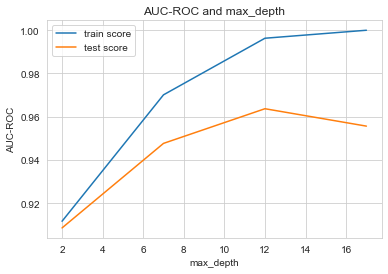

In [78]:
# plotting mean test and train scores with max_depth 
plt.figure(figsize= [6, 4])

plt.plot(cv_results['param_max_depth'], cv_results['mean_train_score'])
plt.plot(cv_results['param_max_depth'], cv_results['mean_test_score'])
plt.xlabel('max_depth')
plt.ylabel('AUC-ROC')
plt.title("AUC-ROC and max_depth")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### Random Forest with hyperparameters tuning : Tuning n_estimators

In [79]:
# GridSearchCV to find optimal n_estimators

# specify number of folds for Stratified k-fold CV
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 42)

# parameters to build the model on
parameters = {'n_estimators': range(100, 500, 100)}

# instantiate the model
rf = RandomForestClassifier(criterion = "gini", random_state = 100, max_depth=4)

# fit random forest on training data
rf = GridSearchCV(estimator = rf, 
                    param_grid = parameters, 
                    cv = folds, 
                    return_train_score = True,
                    scoring = "roc_auc")
rf.fit(X_train_pt, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': range(100, 500, 100)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [80]:
cv_results = pd.DataFrame(rf.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      34.473192      0.234541         0.494218        0.035284   
3     139.564886      4.794595         1.923024        0.187859   
1      68.639903      0.134844         0.941590        0.031074   
2     103.626534      0.340454         1.403651        0.061594   

  param_n_estimators                 params  split0_test_score  \
0                100  {'n_estimators': 100}           0.949452   
3                400  {'n_estimators': 400}           0.948915   
1                200  {'n_estimators': 200}           0.947282   
2                300  {'n_estimators': 300}           0.945980   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.976029           0.969011         0.964831        0.011245   
3           0.975416           0.968927         0.964419        0.011278   
1           0.976929           0.968487         0.964233        0.012472   
2           0.975776           0.968298         0.963351        0.012657   

   rank_test_score  split0_train_score  split1_train_score  \
0                1            0.974429            0.970529   
3                2            0.978252            0.972457   
1                3            0.976428            0.970375   
2                4            0.977328            0.970514   

   split2_train_score  mean_train_score  std_train_score  
0            0.962982          0.969314         0.004752  
3            0.974036          0.974915         0.002446  
1            0.962455          0.969753         0.005722  
2            0.971142          0.972995         0.003075

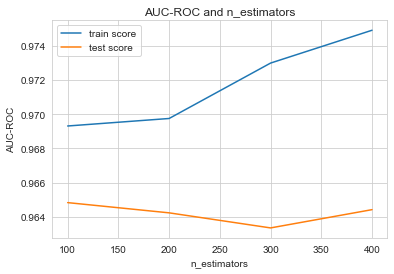

In [81]:
# plotting mean test and train scores with n_estimators
plt.figure(figsize= [6, 4])

plt.plot(cv_results['param_n_estimators'], cv_results['mean_train_score'])
plt.plot(cv_results['param_n_estimators'], cv_results['mean_test_score'])
plt.xlabel('n_estimators')
plt.ylabel('AUC-ROC')
plt.title("AUC-ROC and n_estimators")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### Random Forest with hyperparameters tuning : Tuning max_features

In [82]:
# GridSearchCV to find optimal max_features

# specify number of folds for Stratified k-fold CV
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 42)

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(criterion = "gini", random_state = 100, max_depth=4)

# fit random forest on training data
rf = GridSearchCV(estimator = rf, 
                    param_grid = parameters, 
                    cv = folds, 
                    return_train_score = True,
                    scoring = "roc_auc")
rf.fit(X_train_pt, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_features': [4, 8, 14, 20, 24]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [83]:
cv_results = pd.DataFrame(rf.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
1       5.444398      0.140861         0.070340        0.007760   
0       2.919532      0.085135         0.067338        0.006127   
3      12.997585      0.089478         0.076660        0.005257   
2       9.203808      0.138787         0.066672        0.006130   
4      15.355399      0.103990         0.070336        0.007838   

  param_max_features                params  split0_test_score  \
1                  8   {'max_features': 8}           0.951747   
0                  4   {'max_features': 4}           0.950340   
3                 20  {'max_features': 20}           0.912541   
2                 14  {'max_features': 14}           0.914160   
4                 24  {'max_features': 24}           0.912551   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
1           0.963450           0.955140         0.956779        0.004916   
0           0.942813           0.957201         0.950118        0.005876   
3           0.943388           0.938636         0.931521        0.013561   
2           0.919588           0.935052         0.922933        0.008851   
4           0.915856           0.938758         0.922388        0.011653   

   rank_test_score  split0_train_score  split1_train_score  \
1                1            0.959492            0.961776   
0                2            0.972706            0.948712   
3                3            0.938666            0.949727   
2                4            0.942530            0.931321   
4                5            0.936763            0.927617   

   split2_train_score  mean_train_score  std_train_score  
1            0.945012          0.955427         0.007423  
0            0.954021          0.958480         0.010290  
3            0.919790          0.936061         0.012360  
2            0.923841          0.932564         0.007680  
4            0.918034          0.927471         0.007647

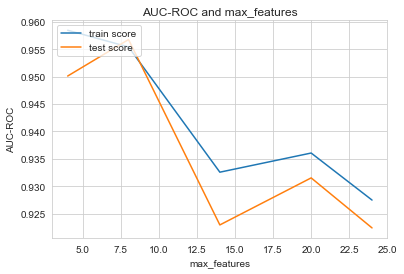

In [84]:
# plotting mean test and train scores with max_features
plt.figure(figsize= [6, 4])

plt.plot(cv_results['param_max_features'], cv_results['mean_train_score'])
plt.plot(cv_results['param_max_features'], cv_results['mean_test_score'])
plt.xlabel('max_features')
plt.ylabel('AUC-ROC')
plt.title("AUC-ROC and max_features")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### Random forest with hyperparameters tuning : Tuning min_samples_leaf

In [85]:
# GridSearchCV to find optimal min_samples_leaf

# specify number of folds for Stratified k-fold CV
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 42)

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(criterion = "gini", random_state = 100)

# fit random forest on training data
rf = GridSearchCV(estimator = rf, 
                    param_grid = parameters, 
                    cv = folds, 
                    return_train_score = True,
                    scoring = "roc_auc")
rf.fit(X_train_pt, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': range(100, 400, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [86]:
cv_results = pd.DataFrame(rf.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
2      10.490325      0.149190         0.097287        0.003070   
5       8.864458      0.501812         0.094663        0.008174   
0      11.395169      0.874900         0.097340        0.005250   
1      10.454173      0.369833         0.096507        0.003893   
3       9.506060      0.292240         0.092341        0.003772   

  param_min_samples_leaf                     params  split0_test_score  \
2                    200  {'min_samples_leaf': 200}           0.966049   
5                    350  {'min_samples_leaf': 350}           0.967155   
0                    100  {'min_samples_leaf': 100}           0.961294   
1                    150  {'min_samples_leaf': 150}           0.951468   
3                    250  {'min_samples_leaf': 250}           0.958673   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
2           0.970602           0.971657         0.969436        0.002433   
5           0.971921           0.969069         0.969382        0.001958   
0           0.974106           0.967306         0.967569        0.005234   
1           0.971465           0.977773         0.966902        0.011213   
3           0.966384           0.972986         0.966014        0.005849   

   rank_test_score  split0_train_score  split1_train_score  \
2                1            0.996046            0.995950   
5                2            0.993675            0.994131   
0                3            0.997685            0.997787   
1                4            0.996742            0.996717   
3                5            0.995382            0.995277   

   split2_train_score  mean_train_score  std_train_score  
2            0.995390          0.995795         0.000289  
5            0.993329          0.993712         0.000328  
0            0.997437          0.997636         0.000147  
1            0.996504          0.996654         0.000107  
3            0.994619          0.995093         0.000338

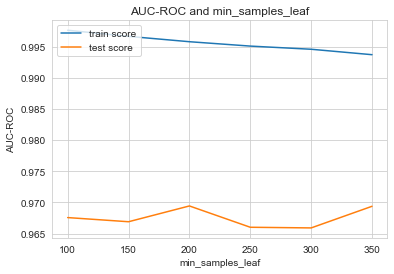

In [87]:
# plotting mean test and train scores with min_samples_leaf
plt.figure(figsize= [6, 4])

plt.plot(cv_results['param_min_samples_leaf'], cv_results['mean_train_score'])
plt.plot(cv_results['param_min_samples_leaf'], cv_results['mean_test_score'])
plt.xlabel('min_samples_leaf')
plt.ylabel('AUC-ROC')
plt.title("AUC-ROC and min_samples_leaf")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### Random forest with hyperparameters tuning : Tuning min_samples_split

In [88]:
# GridSearchCV to find optimal min_samples_split

# specify number of folds for Stratified k-fold CV
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 42)

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(criterion = "gini", random_state = 100)

# fit random forest on training data
rf = GridSearchCV(estimator = rf, 
                    param_grid = parameters, 
                    cv = folds, 
                    return_train_score = True,
                    scoring = "roc_auc")
rf.fit(X_train_pt, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(200, 500, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [89]:
cv_results = pd.DataFrame(rf.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
5      12.479426      0.662167         0.104340        0.004190   
3      14.230398      0.603632         0.249021        0.189182   
4      12.860532      0.815242         0.103006        0.006481   
2      14.212406      0.773542         0.109334        0.003294   
1      13.836555      0.320079         0.104335        0.004789   

  param_min_samples_split                      params  split0_test_score  \
5                     450  {'min_samples_split': 450}           0.949231   
3                     350  {'min_samples_split': 350}           0.946412   
4                     400  {'min_samples_split': 400}           0.945532   
2                     300  {'min_samples_split': 300}           0.942930   
1                     250  {'min_samples_split': 250}           0.936234   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
5           0.973852           0.967179         0.963421        0.010397   
3           0.973061           0.968047         0.962507        0.011563   
4           0.973226           0.967963         0.962240        0.012009   
2           0.962687           0.968680         0.958099        0.011002   
1           0.963016           0.973178         0.957476        0.015582   

   rank_test_score  split0_train_score  split1_train_score  \
5                1            0.999080            0.999160   
3                2            0.999199            0.999086   
4                3            0.999143            0.999236   
2                4            0.999325            0.999239   
1                5            0.999377            0.999304   

   split2_train_score  mean_train_score  std_train_score  
5            0.999221          0.999154         0.000058  
3            0.999267          0.999184         0.000075  
4            0.999203          0.999194         0.000038  
2            0.999271          0.999278         0.000035  
1            0.999318          0.999333         0.000032

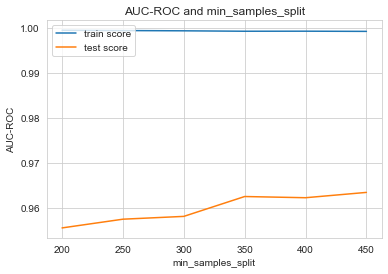

In [90]:
# plotting mean test and train scores with min_samples_split
plt.figure(figsize= [6, 4])

plt.plot(cv_results['param_min_samples_split'], cv_results['mean_train_score'])
plt.plot(cv_results['param_min_samples_split'], cv_results['mean_test_score'])
plt.xlabel('min_samples_split')
plt.ylabel('AUC-ROC')
plt.title("AUC-ROC and min_samples_split")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### Fitting the final model with the best parameters obtained from grid search

In [91]:
# model with optimal hyperparameters
rf_final = RandomForestClassifier(bootstrap=True,
                                     max_depth=12,
                                     min_samples_leaf=200, 
                                     min_samples_split=450,
                                     max_features=8,
                                     n_estimators=100,
                                     criterion = "gini", 
                                    random_state = 100)
rf_final.fit(X_train_pt, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features=8, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=200, min_samples_split=450,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

#### Predictions on the train set

In [92]:
y_train_pred = rf_final.predict(X_train_pt)

#### Metrics Analysis on the train set for Random Forest

In [93]:
ModelMetrics(y_train, y_train_pred)

********* Classification Report *********
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.85      0.54      0.66       394

   micro avg       1.00      1.00      1.00    227845
   macro avg       0.93      0.77      0.83    227845
weighted avg       1.00      1.00      1.00    227845

**** Confusion Matrix ****
[[227415     36]
 [   182    212]]


Accuracy Score: 0.999
Sensitivity: 0.5381
Specificity: 0.9998
False Positive Rate: 0.0002
Positive Predictive Value: 0.8548
Negative Predictive Value: 0.9992
Precision: 0.8548
Recall: 0.5381
F1 Score: 0.6604


#### Plotting the ROC Curve for the Train Dataset

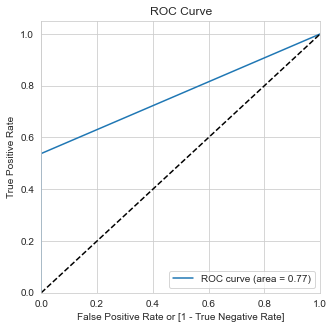

In [94]:
draw_roc(y_train, y_train_pred)

### XGBoost with Imbalanced Classes

In [95]:
from xgboost import XGBClassifier
import xgboost as xgb

#### XGBoost with default hyperparameters

In [96]:
fraud_xgboost = XGBClassifier()
fraud_xgboost.fit(X_train_pt, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
       validate_parameters=False, verbosity=None)

In [97]:
# Making predictions
y_train_pred = fraud_xgboost.predict(X_train_pt)

In [98]:
ModelMetrics(y_train, y_train_pred)

********* Classification Report *********
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

   micro avg       1.00      1.00      1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845

**** Confusion Matrix ****
[[227451      0]
 [     0    394]]


Accuracy Score: 1.0
Sensitivity: 1.0
Specificity: 1.0
False Positive Rate: 0.0
Positive Predictive Value: 1.0
Negative Predictive Value: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


#### XGBoost with hyperparameters tuning : Tuning max_depth

In [99]:
# GridSearchCV to find optimal max_depth

# specify number of folds for Stratified k-fold CV
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 42)

# parameters to build the model on
parameters = {'max_depth' : range(3,10,2)}

# instantiate the model
xgb_model = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=5,
                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

# fit the model on training data
xgb = GridSearchCV(estimator = xgb_model, 
                    param_grid = parameters, 
                    cv = folds, 
                    return_train_score = True,
                    scoring = "roc_auc")
xgb.fit(X_train_pt, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
       error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=0.8, gamma=0, gpu_id=None,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.1, max_delta_step=None, max_depth=5,
       min_child_weight=1,...eight=1, seed=27, subsample=0.8,
       tree_method=None, validate_parameters=False, verbosity=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(3, 10, 2)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='roc_auc', verbose=0)

In [100]:
cv_results = pd.DataFrame(xgb.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
2      28.060480      0.329545         0.244019        0.004324   
1      24.393911      0.148201         0.222683        0.003092   
3      32.920002      0.993104         0.261019        0.002160   
0      17.643159      0.119865         0.201350        0.005248   

  param_max_depth            params  split0_test_score  split1_test_score  \
2               7  {'max_depth': 7}           0.974922           0.989181   
1               5  {'max_depth': 5}           0.976741           0.988433   
3               9  {'max_depth': 9}           0.973559           0.988374   
0               3  {'max_depth': 3}           0.970622           0.988141   

   split2_test_score  mean_test_score  std_test_score  rank_test_score  \
2           0.982107         0.982070        0.005821                1   
1           0.980957         0.982044        0.004834                2   
3           0.980509         0.980814        0.006052                3   
0           0.981423         0.980062        0.007217                4   

   split0_train_score  split1_train_score  split2_train_score  \
2            1.000000            1.000000             1.00000   
1            0.999999            1.000000             1.00000   
3            1.000000            1.000000             1.00000   
0            0.999609            0.999748             0.99985   

   mean_train_score  std_train_score  
2          1.000000     2.364130e-08  
1          1.000000     2.336577e-07  
3          1.000000     2.364130e-08  
0          0.999736     9.875590e-05

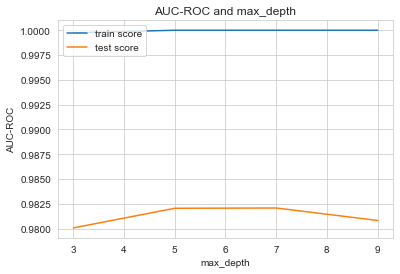

In [101]:
# plotting mean test and train scores with max_depth 
plt.figure(figsize= [6, 4])

plt.plot(cv_results['param_max_depth'], cv_results['mean_train_score'])
plt.plot(cv_results['param_max_depth'], cv_results['mean_test_score'])
plt.xlabel('max_depth')
plt.ylabel('AUC-ROC')
plt.title("AUC-ROC and max_depth")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### XGBoost with hyperparameters tuning : Tuning min_child_weight

In [102]:
# GridSearchCV to find optimal min_child_weight

# specify number of folds for Stratified k-fold CV
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 42)

# parameters to build the model on
parameters = {'min_child_weight':range(1,6,2)}

# instantiate the model
xgb_model = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=5,
                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

# fit the model on training data
xgb = GridSearchCV(estimator = xgb_model, 
                    param_grid = parameters, 
                    cv = folds, 
                    return_train_score = True,
                    scoring = "roc_auc")
xgb.fit(X_train_pt, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
       error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=0.8, gamma=0, gpu_id=None,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.1, max_delta_step=None, max_depth=5,
       min_child_weight=1,...eight=1, seed=27, subsample=0.8,
       tree_method=None, validate_parameters=False, verbosity=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_child_weight': range(1, 6, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [103]:
cv_results = pd.DataFrame(xgb.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      27.212603      0.290179         0.254686        0.007135   
1      25.200514      0.259920         0.244162        0.008527   
2      23.652828      0.357807         0.227186        0.008872   

  param_min_child_weight                   params  split0_test_score  \
0                      1  {'min_child_weight': 1}           0.976741   
1                      3  {'min_child_weight': 3}           0.974206   
2                      5  {'min_child_weight': 5}           0.972234   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.988433           0.980957         0.982044        0.004834   
1           0.989995           0.978223         0.980808        0.006700   
2           0.987851           0.979653         0.979912        0.006378   

   rank_test_score  split0_train_score  split1_train_score  \
0                1            0.999999            1.000000   
1                2            0.999960            0.999953   
2                3            0.999777            0.999608   

   split2_train_score  mean_train_score  std_train_score  
0            1.000000          1.000000     2.336577e-07  
1            0.999952          0.999955     3.523017e-06  
2            0.999742          0.999709     7.300644e-05

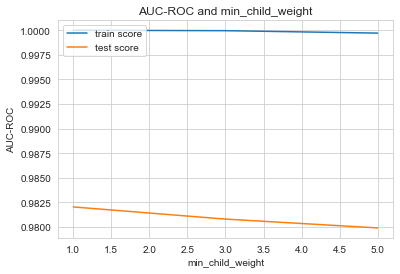

In [104]:
# plotting mean test and train scores with min_child_weight 
plt.figure(figsize= [6, 4])

plt.plot(cv_results['param_min_child_weight'], cv_results['mean_train_score'])
plt.plot(cv_results['param_min_child_weight'], cv_results['mean_test_score'])
plt.xlabel('min_child_weight')
plt.ylabel('AUC-ROC')
plt.title("AUC-ROC and min_child_weight")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### XGBoost with hyperparameters tuning : Tuning gamma

In [105]:
# GridSearchCV to find optimal gamma

# specify number of folds for Stratified k-fold CV
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 42)

# parameters to build the model on
parameters = {'gamma':[i/5.0 for i in range(0,5)]}

# instantiate the model
xgb_model = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=5,
                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

# fit the model on training data
xgb = GridSearchCV(estimator = xgb_model, 
                    param_grid = parameters, 
                    cv = folds, 
                    return_train_score = True,
                    scoring = "roc_auc")
xgb.fit(X_train_pt, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
       error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=0.8, gamma=0, gpu_id=None,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.1, max_delta_step=None, max_depth=5,
       min_child_weight=1,...eight=1, seed=27, subsample=0.8,
       tree_method=None, validate_parameters=False, verbosity=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'gamma': [0.0, 0.2, 0.4, 0.6, 0.8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [106]:
cv_results = pd.DataFrame(xgb.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_gamma  \
0      27.220128      0.391099         0.249025        0.016387           0   
4      27.107161      0.047951         0.237352        0.014385         0.8   
3      27.009891      0.300474         0.250360        0.017977         0.6   
1      27.337312      0.536837         0.262688        0.013718         0.2   
2      27.098202      0.137030         0.239852        0.001027         0.4   

           params  split0_test_score  split1_test_score  split2_test_score  \
0  {'gamma': 0.0}           0.976741           0.988433           0.980957   
4  {'gamma': 0.8}           0.971952           0.988910           0.983449   
3  {'gamma': 0.6}           0.975142           0.990972           0.978144   
1  {'gamma': 0.2}           0.975046           0.986452           0.980649   
2  {'gamma': 0.4}           0.972451           0.987599           0.977558   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.982044        0.004834                1            0.999999   
4         0.981437        0.007067                2            1.000000   
3         0.981420        0.006865                3            0.999999   
1         0.980716        0.004657                4            0.999999   
2         0.979202        0.006292                5            0.999999   

   split1_train_score  split2_train_score  mean_train_score  std_train_score  
0            1.000000                 1.0          1.000000     2.336577e-07  
4            0.999999                 1.0          0.999999     2.156379e-07  
3            0.999999                 1.0          1.000000     2.254586e-07  
1            1.000000                 1.0          1.000000     1.954757e-07  
2            1.000000                 1.0          1.000000     1.687040e-07

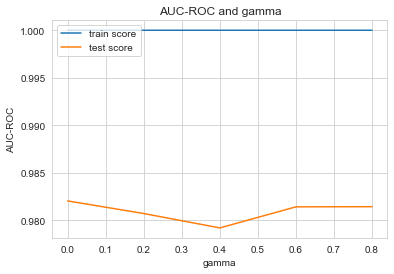

In [107]:
# plotting mean test and train scores with gamma 
plt.figure(figsize= [6, 4])

plt.plot(cv_results['param_gamma'], cv_results['mean_train_score'])
plt.plot(cv_results['param_gamma'], cv_results['mean_test_score'])
plt.xlabel('gamma')
plt.ylabel('AUC-ROC')
plt.title("AUC-ROC and gamma")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### XGBoost with hyperparameters tuning : Tuning subsample and colsample_bytree

In [108]:
# GridSearchCV to find optimal subsample and colsample_bytree

# specify number of folds for Stratified k-fold CV
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 42)

# parameters to build the model on
parameters = {
            'subsample':[i/10.0 for i in range(6,10)],
            'colsample_bytree':[i/10.0 for i in range(6,10)]
            }

# instantiate the model
xgb_model = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=5,
                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

# fit the model on training data
xgb = GridSearchCV(estimator = xgb_model, 
                    param_grid = parameters, 
                    cv = folds, 
                    return_train_score = True,
                    scoring = "roc_auc")
xgb.fit(X_train_pt, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
       error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=0.8, gamma=0, gpu_id=None,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.1, max_delta_step=None, max_depth=5,
       min_child_weight=1,...eight=1, seed=27, subsample=0.8,
       tree_method=None, validate_parameters=False, verbosity=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'subsample': [0.6, 0.7, 0.8, 0.9], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [109]:
cv_results = pd.DataFrame(xgb.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
10      32.127145      1.459800         0.266022        0.020930   
15      30.760334      0.525555         0.257354        0.002867   
13      32.345937      1.223803         0.289022        0.031826   
5       24.580884      1.114357         0.238017        0.008287   
9       31.609189      2.598930         0.307028        0.046678   

   param_colsample_bytree param_subsample  \
10                    0.8             0.8   
15                    0.9             0.9   
13                    0.9             0.7   
5                     0.7             0.7   
9                     0.8             0.7   

                                         params  split0_test_score  \
10  {'colsample_bytree': 0.8, 'subsample': 0.8}           0.976741   
15  {'colsample_bytree': 0.9, 'subsample': 0.9}           0.973572   
13  {'colsample_bytree': 0.9, 'subsample': 0.7}           0.974068   
5   {'colsample_bytree': 0.7, 'subsample': 0.7}           0.974033   
9   {'colsample_bytree': 0.8, 'subsample': 0.7}           0.975080   

    split1_test_score  split2_test_score  mean_test_score  std_test_score  \
10           0.988433           0.980957         0.982044        0.004834   
15           0.985922           0.982890         0.980795        0.005255   
13           0.985952           0.982197         0.980739        0.004960   
5            0.985721           0.981376         0.980377        0.004824   
9            0.985808           0.979077         0.979988        0.004427   

    rank_test_score  split0_train_score  split1_train_score  \
10                1            0.999999            1.000000   
15                2            1.000000            1.000000   
13                3            0.999999            1.000000   
5                 4            0.999998            0.999999   
9                 5            0.999998            0.999999   

    split2_train_score  mean_train_score  std_train_score  
10            1.000000          1.000000     2.336577e-07  
15            1.000000          1.000000     1.417577e-07  
13            1.000000          0.999999     3.256503e-07  
5             0.999999          0.999999     4.477127e-07  
9             1.000000          0.999999     5.760199e-07

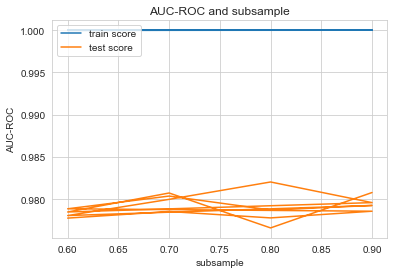

In [110]:
# plotting mean test and train scores with subsample 
plt.figure(figsize= [6, 4])

plt.plot(cv_results['param_subsample'], cv_results['mean_train_score'])
plt.plot(cv_results['param_subsample'], cv_results['mean_test_score'])
plt.xlabel('subsample')
plt.ylabel('AUC-ROC')
plt.title("AUC-ROC and subsample")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

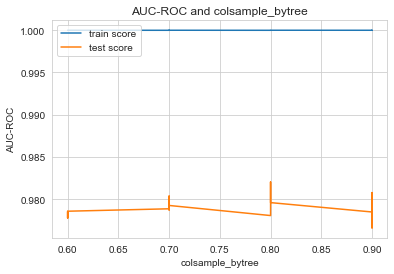

In [111]:
# plotting mean test and train scores with colsample_bytree 
plt.figure(figsize= [6, 4])

plt.plot(cv_results['param_colsample_bytree'], cv_results['mean_train_score'])
plt.plot(cv_results['param_colsample_bytree'], cv_results['mean_test_score'])
plt.xlabel('colsample_bytree')
plt.ylabel('AUC-ROC')
plt.title("AUC-ROC and colsample_bytree")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### XGBoost with hyperparameters tuning : Tuning regularization parameters

In [112]:
# GridSearchCV to find optimal regularization parameters

# specify number of folds for Stratified k-fold CV
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 42)

# parameters to build the model on
parameters = {'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]}

# instantiate the model
xgb_model = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=5,
                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

# fit the model on training data
xgb = GridSearchCV(estimator = xgb_model, 
                    param_grid = parameters, 
                    cv = folds, 
                    return_train_score = True,
                    scoring = "roc_auc")
xgb.fit(X_train_pt, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
       error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=0.8, gamma=0, gpu_id=None,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.1, max_delta_step=None, max_depth=5,
       min_child_weight=1,...eight=1, seed=27, subsample=0.8,
       tree_method=None, validate_parameters=False, verbosity=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'reg_alpha': [0, 0.001, 0.005, 0.01, 0.05]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [113]:
cv_results = pd.DataFrame(xgb.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
4      27.378559      0.408924         0.252686        0.010275   
0      27.802515      0.460103         0.270016        0.025493   
3      25.841907      1.308050         0.236019        0.014988   
1      27.999642      0.940666         0.254689        0.003095   
2      30.323727      3.828087         0.244351        0.008732   

  param_reg_alpha                params  split0_test_score  split1_test_score  \
4            0.05   {'reg_alpha': 0.05}           0.977202           0.989610   
0               0      {'reg_alpha': 0}           0.976741           0.988433   
3            0.01   {'reg_alpha': 0.01}           0.975961           0.989282   
1           0.001  {'reg_alpha': 0.001}           0.976364           0.988317   
2           0.005  {'reg_alpha': 0.005}           0.973666           0.988613   

   split2_test_score  mean_test_score  std_test_score  rank_test_score  \
4           0.982086         0.982966        0.005103                1   
0           0.980957         0.982044        0.004834                2   
3           0.980430         0.981891        0.005536                3   
1           0.979770         0.981483        0.005028                4   
2           0.976786         0.979688        0.006438                5   

   split0_train_score  split1_train_score  split2_train_score  \
4            0.999999            1.000000                 1.0   
0            0.999999            1.000000                 1.0   
3            1.000000            1.000000                 1.0   
1            0.999999            1.000000                 1.0   
2            1.000000            0.999999                 1.0   

   mean_train_score  std_train_score  
4               1.0     3.084389e-07  
0               1.0     2.336577e-07  
3               1.0     1.677117e-07  
1               1.0     2.076052e-07  
2               1.0     2.051290e-07

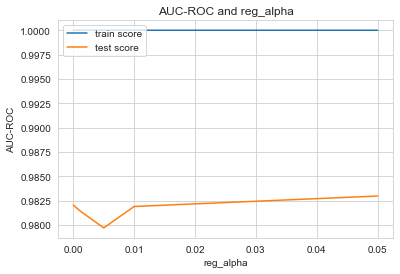

In [114]:
# plotting mean test and train scores with reg_alpha 
plt.figure(figsize= [6, 4])

plt.plot(cv_results['param_reg_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_reg_alpha'], cv_results['mean_test_score'])
plt.xlabel('reg_alpha')
plt.ylabel('AUC-ROC')
plt.title("AUC-ROC and reg_alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### XGBoost with hyperparameters tuning : Tuning learning rate

In [115]:
# GridSearchCV to find optimal learning rate

# specify number of folds for Stratified k-fold CV
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 42)

# parameters to build the model on
parameters = {'learning_rate':[.05, .01, .005]}

# instantiate the model
xgb_model = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=5,
                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

# fit the model on training data
xgb = GridSearchCV(estimator = xgb_model, 
                    param_grid = parameters, 
                    cv = folds, 
                    return_train_score = True,
                    scoring = "roc_auc")
xgb.fit(X_train_pt, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
       error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=0.8, gamma=0, gpu_id=None,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.1, max_delta_step=None, max_depth=5,
       min_child_weight=1,...eight=1, seed=27, subsample=0.8,
       tree_method=None, validate_parameters=False, verbosity=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.05, 0.01, 0.005]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [116]:
cv_results = pd.DataFrame(xgb.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      27.728574      0.513256         0.230683        0.000472   
1      25.829320      0.583248         0.218016        0.025392   
2      27.456241      2.630652         0.187346        0.007761   

  param_learning_rate                    params  split0_test_score  \
0                0.05   {'learning_rate': 0.05}           0.976281   
1                0.01   {'learning_rate': 0.01}           0.916120   
2               0.005  {'learning_rate': 0.005}           0.912480   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.985869           0.975974         0.979375        0.004594   
1           0.919268           0.946025         0.927138        0.013417   
2           0.919468           0.942351         0.924766        0.012757   

   rank_test_score  split0_train_score  split1_train_score  \
0                1            0.998165            0.997537   
1                2            0.942334            0.933000   
2                3            0.932914            0.929343   

   split2_train_score  mean_train_score  std_train_score  
0            0.998124          0.997942         0.000287  
1            0.925237          0.933523         0.006989  
2            0.917799          0.926685         0.006451

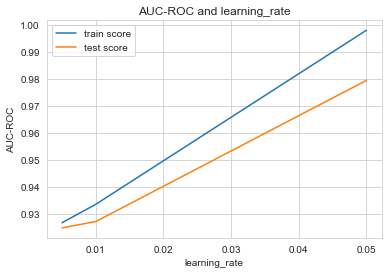

In [117]:
# plotting mean test and train scores with learning_rate 
plt.figure(figsize= [6, 4])

plt.plot(cv_results['param_learning_rate'], cv_results['mean_train_score'])
plt.plot(cv_results['param_learning_rate'], cv_results['mean_test_score'])
plt.xlabel('learning_rate')
plt.ylabel('AUC-ROC')
plt.title("AUC-ROC and learning_rate")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### XGBoost with hyperparameters tuning : Tuning n_estimators

In [118]:
# GridSearchCV to find optimal n_estimators

# specify number of folds for Stratified k-fold CV
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 42)

# parameters to build the model on
parameters = {'n_estimators':range(200, 1000, 200)}

# instantiate the model
xgb_model = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=5,
                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

# fit the model on training data
xgb = GridSearchCV(estimator = xgb_model, 
                    param_grid = parameters, 
                    cv = folds, 
                    return_train_score = True,
                    scoring = "roc_auc")
xgb.fit(X_train_pt, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
       error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=0.8, gamma=0, gpu_id=None,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.1, max_delta_step=None, max_depth=5,
       min_child_weight=1,...eight=1, seed=27, subsample=0.8,
       tree_method=None, validate_parameters=False, verbosity=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': range(200, 1000, 200)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [119]:
cv_results = pd.DataFrame(xgb.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
2      96.974696      4.679028         0.594448        0.009781   
1      68.642112      0.941636         0.500206        0.015441   
0      41.327418      1.004225         0.311861        0.002092   
3     113.586672      1.985136         0.711071        0.052791   

  param_n_estimators                 params  split0_test_score  \
2                600  {'n_estimators': 600}           0.979980   
1                400  {'n_estimators': 400}           0.979298   
0                200  {'n_estimators': 200}           0.978072   
3                800  {'n_estimators': 800}           0.980676   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
2           0.987977           0.979283         0.982413        0.003944   
1           0.988519           0.979412         0.982410        0.004320   
0           0.988731           0.980401         0.982401        0.004575   
3           0.987617           0.978352         0.982215        0.003936   

   rank_test_score  split0_train_score  split1_train_score  \
2                1                 1.0                 1.0   
1                2                 1.0                 1.0   
0                3                 1.0                 1.0   
3                4                 1.0                 1.0   

   split2_train_score  mean_train_score  std_train_score  
2                 1.0               1.0              0.0  
1                 1.0               1.0              0.0  
0                 1.0               1.0              0.0  
3                 1.0               1.0              0.0

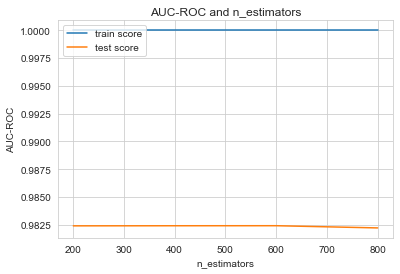

In [120]:
# plotting mean test and train scores with n_estimators 
plt.figure(figsize= [6, 4])

plt.plot(cv_results['param_n_estimators'], cv_results['mean_train_score'])
plt.plot(cv_results['param_n_estimators'], cv_results['mean_test_score'])
plt.xlabel('n_estimators')
plt.ylabel('AUC-ROC')
plt.title("AUC-ROC and n_estimators")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### Fitting the final model with the best parameters obtained from grid search

In [121]:
# model with optimal hyperparameters
xgb_final = XGBClassifier(learning_rate = 0.05,
                         n_estimators = 600,
                         max_depth = 7,
                         min_child_weight = 1,
                         gamma = 0,
                         subsample = 0.8,
                         colsample_bytree = 0.8,
                         reg_alpha = 0.05,
                         objective = 'binary:logistic',
                         nthread = 4,
                         scale_pos_weight = 1,
                         seed = 27)
xgb_final.fit(X_train_pt, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.05, max_delta_step=0, max_depth=7,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=600, n_jobs=4, nthread=4, num_parallel_tree=1,
       objective='binary:logistic', random_state=27, reg_alpha=0.05,
       reg_lambda=1, scale_pos_weight=1, seed=27, subsample=0.8,
       tree_method=None, validate_parameters=False, verbosity=None)

#### Predictions on the train set

In [122]:
y_train_pred = xgb_final.predict(X_train_pt)

#### Metrics Analysis on the train set for XGBoost

In [123]:
ModelMetrics(y_train, y_train_pred)

********* Classification Report *********
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

   micro avg       1.00      1.00      1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845

**** Confusion Matrix ****
[[227451      0]
 [     0    394]]


Accuracy Score: 1.0
Sensitivity: 1.0
Specificity: 1.0
False Positive Rate: 0.0
Positive Predictive Value: 1.0
Negative Predictive Value: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


#### Plotting the ROC Curve for the Train Dataset

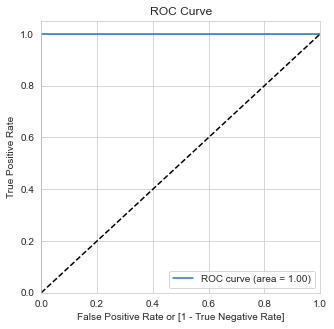

In [124]:
draw_roc(y_train, y_train_pred)

### Metrics Analysis of the Classifiers on Imbalanced data:

### Train data Metrics:
| -- | Precision | Recall | F1 - Score	 | ROC - AUC | 
| --- | --- | --- | --- | --- |
| Logistic Regression | 0.8496 |  0.8173 | 0.8331 | 0.91 |
| Decision Tree |  0.7712  |  0.6929  |  0.73 |  0.85 |
| Random Forest |  0.8548  |  0.5381  | 0.6604 | 0.77  |
| XGBoost | 1.0   | 1.0   | 1.0  | 1.0  |

If we look at the metrics (Precision, Recall, F1 Score and ROC - AUC) of the different classifiers on the train data, we can see that the better metrics are given by XGBoost. Even though the XGBoost model metrics suggest that the model is overfitting, we will evaluate the model on test data and see how the model performs on test data.

### Proceeding with the model which shows the best result 

Here, we will
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [125]:
#initialise the model with optimum hyperparameters
clf = XGBClassifier(learning_rate = 0.05,
                         n_estimators = 600,
                         max_depth = 7,
                         min_child_weight = 1,
                         gamma = 0,
                         subsample = 0.8,
                         colsample_bytree = 0.8,
                         reg_alpha = 0.05,
                         objective = 'binary:logistic',
                         nthread = 4,
                         scale_pos_weight = 1,
                         seed = 27)  
clf.fit(X_train_pt, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.05, max_delta_step=0, max_depth=7,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=600, n_jobs=4, nthread=4, num_parallel_tree=1,
       objective='binary:logistic', random_state=27, reg_alpha=0.05,
       reg_lambda=1, scale_pos_weight=1, seed=27, subsample=0.8,
       tree_method=None, validate_parameters=False, verbosity=None)

#### Predictions on the test set

In [126]:
y_test_pred = clf.predict(X_test_pt)

#### Metrics Analysis on the test set for the best model

In [127]:
ModelMetrics(y_test, y_test_pred)

********* Classification Report *********
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.80      0.86        98

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.97      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962

**** Confusion Matrix ****
[[56859     5]
 [   20    78]]


Accuracy Score: 0.9996
Sensitivity: 0.7959
Specificity: 0.9999
False Positive Rate: 0.0001
Positive Predictive Value: 0.9398
Negative Predictive Value: 0.9996
Precision: 0.9398
Recall: 0.7959
F1 Score: 0.8619


#### Plotting the ROC Curve for the Test Dataset

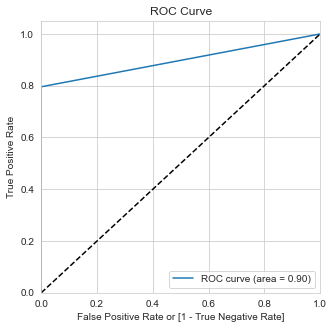

In [128]:
draw_roc(y_test, y_test_pred)

### Printing the important features of the best model to understand the dataset

Top var = 17
2nd Top var = 12
3rd Top var = 14


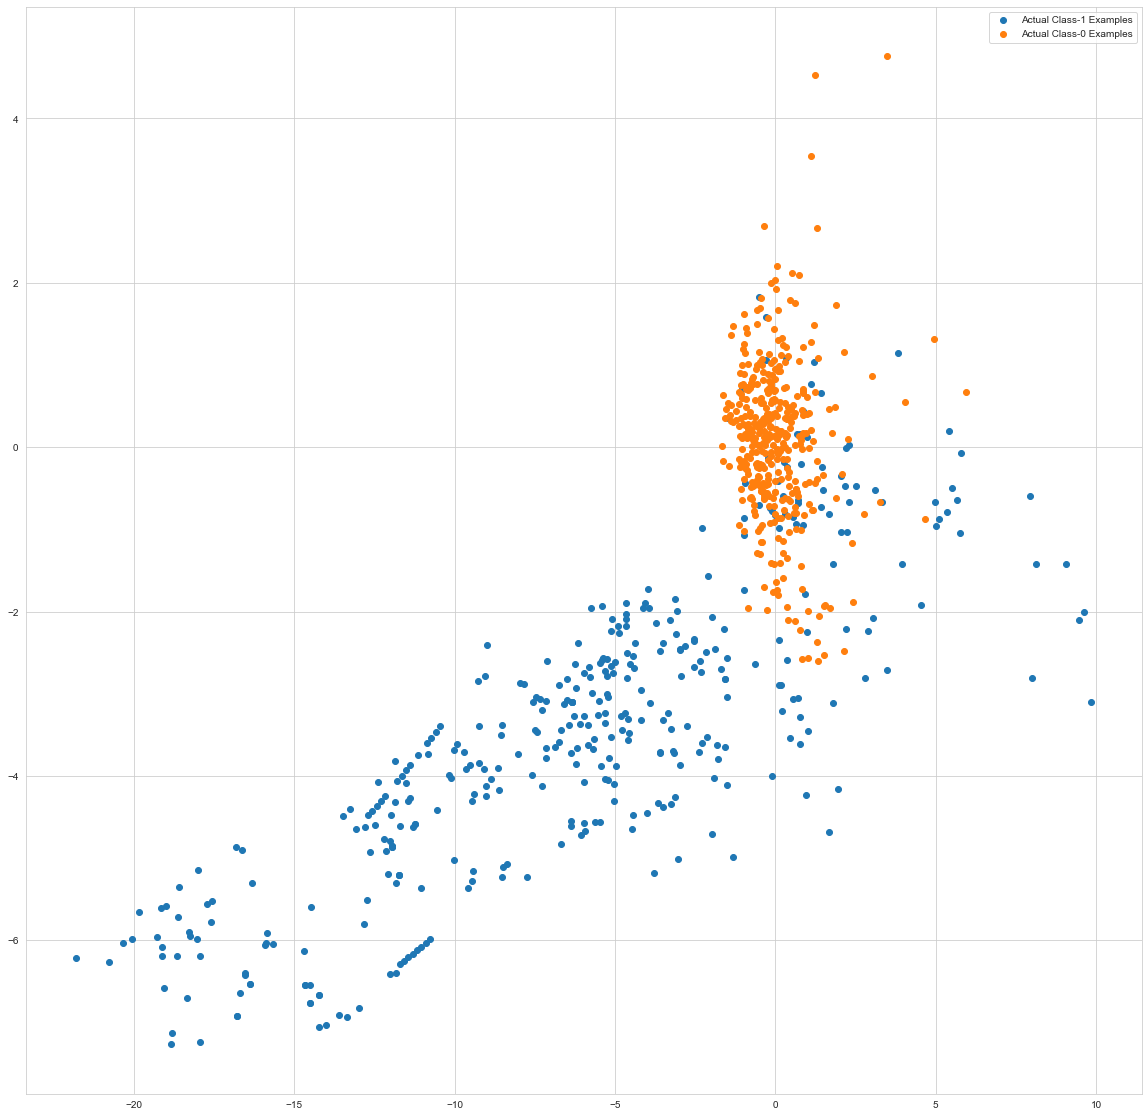

In [129]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train_pt.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train_pt.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with Balanced Classes

<b> Since our dataset is heavily unbalanced with 99.827% of non-fraudalent transactions and 0.173% of fraudalent transactions, using a majority undersampling balancing technique will result in losing out on a big portion of transactions. Hence, for our case study, we will use only oversampling balancing techniques.<br> <br>
Here we will first balance the dataset using the following balancing techniques:
 - Random Oversampling
 - SMOTE
 - ADASYN
    
We will use the following models on the balanced datasets:
    
 - Logisitic Regression
 - Decision Trees
 - Random Forests
 - XGBoost
    
After building these models we will evaluate the metrics for all the models on the train dataset </b>

## Random Oversampling

In [130]:
from imblearn.over_sampling import RandomOverSampler

In [131]:
print("Number of fraud transactions before Random Oversampling: ",y_train.value_counts()[1])
print("Number of non fraud transactions before Random Oversampling: ",y_train.value_counts()[0])

Number of fraud transactions before Random Oversampling:  394
Number of non fraud transactions before Random Oversampling:  227451


In [132]:
ros = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train_pt, y_train)

In [133]:
print("Number of fraud transactions after Random Oversampling: ", sum(y_train_ros == 1))
print("Number of non fraud transactions after Random Oversampling: ", sum(y_train_ros == 0))

Number of fraud transactions after Random Oversampling:  227451
Number of non fraud transactions after Random Oversampling:  227451


### Logistic Regression with Random Oversampling Balanced Classes

#### Logistic Regression with default hyperparameters

In [134]:
lr = LogisticRegression()
lr = lr.fit(X_train_ros, y_train_ros)

#### Predictions on the train set

In [135]:
# Making predictions
y_pred = lr.predict_proba(X_train_ros)

# Converting y_pred to a dataframe
y_pred_df = pd.DataFrame(y_pred)

# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

y_pred_1.head()

1
0  0.050867
1  0.150585
2  0.000405
3  0.020725
4  0.011031

In [136]:
# Converting y_test to dataframe
y_train_df = pd.DataFrame(y_train_ros)

# Renaming the column 
y_train_df = y_train_df.rename(columns={ 0 : 'Class'})

y_train_df.head()

Class
0      0
1      0
2      0
3      0
4      0

In [137]:
# Putting TransID to index
y_train_df['TransID'] = y_train_df.index

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_train_df.reset_index(drop=True, inplace=True)

# Appending y_train_df and y_pred_1
y_pred_final = pd.concat([y_train_df,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Fraud_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['TransID','Class','Fraud_Prob'], axis=1)

y_pred_final.head()

TransID  Class  Fraud_Prob
0        0      0    0.050867
1        1      0    0.150585
2        2      0    0.000405
3        3      0    0.020725
4        4      0    0.011031

In [138]:
# Creating new column 'predicted' with 1 if Fraud_Prob > 0.5 else 0
y_pred_final['predicted'] = y_pred_final.Fraud_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

TransID  Class  Fraud_Prob  predicted
0        0      0    0.050867          0
1        1      0    0.150585          0
2        2      0    0.000405          0
3        3      0    0.020725          0
4        4      0    0.011031          0

In [139]:
ModelMetrics(y_pred_final.Class, y_pred_final.predicted)

********* Classification Report *********
              precision    recall  f1-score   support

           0       0.93      0.98      0.95    227451
           1       0.97      0.93      0.95    227451

   micro avg       0.95      0.95      0.95    454902
   macro avg       0.95      0.95      0.95    454902
weighted avg       0.95      0.95      0.95    454902

**** Confusion Matrix ****
[[221906   5545]
 [ 16611 210840]]


Accuracy Score: 0.9513
Sensitivity: 0.927
Specificity: 0.9756
False Positive Rate: 0.0244
Positive Predictive Value: 0.9744
Negative Predictive Value: 0.9304
Precision: 0.9744
Recall: 0.927
F1 Score: 0.9501


#### Logisitic Regression with hyperparameters tuning :  Tuning penalty, C and solver

In [140]:
# GridSearchCV to find optimal hyperparameters 

# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'penalty' : ['l1', 'l2'], # l1 or l2 regularization
              'C' : np.logspace(-4, 4, 20), # size of penalty
              'solver' : ['liblinear']} # type of solver used  

# instantiate the model
logsk = LogisticRegression(random_state = 100)

# fit tree on training data
log_grid = GridSearchCV(estimator = logsk, 
                    param_grid = parameters, 
                    cv = n_folds, 
                    return_train_score = True,
                    scoring = "roc_auc")
log_grid.fit(X_train_ros, y_train_ros)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=100, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([1.00000e-04, 2.63665e-04, 6.95193e-04, 1.83298e-03, 4.83293e-03,
       1.27427e-02, 3.35982e-02, 8.85867e-02, 2.33572e-01, 6.15848e-01,
       1.62378e+00, 4.28133e+00, 1.12884e+01, 2.97635e+01, 7.84760e+01,
       2.06914e+02, 5.45559e+02, 1.43845e+03, 3.79269e+03, 1.00000e+04]), 'solver': ['liblinear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [141]:
cv_results = pd.DataFrame(log_grid.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_C  \
33       5.103963      0.024405         0.054630    9.780155e-04  545.559   
35       5.097596      0.025125         0.053004    4.495664e-07  1438.45   
37       5.122889      0.016275         0.054666    2.360123e-03  3792.69   
31       5.131402      0.070629         0.055005    2.828166e-03  206.914   
39       5.224911      0.203652         0.061690    5.895057e-03    10000   

   param_penalty param_solver  \
33            l2    liblinear   
35            l2    liblinear   
37            l2    liblinear   
31            l2    liblinear   
39            l2    liblinear   

                                               params  split0_test_score  \
33  {'C': 545.5594781168514, 'penalty': 'l2', 'sol...           0.987536   
35  {'C': 1438.44988828766, 'penalty': 'l2', 'solv...           0.987536   
37  {'C': 3792.690190732246, 'penalty': 'l2', 'sol...           0.987536   
31  {'C': 206.913808111479, 'penalty': 'l2', 'solv...           0.987536   
39  {'C': 10000.0, 'penalty': 'l2', 'solver': 'lib...           0.987536   

    split1_test_score  split2_test_score  mean_test_score  std_test_score  \
33           0.987701           0.987798         0.987678        0.000108   
35           0.987701           0.987798         0.987678        0.000108   
37           0.987701           0.987798         0.987678        0.000108   
31           0.987701           0.987798         0.987678        0.000108   
39           0.987701           0.987798         0.987678        0.000108   

    rank_test_score  split0_train_score  split1_train_score  \
33                1            0.987633            0.987747   
35                2            0.987633            0.987747   
37                3            0.987633            0.987747   
31                4            0.987633            0.987747   
39                5            0.987633            0.987747   

    split2_train_score  mean_train_score  std_train_score  
33            0.987694          0.987691         0.000046  
35            0.987694          0.987691         0.000046  
37            0.987694          0.987691         0.000046  
31            0.987694          0.987691         0.000046  
39            0.987694          0.987691         0.000046

In [142]:
log_grid.best_params_

{'C': 545.5594781168514, 'penalty': 'l2', 'solver': 'liblinear'}

#### Fitting the final model with the best parameters obtained from grid search

In [143]:
lr = LogisticRegression(C=545.559, solver='liblinear', penalty='l2')
lr = lr.fit(X_train_ros, y_train_ros)

#### Predictions on the train set

In [144]:
# Making predictions
y_pred = lr.predict_proba(X_train_ros)

# Converting y_pred to a dataframe
y_pred_df = pd.DataFrame(y_pred)

# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

y_pred_1.head()

1
0  0.050698
1  0.150639
2  0.000403
3  0.020684
4  0.011009

In [145]:
# Converting y_train_ros to dataframe
y_train_df = pd.DataFrame(y_train_ros)

# Renaming the column 
y_train_df = y_train_df.rename(columns={ 0 : 'Class'})

y_train_df.head()

Class
0      0
1      0
2      0
3      0
4      0

In [146]:
# Putting TransID to index
y_train_df['TransID'] = y_train_df.index

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_train_df.reset_index(drop=True, inplace=True)

# Appending y_train_df and y_pred_1
y_pred_final = pd.concat([y_train_df,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Fraud_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['TransID','Class','Fraud_Prob'], axis=1)

y_pred_final.head()

TransID  Class  Fraud_Prob
0        0      0    0.050698
1        1      0    0.150639
2        2      0    0.000403
3        3      0    0.020684
4        4      0    0.011009

In [147]:
# Creating new column 'predicted' with 1 if Fraud_Prob > 0.5 else 0
y_pred_final['predicted'] = y_pred_final.Fraud_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

TransID  Class  Fraud_Prob  predicted
0        0      0    0.050698          0
1        1      0    0.150639          0
2        2      0    0.000403          0
3        3      0    0.020684          0
4        4      0    0.011009          0

#### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced accuracy, sensitivity and specificity

In [148]:
y_pred_final.head()

TransID  Class  Fraud_Prob  predicted
0        0      0    0.050698          0
1        1      0    0.150639          0
2        2      0    0.000403          0
3        3      0    0.020684          0
4        4      0    0.011009          0

In [149]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.Fraud_Prob.map(lambda x: 1 if x > i else 0)
y_pred_final.head()

TransID  Class  Fraud_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0        0      0    0.050698          0    1    0    0    0    0    0    0   
1        1      0    0.150639          0    1    1    0    0    0    0    0   
2        2      0    0.000403          0    1    0    0    0    0    0    0   
3        3      0    0.020684          0    1    0    0    0    0    0    0   
4        4      0    0.011009          0    1    0    0    0    0    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0

In [150]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in num:
    cm1 = confusion_matrix(y_pred_final.Class, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.895558  0.979618  0.811498
0.2   0.2  0.935824  0.964414  0.907233
0.3   0.3  0.946602  0.949343  0.943860
0.4   0.4  0.950038  0.936945  0.963131
0.5   0.5  0.951288  0.926969  0.975608
0.6   0.6  0.951842  0.919389  0.984296
0.7   0.7  0.947013  0.904278  0.989747
0.8   0.8  0.941291  0.888974  0.993607
0.9   0.9  0.935287  0.873476  0.997098


<Figure size 216x216 with 0 Axes>

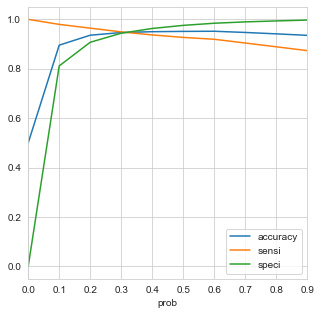

In [151]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize= [3, 3])
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], grid = True, figsize=(5,5))
plt.show()

From the curve above, we will take 0.3 as the optimum cutoff probability.

In [152]:
y_pred_final['final_predicted'] = y_pred_final.Fraud_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_pred_final.head()

TransID  Class  Fraud_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0        0      0    0.050698          0    1    0    0    0    0    0    0   
1        1      0    0.150639          0    1    1    0    0    0    0    0   
2        2      0    0.000403          0    1    0    0    0    0    0    0   
3        3      0    0.020684          0    1    0    0    0    0    0    0   
4        4      0    0.011009          0    1    0    0    0    0    0    0   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    0    0    0                0  
2    0    0    0                0  
3    0    0    0                0  
4    0    0    0                0

#### Metrics Analysis on the train set for Logisitic Regression Model

In [153]:
ModelMetrics(y_pred_final.Class, y_pred_final.final_predicted)

********* Classification Report *********
              precision    recall  f1-score   support

           0       0.95      0.94      0.95    227451
           1       0.94      0.95      0.95    227451

   micro avg       0.95      0.95      0.95    454902
   macro avg       0.95      0.95      0.95    454902
weighted avg       0.95      0.95      0.95    454902

**** Confusion Matrix ****
[[214682  12769]
 [ 11522 215929]]


Accuracy Score: 0.9466
Sensitivity: 0.9493
Specificity: 0.9439
False Positive Rate: 0.0561
Positive Predictive Value: 0.9442
Negative Predictive Value: 0.9491
Precision: 0.9442
Recall: 0.9493
F1 Score: 0.9467


#### Plotting the ROC Curve for the Train Dataset

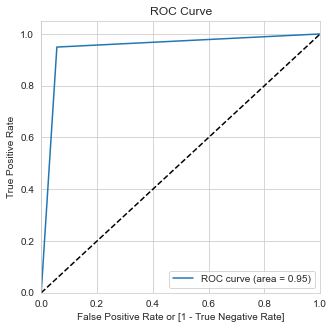

In [154]:
draw_roc(y_pred_final.Class, y_pred_final.final_predicted)

### Decision Tree with Random Oversampling Balanced Classes

#### Decision tree with default hyperparameters

In [155]:
fraud_tree = DecisionTreeClassifier(max_depth = 10)
fraud_tree.fit(X_train_ros, y_train_ros)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [156]:
# Making predictions
y_train_pred = fraud_tree.predict(X_train_ros)

In [157]:
ModelMetrics(y_train_ros, y_train_pred)

********* Classification Report *********
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

   micro avg       1.00      1.00      1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902

**** Confusion Matrix ****
[[226778    673]
 [  1113 226338]]


Accuracy Score: 0.9961
Sensitivity: 0.9951
Specificity: 0.997
False Positive Rate: 0.003
Positive Predictive Value: 0.997
Negative Predictive Value: 0.9951
Precision: 0.997
Recall: 0.9951
F1 Score: 0.996


#### Decision tree with hyperparameters tuning : Tuning max_depth

In [158]:
# GridSearchCV to find optimal max_depth

# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", random_state = 100)

# fit tree on training data
tree = GridSearchCV(estimator = dtree, 
                    param_grid = parameters, 
                    cv = n_folds, 
                    return_train_score = True,
                    scoring = "roc_auc")
tree.fit(X_train_ros, y_train_ros)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(1, 40)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='roc_auc', verbose=0)

In [159]:
cv_results = pd.DataFrame(tree.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
21       8.728441      0.565477         0.070000        0.009936   
20       8.546780      0.229476         0.061338        0.000471   
22       8.373628      0.477241         0.061678        0.000477   
23       8.627149      0.514456         0.066671        0.006599   
38      10.915276      0.335247         0.085352        0.003684   

   param_max_depth             params  split0_test_score  split1_test_score  \
21              22  {'max_depth': 22}           0.999839           0.999795   
20              21  {'max_depth': 21}           0.999776           0.999794   
22              23  {'max_depth': 23}           0.999815           0.999792   
23              24  {'max_depth': 24}           0.999801           0.999785   
38              39  {'max_depth': 39}           0.999796           0.999789   

    split2_test_score  mean_test_score  std_test_score  rank_test_score  \
21           0.999705         0.999780        0.000056                1   
20           0.999768         0.999779        0.000011                2   
22           0.999710         0.999772        0.000045                3   
23           0.999710         0.999765        0.000040                4   
38           0.999710         0.999765        0.000039                5   

    split0_train_score  split1_train_score  split2_train_score  \
21            0.999996            0.999993            1.000000   
20            0.999990            0.999991            0.999998   
22            0.999999            0.999996            1.000000   
23            1.000000            0.999997            1.000000   
38            1.000000            1.000000            1.000000   

    mean_train_score  std_train_score  
21          0.999996         0.000003  
20          0.999993         0.000004  
22          0.999998         0.000002  
23          0.999999         0.000001  
38          1.000000         0.000000

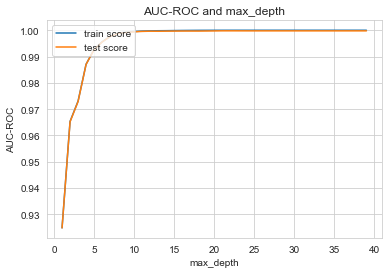

In [160]:
# plotting mean test and train scores with max_depth
plt.figure(figsize= [6, 4])

plt.plot(cv_results['param_max_depth'], cv_results['mean_train_score'])
plt.plot(cv_results['param_max_depth'], cv_results['mean_test_score'])
plt.xlabel('max_depth')
plt.ylabel('AUC-ROC')
plt.title("AUC-ROC and max_depth")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### Decision tree with hyperparameters tuning : Tuning min_samples_leaf

In [161]:
# GridSearchCV to find optimal min_samples_leaf

# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", random_state = 100)

# fit tree on training data
tree = GridSearchCV(estimator = dtree, 
                    param_grid = parameters, 
                    cv = n_folds, 
                    return_train_score = True,
                    scoring = "roc_auc")
tree.fit(X_train_ros, y_train_ros)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [162]:
cv_results = pd.DataFrame(tree.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()  

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
1       8.792572      0.298098         0.070007        0.009202   
0       8.934254      0.826826         0.062671        0.002358   
2       9.266692      0.751540         0.068625        0.002546   
3       8.493734      0.307321         0.068338        0.002625   
4       9.439755      0.349616         0.073006        0.007118   

  param_min_samples_leaf                    params  split0_test_score  \
1                     25  {'min_samples_leaf': 25}           0.999785   
0                      5   {'min_samples_leaf': 5}           0.999809   
2                     45  {'min_samples_leaf': 45}           0.999766   
3                     65  {'min_samples_leaf': 65}           0.999794   
4                     85  {'min_samples_leaf': 85}           0.999736   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
1           0.999804           0.999824         0.999805        0.000016   
0           0.999794           0.999764         0.999789        0.000019   
2           0.999787           0.999795         0.999783        0.000012   
3           0.999739           0.999755         0.999763        0.000023   
4           0.999714           0.999746         0.999732        0.000014   

   rank_test_score  split0_train_score  split1_train_score  \
1                1            0.999960            0.999967   
0                2            0.999992            0.999996   
2                3            0.999934            0.999938   
3                4            0.999912            0.999918   
4                5            0.999869            0.999888   

   split2_train_score  mean_train_score  std_train_score  
1            0.999964          0.999964         0.000003  
0            0.999996          0.999995         0.000002  
2            0.999928          0.999933         0.000004  
3            0.999895          0.999908         0.000010  
4            0.999881          0.999880         0.000008

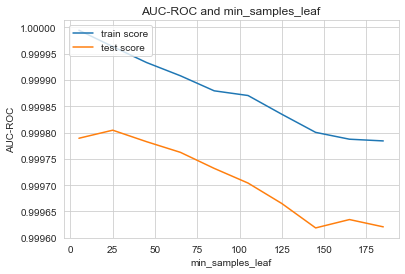

In [163]:
# plotting mean test and train scores with min_samples_leaf
plt.figure(figsize= [6, 4])

plt.plot(cv_results['param_min_samples_leaf'], cv_results['mean_train_score'])
plt.plot(cv_results['param_min_samples_leaf'], cv_results['mean_test_score'])
plt.xlabel('min_samples_leaf')
plt.ylabel('AUC-ROC')
plt.title("AUC-ROC and min_samples_leaf")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### Decision tree with hyperparameters tuning : Tuning min_samples_split

In [164]:
# GridSearchCV to find optimal min_samples_split

# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", random_state = 100)

# fit tree on training data
tree = GridSearchCV(estimator = dtree, 
                    param_grid = parameters, 
                    cv = n_folds, 
                    return_train_score = True,
                    scoring = "roc_auc")
tree.fit(X_train_ros, y_train_ros)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [165]:
cv_results = pd.DataFrame(tree.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       8.260976      0.337437         0.065007        0.002830   
1       8.669741      0.321992         0.064006        0.002162   
2       8.458265      0.133904         0.063671        0.002357   
3       8.560333      0.202647         0.063339        0.004029   
4       8.349840      0.449847         0.070339        0.008995   

  param_min_samples_split                     params  split0_test_score  \
0                       5   {'min_samples_split': 5}           0.999796   
1                      25  {'min_samples_split': 25}           0.999796   
2                      45  {'min_samples_split': 45}           0.999796   
3                      65  {'min_samples_split': 65}           0.999796   
4                      85  {'min_samples_split': 85}           0.999796   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.999789            0.99971         0.999765        0.000039   
1           0.999789            0.99971         0.999765        0.000039   
2           0.999789            0.99971         0.999765        0.000039   
3           0.999789            0.99971         0.999765        0.000039   
4           0.999789            0.99971         0.999765        0.000039   

   rank_test_score  split0_train_score  split1_train_score  \
0                1                 1.0                 1.0   
1                1                 1.0                 1.0   
2                1                 1.0                 1.0   
3                1                 1.0                 1.0   
4                1                 1.0                 1.0   

   split2_train_score  mean_train_score  std_train_score  
0                 1.0               1.0              0.0  
1                 1.0               1.0              0.0  
2                 1.0               1.0              0.0  
3                 1.0               1.0              0.0  
4                 1.0               1.0              0.0

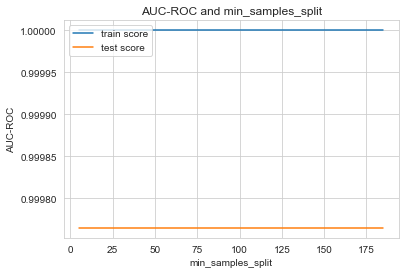

In [166]:
# plotting mean test and train scores with min_samples_split
plt.figure(figsize= [6, 4])

plt.plot(cv_results['param_min_samples_split'], cv_results['mean_train_score'])
plt.plot(cv_results['param_min_samples_split'], cv_results['mean_test_score'])
plt.xlabel('min_samples_split')
plt.ylabel('AUC-ROC')
plt.title("AUC-ROC and min_samples_split")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### Fitting the final model with the best parameters obtained from grid search

In [167]:
# model with optimal hyperparameters
tree_final = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=22, 
                                  min_samples_leaf=25,
                                  min_samples_split=5)
tree_final.fit(X_train_ros, y_train_ros)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=22,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=25, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

#### Predictions on the train set

In [168]:
y_train_pred = tree_final.predict(X_train_ros)

#### Metrics Analysis on the train set for Decision Tree

In [169]:
ModelMetrics(y_train_ros, y_train_pred)

********* Classification Report *********
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

   micro avg       1.00      1.00      1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902

**** Confusion Matrix ****
[[227211    240]
 [     0 227451]]


Accuracy Score: 0.9995
Sensitivity: 1.0
Specificity: 0.9989
False Positive Rate: 0.0011
Positive Predictive Value: 0.9989
Negative Predictive Value: 1.0
Precision: 0.9989
Recall: 1.0
F1 Score: 0.9994


#### Plotting the ROC Curve for the Train Dataset

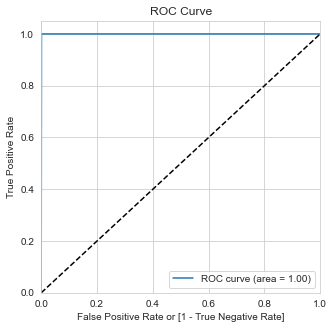

In [170]:
draw_roc(y_train_ros, y_train_pred)

### Random Forest with Random Oversampling Balanced Classes

#### Random Forest with default hyperparameters

In [171]:
fraud_forest = RandomForestClassifier(max_depth = 5)
fraud_forest.fit(X_train_ros, y_train_ros)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [172]:
# Making predictions
y_train_pred = fraud_forest.predict(X_train_ros)

In [173]:
ModelMetrics(y_train_ros, y_train_pred)

********* Classification Report *********
              precision    recall  f1-score   support

           0       0.93      1.00      0.96    227451
           1       1.00      0.92      0.96    227451

   micro avg       0.96      0.96      0.96    454902
   macro avg       0.96      0.96      0.96    454902
weighted avg       0.96      0.96      0.96    454902

**** Confusion Matrix ****
[[226591    860]
 [ 18314 209137]]


Accuracy Score: 0.9579
Sensitivity: 0.9195
Specificity: 0.9962
False Positive Rate: 0.0038
Positive Predictive Value: 0.9959
Negative Predictive Value: 0.9252
Precision: 0.9959
Recall: 0.9195
F1 Score: 0.9562


#### Random forest with hyperparameters tuning : Tuning max_depth

In [174]:
# GridSearchCV to find optimal max_depth

# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier(criterion = "gini", random_state = 100)

# fit random forest on training data
rf = GridSearchCV(estimator = rf, 
                    param_grid = parameters, 
                    cv = n_folds, 
                    return_train_score = True,
                    scoring = "roc_auc")
rf.fit(X_train_ros, y_train_ros)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(2, 20, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='roc_auc', verbose=0)

In [175]:
cv_results = pd.DataFrame(rf.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
3      13.234541      0.516372         0.199676        0.001881   
2      12.466384      0.517292         0.189681        0.004110   
1       9.153356      0.294946         0.169347        0.008260   
0       3.748528      0.079178         0.161345        0.005436   

  param_max_depth             params  split0_test_score  split1_test_score  \
3              17  {'max_depth': 17}           0.999995           0.999984   
2              12  {'max_depth': 12}           0.999967           0.999966   
1               7   {'max_depth': 7}           0.997638           0.997340   
0               2   {'max_depth': 2}           0.960845           0.960813   

   split2_test_score  mean_test_score  std_test_score  rank_test_score  \
3           1.000000         0.999993        0.000007                1   
2           0.999982         0.999972        0.000007                2   
1           0.998182         0.997720        0.000348                3   
0           0.962336         0.961331        0.000710                4   

   split0_train_score  split1_train_score  split2_train_score  \
3            1.000000            1.000000            1.000000   
2            0.999989            0.999997            0.999986   
1            0.997761            0.997365            0.998158   
0            0.961499            0.961338            0.961327   

   mean_train_score  std_train_score  
3          1.000000     6.409876e-17  
2          0.999991     4.490661e-06  
1          0.997761     3.235438e-04  
0          0.961388     7.859979e-05

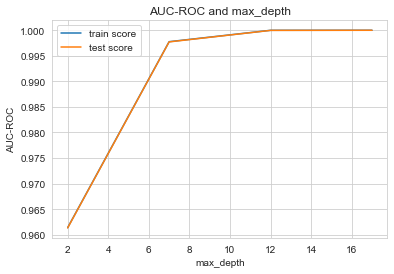

In [176]:
# plotting mean test and train scores with max_depth 
plt.figure(figsize= [6, 4])

plt.plot(cv_results['param_max_depth'], cv_results['mean_train_score'])
plt.plot(cv_results['param_max_depth'], cv_results['mean_test_score'])
plt.xlabel('max_depth')
plt.ylabel('AUC-ROC')
plt.title("AUC-ROC and max_depth")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### Random Forest with hyperparameters tuning : Tuning n_estimators

In [177]:
# GridSearchCV to find optimal n_estimators

# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'n_estimators': range(100, 500, 100)}

# instantiate the model
rf = RandomForestClassifier(criterion = "gini", random_state = 100, max_depth=4)

# fit random forest on training data
rf = GridSearchCV(estimator = rf, 
                    param_grid = parameters, 
                    cv = n_folds, 
                    return_train_score = True,
                    scoring = "roc_auc")
rf.fit(X_train_ros, y_train_ros)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': range(100, 500, 100)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [178]:
cv_results = pd.DataFrame(rf.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      54.884773      0.369574         1.045456        0.034631   
1     109.059962      0.434510         1.968974        0.035878   
3     217.726968      0.442931         3.903130        0.054782   
2     168.459854      3.741166         2.986289        0.070651   

  param_n_estimators                 params  split0_test_score  \
0                100  {'n_estimators': 100}           0.991245   
1                200  {'n_estimators': 200}           0.990872   
3                400  {'n_estimators': 400}           0.990716   
2                300  {'n_estimators': 300}           0.990688   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.991024           0.991523         0.991264        0.000204   
1           0.990533           0.991110         0.990838        0.000237   
3           0.990584           0.990835         0.990712        0.000102   
2           0.990480           0.990733         0.990634        0.000110   

   rank_test_score  split0_train_score  split1_train_score  \
0                1            0.991462            0.991252   
1                2            0.991068            0.990812   
3                3            0.990894            0.990845   
2                4            0.990868            0.990759   

   split2_train_score  mean_train_score  std_train_score  
0            0.991224          0.991313         0.000106  
1            0.990838          0.990906         0.000115  
3            0.990565          0.990768         0.000145  
2            0.990460          0.990696         0.000172

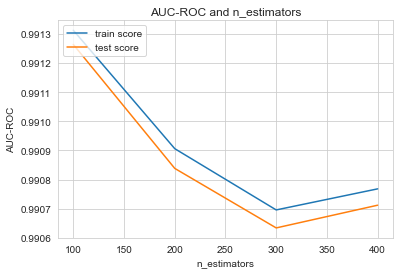

In [179]:
# plotting mean test and train scores with n_estimators
plt.figure(figsize= [6, 4])

plt.plot(cv_results['param_n_estimators'], cv_results['mean_train_score'])
plt.plot(cv_results['param_n_estimators'], cv_results['mean_test_score'])
plt.xlabel('n_estimators')
plt.ylabel('AUC-ROC')
plt.title("AUC-ROC and n_estimators")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### Random Forest with hyperparameters tuning : Tuning max_features

In [180]:
# GridSearchCV to find optimal max_features

# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(criterion = "gini", random_state = 100, max_depth=4)

# fit random forest on training data
rf = GridSearchCV(estimator = rf, 
                    param_grid = parameters, 
                    cv = n_folds, 
                    return_train_score = True,
                    scoring = "roc_auc")
rf.fit(X_train_ros, y_train_ros)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_features': [4, 8, 14, 20, 24]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [181]:
cv_results = pd.DataFrame(rf.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
4      21.898655      0.273166         0.150683        0.006794   
3      18.225818      0.095789         0.150344        0.006182   
2      13.363180      0.128148         0.151013        0.003267   
1       8.330813      0.030070         0.148213        0.002868   
0       4.918931      0.252822         0.160678        0.007931   

  param_max_features                params  split0_test_score  \
4                 24  {'max_features': 24}           0.990842   
3                 20  {'max_features': 20}           0.990508   
2                 14  {'max_features': 14}           0.990050   
1                  8   {'max_features': 8}           0.988304   
0                  4   {'max_features': 4}           0.982847   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
4           0.990028           0.990929         0.990600        0.000406   
3           0.989192           0.990337         0.990012        0.000584   
2           0.989097           0.989932         0.989693        0.000424   
1           0.989114           0.987246         0.988221        0.000765   
0           0.983201           0.983056         0.983034        0.000145   

   rank_test_score  split0_train_score  split1_train_score  \
4                1            0.991051            0.990274   
3                2            0.990743            0.989431   
2                3            0.990321            0.989310   
1                4            0.988520            0.989412   
0                5            0.983163            0.983490   

   split2_train_score  mean_train_score  std_train_score  
4            0.990624          0.990649         0.000318  
3            0.990009          0.990061         0.000537  
2            0.989577          0.989736         0.000428  
1            0.987032          0.988321         0.000982  
0            0.982551          0.983068         0.000389

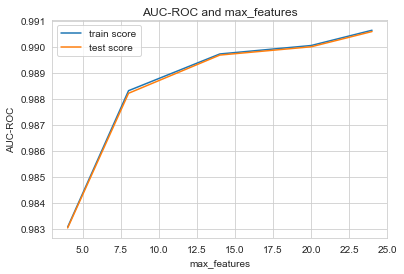

In [182]:
# plotting mean test and train scores with max_features
plt.figure(figsize= [6, 4])

plt.plot(cv_results['param_max_features'], cv_results['mean_train_score'])
plt.plot(cv_results['param_max_features'], cv_results['mean_test_score'])
plt.xlabel('max_features')
plt.ylabel('AUC-ROC')
plt.title("AUC-ROC and max_features")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### Random forest with hyperparameters tuning : Tuning min_samples_leaf

In [183]:
# GridSearchCV to find optimal min_samples_leaf

# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(criterion = "gini", random_state = 100)

# fit random forest on training data
rf = GridSearchCV(estimator = rf, 
                    param_grid = parameters, 
                    cv = n_folds, 
                    return_train_score = True,
                    scoring = "roc_auc")
rf.fit(X_train_ros, y_train_ros)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': range(100, 400, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [184]:
cv_results = pd.DataFrame(rf.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      12.435899      0.187421         0.198355        0.004100   
1      12.186626      0.561356         0.197912        0.003717   
2      12.068770      0.187198         0.190339        0.002060   
3      12.072491      0.260125         0.189021        0.001625   
4      11.956873      0.405111         0.203373        0.022120   

  param_min_samples_leaf                     params  split0_test_score  \
0                    100  {'min_samples_leaf': 100}           0.999958   
1                    150  {'min_samples_leaf': 150}           0.999940   
2                    200  {'min_samples_leaf': 200}           0.999939   
3                    250  {'min_samples_leaf': 250}           0.999926   
4                    300  {'min_samples_leaf': 300}           0.999887   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.999947           0.999968         0.999958        0.000009   
1           0.999922           0.999957         0.999940        0.000014   
2           0.999915           0.999955         0.999936        0.000016   
3           0.999900           0.999942         0.999923        0.000017   
4           0.999893           0.999912         0.999897        0.000010   

   rank_test_score  split0_train_score  split1_train_score  \
0                1            0.999961            0.999969   
1                2            0.999955            0.999961   
2                3            0.999950            0.999958   
3                4            0.999938            0.999950   
4                5            0.999895            0.999934   

   split2_train_score  mean_train_score  std_train_score  
0            0.999960          0.999963         0.000004  
1            0.999947          0.999954         0.000006  
2            0.999939          0.999949         0.000008  
3            0.999927          0.999938         0.000010  
4            0.999900          0.999910         0.000017

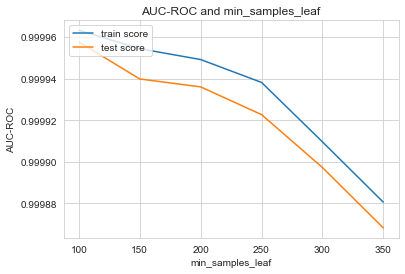

In [185]:
# plotting mean test and train scores with min_samples_leaf
plt.figure(figsize= [6, 4])

plt.plot(cv_results['param_min_samples_leaf'], cv_results['mean_train_score'])
plt.plot(cv_results['param_min_samples_leaf'], cv_results['mean_test_score'])
plt.xlabel('min_samples_leaf')
plt.ylabel('AUC-ROC')
plt.title("AUC-ROC and min_samples_leaf")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### Random forest with hyperparameters tuning : Tuning min_samples_split

In [186]:
# GridSearchCV to find optimal min_samples_split

# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(criterion = "gini", random_state = 100)

# fit random forest on training data
rf = GridSearchCV(estimator = rf, 
                    param_grid = parameters, 
                    cv = n_folds, 
                    return_train_score = True,
                    scoring = "roc_auc")
rf.fit(X_train_ros, y_train_ros)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(200, 500, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [187]:
cv_results = pd.DataFrame(rf.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      13.118951      0.095461         0.201682        0.005439   
3      12.979412      0.153670         0.200349        0.005557   
4      13.368142      0.167649         0.201022        0.008640   
5      13.167553      0.085118         0.197681        0.003301   
2      13.003027      0.381508         0.202350        0.006944   

  param_min_samples_split                      params  split0_test_score  \
0                     200  {'min_samples_split': 200}           0.999993   
3                     350  {'min_samples_split': 350}           0.999990   
4                     400  {'min_samples_split': 400}           0.999992   
5                     450  {'min_samples_split': 450}           0.999992   
2                     300  {'min_samples_split': 300}           0.999990   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.999980           1.000000         0.999991        0.000008   
3           0.999982           1.000000         0.999991        0.000007   
4           0.999977           1.000000         0.999989        0.000010   
5           0.999984           0.999992         0.999989        0.000004   
2           0.999975           1.000000         0.999988        0.000010   

   rank_test_score  split0_train_score  split1_train_score  \
0                1                 1.0                 1.0   
3                2                 1.0                 1.0   
4                3                 1.0                 1.0   
5                4                 1.0                 1.0   
2                5                 1.0                 1.0   

   split2_train_score  mean_train_score  std_train_score  
0                 1.0               1.0     0.000000e+00  
3                 1.0               1.0     1.433292e-16  
4                 1.0               1.0     6.409876e-17  
5                 1.0               1.0     3.091732e-08  
2                 1.0               1.0     6.409876e-17

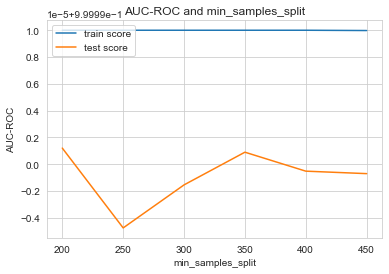

In [188]:
# plotting mean test and train scores with min_samples_split
plt.figure(figsize= [6, 4])

plt.plot(cv_results['param_min_samples_split'], cv_results['mean_train_score'])
plt.plot(cv_results['param_min_samples_split'], cv_results['mean_test_score'])
plt.xlabel('min_samples_split')
plt.ylabel('AUC-ROC')
plt.title("AUC-ROC and min_samples_split")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### Fitting the final model with the best parameters obtained from grid search

In [189]:
# model with optimal hyperparameters
rf_final = RandomForestClassifier(bootstrap=True,
                                     max_depth=17,
                                     min_samples_leaf=100, 
                                     min_samples_split=200,
                                     max_features=24,
                                     n_estimators=100,
                                     criterion = "gini", 
                                    random_state = 100)
rf_final.fit(X_train_ros, y_train_ros)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=17, max_features=24, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=200,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

#### Predictions on the train set

In [190]:
y_train_pred = rf_final.predict(X_train_ros)

#### Metrics Analysis on the train set for Random Forest

In [191]:
ModelMetrics(y_train_ros, y_train_pred)

********* Classification Report *********
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

   micro avg       1.00      1.00      1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902

**** Confusion Matrix ****
[[226916    535]
 [     0 227451]]


Accuracy Score: 0.9988
Sensitivity: 1.0
Specificity: 0.9976
False Positive Rate: 0.0024
Positive Predictive Value: 0.9977
Negative Predictive Value: 1.0
Precision: 0.9977
Recall: 1.0
F1 Score: 0.9988


#### Plotting the ROC Curve for the Train Dataset

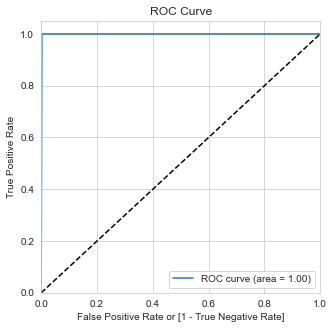

In [192]:
draw_roc(y_train_ros, y_train_pred)

### XGBoost with Random Oversampling Balanced Classes

#### XGBoost with default hyperparameters

In [193]:
fraud_xgboost = XGBClassifier()
fraud_xgboost.fit(X_train_ros, y_train_ros)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
       validate_parameters=False, verbosity=None)

In [194]:
# Making predictions
y_train_pred = fraud_xgboost.predict(X_train_ros)

In [195]:
ModelMetrics(y_train_ros, y_train_pred)

********* Classification Report *********
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

   micro avg       1.00      1.00      1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902

**** Confusion Matrix ****
[[227451      0]
 [     0 227451]]


Accuracy Score: 1.0
Sensitivity: 1.0
Specificity: 1.0
False Positive Rate: 0.0
Positive Predictive Value: 1.0
Negative Predictive Value: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


#### XGBoost with hyperparameters tuning : Tuning max_depth

In [196]:
# GridSearchCV to find optimal max_depth

# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_depth' : range(3,10,2)}

# instantiate the model
xgb_model = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=5,
                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

# fit the model on training data
xgb = GridSearchCV(estimator = xgb_model, 
                    param_grid = parameters, 
                    cv = n_folds, 
                    return_train_score = True,
                    scoring = "roc_auc")
xgb.fit(X_train_ros, y_train_ros)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=0.8, gamma=0, gpu_id=None,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.1, max_delta_step=None, max_depth=5,
       min_child_weight=1,...eight=1, seed=27, subsample=0.8,
       tree_method=None, validate_parameters=False, verbosity=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(3, 10, 2)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='roc_auc', verbose=0)

In [197]:
cv_results = pd.DataFrame(xgb.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
2     101.517635     25.947329         0.773544        0.235974   
3      80.540939      2.699887         0.551719        0.010083   
1      78.235321      4.125439         0.631508        0.105153   
0      58.317368      1.989327         0.453099        0.036506   

  param_max_depth            params  split0_test_score  split1_test_score  \
2               7  {'max_depth': 7}           0.999988           0.999961   
3               9  {'max_depth': 9}           0.999989           0.999958   
1               5  {'max_depth': 5}           0.999984           0.999967   
0               3  {'max_depth': 3}           0.999841           0.999833   

   split2_test_score  mean_test_score  std_test_score  rank_test_score  \
2           1.000000         0.999983        0.000016                1   
3           1.000000         0.999983        0.000018                2   
1           0.999995         0.999982        0.000012                3   
0           0.999894         0.999856        0.000027                4   

   split0_train_score  split1_train_score  split2_train_score  \
2            1.000000            1.000000            1.000000   
3            1.000000            1.000000            1.000000   
1            0.999995            0.999996            0.999994   
0            0.999863            0.999891            0.999857   

   mean_train_score  std_train_score  
2          1.000000         0.000000  
3          1.000000         0.000000  
1          0.999995         0.000001  
0          0.999870         0.000015

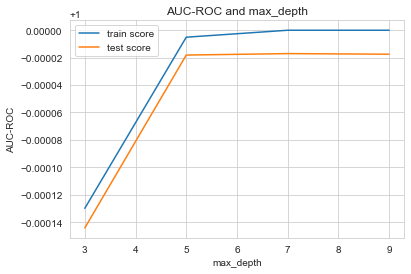

In [198]:
# plotting mean test and train scores with max_depth 
plt.figure(figsize= [6, 4])

plt.plot(cv_results['param_max_depth'], cv_results['mean_train_score'])
plt.plot(cv_results['param_max_depth'], cv_results['mean_test_score'])
plt.xlabel('max_depth')
plt.ylabel('AUC-ROC')
plt.title("AUC-ROC and max_depth")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### XGBoost with hyperparameters tuning : Tuning min_child_weight

In [199]:
# GridSearchCV to find optimal min_child_weight

# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_child_weight':range(1,6,2)}

# instantiate the model
xgb_model = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=5,
                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

# fit the model on training data
xgb = GridSearchCV(estimator = xgb_model, 
                    param_grid = parameters, 
                    cv = n_folds, 
                    return_train_score = True,
                    scoring = "roc_auc")
xgb.fit(X_train_ros, y_train_ros)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=0.8, gamma=0, gpu_id=None,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.1, max_delta_step=None, max_depth=5,
       min_child_weight=1,...eight=1, seed=27, subsample=0.8,
       tree_method=None, validate_parameters=False, verbosity=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_child_weight': range(1, 6, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [200]:
cv_results = pd.DataFrame(xgb.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      54.711712      0.579491         0.450919        0.013246   
1      55.340448      1.258652         0.503889        0.068273   
2      53.182527      0.543092         0.472540        0.025526   

  param_min_child_weight                   params  split0_test_score  \
0                      1  {'min_child_weight': 1}           0.999984   
1                      3  {'min_child_weight': 3}           0.999985   
2                      5  {'min_child_weight': 5}           0.999980   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.999967           0.999995         0.999982        0.000012   
1           0.999963           0.999993         0.999980        0.000012   
2           0.999959           0.999992         0.999977        0.000014   

   rank_test_score  split0_train_score  split1_train_score  \
0                1            0.999995            0.999996   
1                2            0.999993            0.999994   
2                3            0.999987            0.999993   

   split2_train_score  mean_train_score  std_train_score  
0            0.999994          0.999995         0.000001  
1            0.999991          0.999993         0.000001  
2            0.999986          0.999988         0.000003

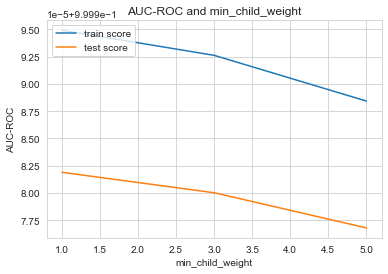

In [201]:
# plotting mean test and train scores with min_child_weight 
plt.figure(figsize= [6, 4])

plt.plot(cv_results['param_min_child_weight'], cv_results['mean_train_score'])
plt.plot(cv_results['param_min_child_weight'], cv_results['mean_test_score'])
plt.xlabel('min_child_weight')
plt.ylabel('AUC-ROC')
plt.title("AUC-ROC and min_child_weight")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### XGBoost with hyperparameters tuning : Tuning gamma

In [202]:
# GridSearchCV to find optimal gamma

# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'gamma':[i/5.0 for i in range(0,5)]}

# instantiate the model
xgb_model = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=5,
                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

# fit the model on training data
xgb = GridSearchCV(estimator = xgb_model, 
                    param_grid = parameters, 
                    cv = n_folds, 
                    return_train_score = True,
                    scoring = "roc_auc")
xgb.fit(X_train_ros, y_train_ros)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=0.8, gamma=0, gpu_id=None,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.1, max_delta_step=None, max_depth=5,
       min_child_weight=1,...eight=1, seed=27, subsample=0.8,
       tree_method=None, validate_parameters=False, verbosity=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'gamma': [0.0, 0.2, 0.4, 0.6, 0.8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [203]:
cv_results = pd.DataFrame(xgb.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_gamma  \
0      54.062598      0.782203         0.460233        0.022328           0   
1      53.712179      1.158683         0.456706        0.013018         0.2   
2      54.184070      1.004105         0.457980        0.008419         0.4   
4      53.697116      0.083346         0.454718        0.013972         0.8   
3      54.202744      0.498390         0.450488        0.010133         0.6   

           params  split0_test_score  split1_test_score  split2_test_score  \
0  {'gamma': 0.0}           0.999984           0.999967           0.999995   
1  {'gamma': 0.2}           0.999988           0.999960           0.999996   
2  {'gamma': 0.4}           0.999983           0.999960           0.999994   
4  {'gamma': 0.8}           0.999985           0.999959           0.999993   
3  {'gamma': 0.6}           0.999985           0.999957           0.999994   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.999982        0.000012                1            0.999995   
1         0.999981        0.000015                2            0.999995   
2         0.999979        0.000014                3            0.999994   
4         0.999979        0.000015                4            0.999992   
3         0.999979        0.000015                5            0.999992   

   split1_train_score  split2_train_score  mean_train_score  std_train_score  
0            0.999996            0.999994          0.999995     1.130259e-06  
1            0.999996            0.999993          0.999995     1.146743e-06  
2            0.999995            0.999993          0.999994     6.557730e-07  
4            0.999996            0.999992          0.999993     1.904663e-06  
3            0.999998            0.999992          0.999994     2.586165e-06

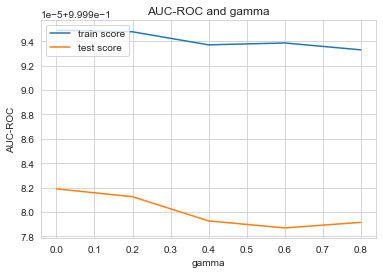

In [204]:
# plotting mean test and train scores with gamma 
plt.figure(figsize= [6, 4])

plt.plot(cv_results['param_gamma'], cv_results['mean_train_score'])
plt.plot(cv_results['param_gamma'], cv_results['mean_test_score'])
plt.xlabel('gamma')
plt.ylabel('AUC-ROC')
plt.title("AUC-ROC and gamma")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### XGBoost with hyperparameters tuning : Tuning subsample and colsample_bytree

In [205]:
# GridSearchCV to find optimal subsample and colsample_bytree

# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {
            'subsample':[i/10.0 for i in range(6,10)],
            'colsample_bytree':[i/10.0 for i in range(6,10)]
            }

# instantiate the model
xgb_model = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=5,
                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

# fit the model on training data
xgb = GridSearchCV(estimator = xgb_model, 
                    param_grid = parameters, 
                    cv = n_folds, 
                    return_train_score = True,
                    scoring = "roc_auc")
xgb.fit(X_train_ros, y_train_ros)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=0.8, gamma=0, gpu_id=None,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.1, max_delta_step=None, max_depth=5,
       min_child_weight=1,...eight=1, seed=27, subsample=0.8,
       tree_method=None, validate_parameters=False, verbosity=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'subsample': [0.6, 0.7, 0.8, 0.9], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [206]:
cv_results = pd.DataFrame(xgb.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
10      56.175967      2.530318         0.447392        0.011923   
11      54.007249      0.889125         0.455870        0.022110   
13      61.408946      1.717922         0.463422        0.006051   
9      190.320131    190.990974         0.422942        0.012442   
8       52.692410      0.786836         0.445189        0.002419   

   param_colsample_bytree param_subsample  \
10                    0.8             0.8   
11                    0.8             0.9   
13                    0.9             0.7   
9                     0.8             0.7   
8                     0.8             0.6   

                                         params  split0_test_score  \
10  {'colsample_bytree': 0.8, 'subsample': 0.8}           0.999984   
11  {'colsample_bytree': 0.8, 'subsample': 0.9}           0.999985   
13  {'colsample_bytree': 0.9, 'subsample': 0.7}           0.999983   
9   {'colsample_bytree': 0.8, 'subsample': 0.7}           0.999984   
8   {'colsample_bytree': 0.8, 'subsample': 0.6}           0.999982   

    split1_test_score  split2_test_score  mean_test_score  std_test_score  \
10           0.999967           0.999995         0.999982        0.000012   
11           0.999965           0.999993         0.999981        0.000012   
13           0.999963           0.999996         0.999981        0.000013   
9            0.999962           0.999995         0.999980        0.000014   
8            0.999964           0.999993         0.999980        0.000012   

    rank_test_score  split0_train_score  split1_train_score  \
10                1            0.999995            0.999996   
11                2            0.999993            0.999996   
13                3            0.999994            0.999995   
9                 4            0.999995            0.999996   
8                 5            0.999993            0.999996   

    split2_train_score  mean_train_score  std_train_score  
10            0.999994          0.999995     1.130259e-06  
11            0.999991          0.999994     1.762962e-06  
13            0.999995          0.999995     5.916525e-07  
9             0.999993          0.999995     1.025473e-06  
8             0.999991          0.999993     1.895023e-06

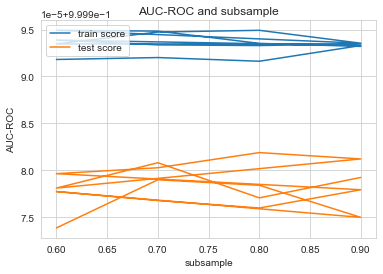

In [207]:
# plotting mean test and train scores with subsample 
plt.figure(figsize= [6, 4])

plt.plot(cv_results['param_subsample'], cv_results['mean_train_score'])
plt.plot(cv_results['param_subsample'], cv_results['mean_test_score'])
plt.xlabel('subsample')
plt.ylabel('AUC-ROC')
plt.title("AUC-ROC and subsample")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

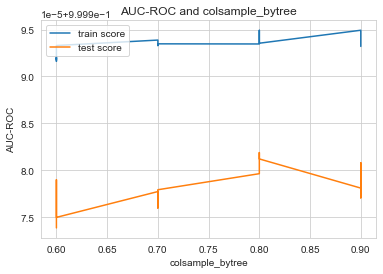

In [208]:
# plotting mean test and train scores with colsample_bytree 
plt.figure(figsize= [6, 4])

plt.plot(cv_results['param_colsample_bytree'], cv_results['mean_train_score'])
plt.plot(cv_results['param_colsample_bytree'], cv_results['mean_test_score'])
plt.xlabel('colsample_bytree')
plt.ylabel('AUC-ROC')
plt.title("AUC-ROC and colsample_bytree")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### XGBoost with hyperparameters tuning : Tuning regularization parameters

In [209]:
# GridSearchCV to find optimal regularization parameters

# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]}

# instantiate the model
xgb_model = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=5,
                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

# fit the model on training data
xgb = GridSearchCV(estimator = xgb_model, 
                    param_grid = parameters, 
                    cv = n_folds, 
                    return_train_score = True,
                    scoring = "roc_auc")
xgb.fit(X_train_ros, y_train_ros)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=0.8, gamma=0, gpu_id=None,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.1, max_delta_step=None, max_depth=5,
       min_child_weight=1,...eight=1, seed=27, subsample=0.8,
       tree_method=None, validate_parameters=False, verbosity=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'reg_alpha': [0, 0.001, 0.005, 0.01, 0.05]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [210]:
cv_results = pd.DataFrame(xgb.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
1      53.948481      0.277735         0.473097        0.021636   
0      53.680712      0.511517         0.458104        0.004823   
2      54.434605      0.136067         0.450082        0.008438   
4      54.329487      0.233725         0.461905        0.008091   
3      54.351345      0.598541         0.480038        0.033150   

  param_reg_alpha                params  split0_test_score  split1_test_score  \
1           0.001  {'reg_alpha': 0.001}           0.999984           0.999967   
0               0      {'reg_alpha': 0}           0.999984           0.999967   
2           0.005  {'reg_alpha': 0.005}           0.999986           0.999965   
4            0.05   {'reg_alpha': 0.05}           0.999980           0.999968   
3            0.01   {'reg_alpha': 0.01}           0.999986           0.999963   

   split2_test_score  mean_test_score  std_test_score  rank_test_score  \
1           0.999995         0.999982        0.000012                1   
0           0.999995         0.999982        0.000012                2   
2           0.999993         0.999981        0.000012                3   
4           0.999995         0.999981        0.000011                4   
3           0.999992         0.999980        0.000013                5   

   split0_train_score  split1_train_score  split2_train_score  \
1            0.999995            0.999996            0.999994   
0            0.999995            0.999996            0.999994   
2            0.999994            0.999995            0.999991   
4            0.999994            0.999996            0.999992   
3            0.999994            0.999995            0.999991   

   mean_train_score  std_train_score  
1          0.999995         0.000001  
0          0.999995         0.000001  
2          0.999993         0.000002  
4          0.999994         0.000002  
3          0.999994         0.000002

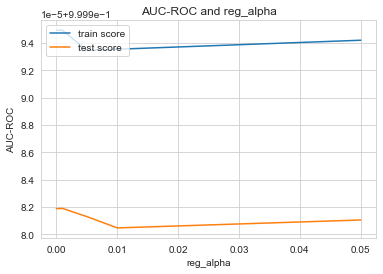

In [211]:
# plotting mean test and train scores with reg_alpha 
plt.figure(figsize= [6, 4])

plt.plot(cv_results['param_reg_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_reg_alpha'], cv_results['mean_test_score'])
plt.xlabel('reg_alpha')
plt.ylabel('AUC-ROC')
plt.title("AUC-ROC and reg_alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### XGBoost with hyperparameters tuning : Tuning learning rate

In [212]:
# GridSearchCV to find optimal learning rate

# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'learning_rate':[.05, .01, .005]}

# instantiate the model
xgb_model = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=5,
                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

# fit the model on training data
xgb = GridSearchCV(estimator = xgb_model, 
                    param_grid = parameters, 
                    cv = n_folds, 
                    return_train_score = True,
                    scoring = "roc_auc")
xgb.fit(X_train_ros, y_train_ros)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=0.8, gamma=0, gpu_id=None,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.1, max_delta_step=None, max_depth=5,
       min_child_weight=1,...eight=1, seed=27, subsample=0.8,
       tree_method=None, validate_parameters=False, verbosity=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.05, 0.01, 0.005]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [213]:
cv_results = pd.DataFrame(xgb.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      54.489838      0.479557         0.442370        0.016738   
1      54.784420      0.558687         0.411926        0.032711   
2      53.770010      0.153751         0.401034        0.002450   

  param_learning_rate                    params  split0_test_score  \
0                0.05   {'learning_rate': 0.05}           0.999918   
1                0.01   {'learning_rate': 0.01}           0.999039   
2               0.005  {'learning_rate': 0.005}           0.997471   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.999921           0.999962         0.999933        0.000020   
1           0.999076           0.999312         0.999142        0.000121   
2           0.997442           0.997701         0.997538        0.000116   

   rank_test_score  split0_train_score  split1_train_score  \
0                1            0.999947            0.999964   
1                2            0.999080            0.999141   
2                3            0.997555            0.997578   

   split2_train_score  mean_train_score  std_train_score  
0            0.999952          0.999954         0.000007  
1            0.999266          0.999163         0.000077  
2            0.997546          0.997560         0.000013

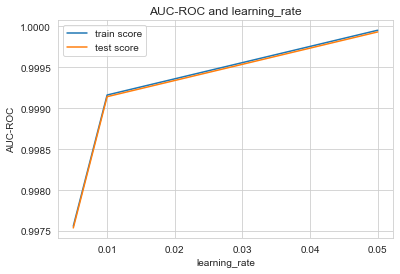

In [214]:
# plotting mean test and train scores with learning_rate 
plt.figure(figsize= [6, 4])

plt.plot(cv_results['param_learning_rate'], cv_results['mean_train_score'])
plt.plot(cv_results['param_learning_rate'], cv_results['mean_test_score'])
plt.xlabel('learning_rate')
plt.ylabel('AUC-ROC')
plt.title("AUC-ROC and learning_rate")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### XGBoost with hyperparameters tuning : Tuning n_estimators

In [215]:
# GridSearchCV to find optimal n_estimators

# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'n_estimators':range(200, 1000, 200)}

# instantiate the model
xgb_model = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=5,
                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

# fit the model on training data
xgb = GridSearchCV(estimator = xgb_model, 
                    param_grid = parameters, 
                    cv = n_folds, 
                    return_train_score = True,
                    scoring = "roc_auc")
xgb.fit(X_train_ros, y_train_ros)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=0.8, gamma=0, gpu_id=None,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.1, max_delta_step=None, max_depth=5,
       min_child_weight=1,...eight=1, seed=27, subsample=0.8,
       tree_method=None, validate_parameters=False, verbosity=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': range(200, 1000, 200)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [216]:
cv_results = pd.DataFrame(xgb.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
2     209.459495      2.792571         1.424114        0.048139   
3     262.433975      2.142084         1.766087        0.040401   
1     155.348869      5.362840         0.994727        0.028818   
0    8221.658267  11511.201729         0.577376        0.048839   

  param_n_estimators                 params  split0_test_score  \
2                600  {'n_estimators': 600}           0.999994   
3                800  {'n_estimators': 800}           0.999994   
1                400  {'n_estimators': 400}           0.999993   
0                200  {'n_estimators': 200}           0.999990   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
2           0.999978           1.000000         0.999991        0.000009   
3           0.999977           1.000000         0.999990        0.000010   
1           0.999977           1.000000         0.999990        0.000010   
0           0.999975           0.999998         0.999988        0.000010   

   rank_test_score  split0_train_score  split1_train_score  \
2                1                 1.0                 1.0   
3                2                 1.0                 1.0   
1                3                 1.0                 1.0   
0                4                 1.0                 1.0   

   split2_train_score  mean_train_score  std_train_score  
2                 1.0               1.0              0.0  
3                 1.0               1.0              0.0  
1                 1.0               1.0              0.0  
0                 1.0               1.0              0.0

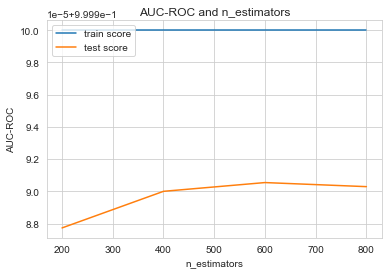

In [217]:
# plotting mean test and train scores with n_estimators 
plt.figure(figsize= [6, 4])

plt.plot(cv_results['param_n_estimators'], cv_results['mean_train_score'])
plt.plot(cv_results['param_n_estimators'], cv_results['mean_test_score'])
plt.xlabel('n_estimators')
plt.ylabel('AUC-ROC')
plt.title("AUC-ROC and n_estimators")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### Fitting the final model with the best parameters obtained from grid search

In [218]:
# model with optimal hyperparameters
xgb_final = XGBClassifier(learning_rate = 0.05,
                         n_estimators = 600,
                         max_depth = 7,
                         min_child_weight = 1,
                         gamma = 0,
                         subsample = 0.8,
                         colsample_bytree = 0.8,
                         reg_alpha = 0.001,
                         objective = 'binary:logistic',
                         nthread = 4,
                         scale_pos_weight = 1,
                         seed = 27)
xgb_final.fit(X_train_ros, y_train_ros)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.05, max_delta_step=0, max_depth=7,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=600, n_jobs=4, nthread=4, num_parallel_tree=1,
       objective='binary:logistic', random_state=27, reg_alpha=0.001,
       reg_lambda=1, scale_pos_weight=1, seed=27, subsample=0.8,
       tree_method=None, validate_parameters=False, verbosity=None)

#### Predictions on the train set

In [219]:
y_train_pred = xgb_final.predict(X_train_ros)

#### Metrics Analysis on the train set for XGBoost

In [220]:
ModelMetrics(y_train_ros, y_train_pred)

********* Classification Report *********
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

   micro avg       1.00      1.00      1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902

**** Confusion Matrix ****
[[227451      0]
 [     0 227451]]


Accuracy Score: 1.0
Sensitivity: 1.0
Specificity: 1.0
False Positive Rate: 0.0
Positive Predictive Value: 1.0
Negative Predictive Value: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


#### Plotting the ROC Curve for the Train Dataset

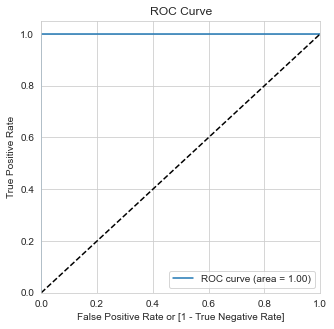

In [221]:
draw_roc(y_train_ros, y_train_pred)

## SMOTE

In [222]:
from imblearn.over_sampling import SMOTE

In [223]:
print("Number of fraud transactions before SMOTE: ",y_train.value_counts()[1])
print("Number of non fraud transactions before SMOTE: ",y_train.value_counts()[0])

Number of fraud transactions before SMOTE:  394
Number of non fraud transactions before SMOTE:  227451


In [224]:
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_sample(X_train_pt, y_train)

In [225]:
print("Number of fraud transactions after SMOTE: ", sum(y_train_sm == 1))
print("Number of non fraud transactions after SMOTE: ", sum(y_train_sm == 0))

Number of fraud transactions after SMOTE:  227451
Number of non fraud transactions after SMOTE:  227451


### Print the class distribution after applying SMOTE 

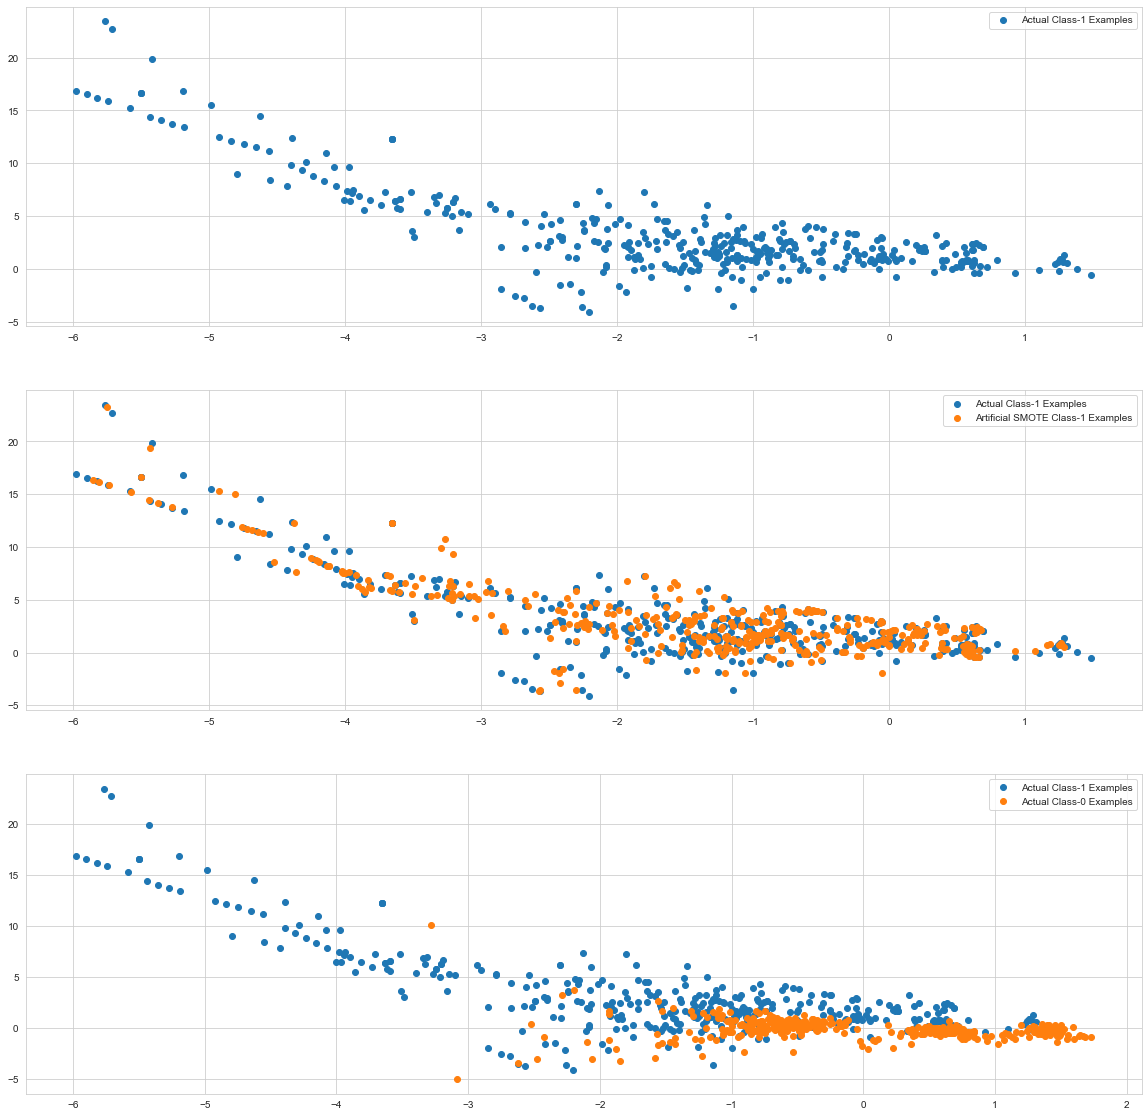

In [226]:
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_sm[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

<b> The Graphical representation of the SMOTE algorithm: </b> <br> <br>
Graph 1:
- SMOTE starts from a set of blue points representing the minority Class - Class-1 Examples

Graph 2:
- It then selects a Class-1 example say point A and selects one of the k-nearest neighbors randomly say point B.
- It selects a random value in the range [0,1] as lambda.
- It then generates and places a synthetic sample between the point A and B on the vector located as lambda % from the original point A.
- These synthetic points are represented as orange coloured points
- This procedure is repeated for all the Class-1 examples by adding each time a new synthetic example similar to the other Class 1 examples.

Graph 3:
- The actual Class-1 and Class-0 examples are represented as blue points and orange points respectively.

### Logistic Regression with SMOTE Balanced Classes

#### Logistic Regression with default hyperparameters

In [227]:
lr = LogisticRegression()
lr = lr.fit(X_train_sm, y_train_sm)

#### Predictions on the train set

In [228]:
# Making predictions
y_pred = lr.predict_proba(X_train_sm)

# Converting y_pred to a dataframe
y_pred_df = pd.DataFrame(y_pred)

# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

y_pred_1.head()

1
0  0.045976
1  0.102337
2  0.000154
3  0.021246
4  0.002773

In [229]:
# Converting y_test to dataframe
y_train_df = pd.DataFrame(y_train_sm)

# Renaming the column 
y_train_df = y_train_df.rename(columns={ 0 : 'Class'})

y_train_df.head()

Class
0      0
1      0
2      0
3      0
4      0

In [230]:
# Putting TransID to index
y_train_df['TransID'] = y_train_df.index

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_train_df.reset_index(drop=True, inplace=True)

# Appending y_train_df and y_pred_1
y_pred_final = pd.concat([y_train_df,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Fraud_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['TransID','Class','Fraud_Prob'], axis=1)

y_pred_final.head()

TransID  Class  Fraud_Prob
0        0      0    0.045976
1        1      0    0.102337
2        2      0    0.000154
3        3      0    0.021246
4        4      0    0.002773

In [231]:
# Creating new column 'predicted' with 1 if Fraud_Prob > 0.5 else 0
y_pred_final['predicted'] = y_pred_final.Fraud_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

TransID  Class  Fraud_Prob  predicted
0        0      0    0.045976          0
1        1      0    0.102337          0
2        2      0    0.000154          0
3        3      0    0.021246          0
4        4      0    0.002773          0

In [232]:
ModelMetrics(y_pred_final.Class, y_pred_final.predicted)

********* Classification Report *********
              precision    recall  f1-score   support

           0       0.93      0.97      0.95    227451
           1       0.97      0.92      0.95    227451

   micro avg       0.95      0.95      0.95    454902
   macro avg       0.95      0.95      0.95    454902
weighted avg       0.95      0.95      0.95    454902

**** Confusion Matrix ****
[[221582   5869]
 [ 17793 209658]]


Accuracy Score: 0.948
Sensitivity: 0.9218
Specificity: 0.9742
False Positive Rate: 0.0258
Positive Predictive Value: 0.9728
Negative Predictive Value: 0.9257
Precision: 0.9728
Recall: 0.9218
F1 Score: 0.9466


#### Logisitic Regression with hyperparameters tuning :  Tuning penalty, C and solver

In [233]:
# GridSearchCV to find optimal hyperparameters 

# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'penalty' : ['l1', 'l2'], # l1 or l2 regularization
              'C' : np.logspace(-4, 4, 20), # size of penalty
              'solver' : ['liblinear']} # type of solver used  

# instantiate the model
logsk = LogisticRegression(random_state = 100)

# fit tree on training data
log_grid = GridSearchCV(estimator = logsk, 
                    param_grid = parameters, 
                    cv = n_folds, 
                    return_train_score = True,
                    scoring = "roc_auc")
log_grid.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=100, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([1.00000e-04, 2.63665e-04, 6.95193e-04, 1.83298e-03, 4.83293e-03,
       1.27427e-02, 3.35982e-02, 8.85867e-02, 2.33572e-01, 6.15848e-01,
       1.62378e+00, 4.28133e+00, 1.12884e+01, 2.97635e+01, 7.84760e+01,
       2.06914e+02, 5.45559e+02, 1.43845e+03, 3.79269e+03, 1.00000e+04]), 'solver': ['liblinear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [234]:
cv_results = pd.DataFrame(log_grid.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time    param_C  \
13       4.840451      0.090295         0.065005        0.002160  0.0335982   
15       4.867926      0.079062         0.064002        0.004316  0.0885867   
17       5.069501      0.281741         0.065338        0.006848   0.233572   
19       4.922525      0.121749         0.065748        0.004210   0.615848   
21       4.915852      0.119435         0.067340        0.001700    1.62378   

   param_penalty param_solver  \
13            l2    liblinear   
15            l2    liblinear   
17            l2    liblinear   
19            l2    liblinear   
21            l2    liblinear   

                                               params  split0_test_score  \
13  {'C': 0.03359818286283781, 'penalty': 'l2', 's...           0.989796   
15  {'C': 0.08858667904100823, 'penalty': 'l2', 's...           0.989802   
17  {'C': 0.23357214690901212, 'penalty': 'l2', 's...           0.989803   
19  {'C': 0.615848211066026, 'penalty': 'l2', 'sol...           0.989803   
21  {'C': 1.623776739188721, 'penalty': 'l2', 'sol...           0.989803   

    split1_test_score  split2_test_score  mean_test_score  std_test_score  \
13           0.989987           0.989714         0.989832        0.000114   
15           0.989979           0.989715         0.989832        0.000110   
17           0.989976           0.989714         0.989831        0.000109   
19           0.989974           0.989714         0.989830        0.000108   
21           0.989973           0.989713         0.989830        0.000108   

    rank_test_score  split0_train_score  split1_train_score  \
13                1            0.989783            0.989811   
15                2            0.989783            0.989809   
17                3            0.989783            0.989808   
19                4            0.989782            0.989807   
21                5            0.989782            0.989807   

    split2_train_score  mean_train_score  std_train_score  
13            0.989964          0.989853         0.000080  
15            0.989965          0.989853         0.000080  
17            0.989965          0.989852         0.000081  
19            0.989964          0.989851         0.000081  
21            0.989964          0.989851         0.000081

In [235]:
log_grid.best_params_

{'C': 0.03359818286283781, 'penalty': 'l2', 'solver': 'liblinear'}

#### Fitting the final model with the best parameters obtained from grid search

In [236]:
lr = LogisticRegression(C=0.033598, solver='liblinear', penalty='l2')
lr = lr.fit(X_train_sm, y_train_sm)

#### Predictions on the train set

In [237]:
# Making predictions
y_pred = lr.predict_proba(X_train_sm)

# Converting y_pred to a dataframe
y_pred_df = pd.DataFrame(y_pred)

# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

y_pred_1.head()

1
0  0.051935
1  0.101838
2  0.000198
3  0.023677
4  0.003229

In [238]:
# Converting y_train_sm to dataframe
y_train_df = pd.DataFrame(y_train_sm)

# Renaming the column 
y_train_df = y_train_df.rename(columns={ 0 : 'Class'})

y_train_df.head()

Class
0      0
1      0
2      0
3      0
4      0

In [239]:
# Putting TransID to index
y_train_df['TransID'] = y_train_df.index

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_train_df.reset_index(drop=True, inplace=True)

# Appending y_train_df and y_pred_1
y_pred_final = pd.concat([y_train_df,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Fraud_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['TransID','Class','Fraud_Prob'], axis=1)

y_pred_final.head()

TransID  Class  Fraud_Prob
0        0      0    0.051935
1        1      0    0.101838
2        2      0    0.000198
3        3      0    0.023677
4        4      0    0.003229

In [240]:
# Creating new column 'predicted' with 1 if Fraud_Prob > 0.5 else 0
y_pred_final['predicted'] = y_pred_final.Fraud_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

TransID  Class  Fraud_Prob  predicted
0        0      0    0.051935          0
1        1      0    0.101838          0
2        2      0    0.000198          0
3        3      0    0.023677          0
4        4      0    0.003229          0

#### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced accuracy, sensitivity and specificity

In [241]:
y_pred_final.head()

TransID  Class  Fraud_Prob  predicted
0        0      0    0.051935          0
1        1      0    0.101838          0
2        2      0    0.000198          0
3        3      0    0.023677          0
4        4      0    0.003229          0

In [242]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.Fraud_Prob.map(lambda x: 1 if x > i else 0)
y_pred_final.head()

TransID  Class  Fraud_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0        0      0    0.051935          0    1    0    0    0    0    0    0   
1        1      0    0.101838          0    1    1    0    0    0    0    0   
2        2      0    0.000198          0    1    0    0    0    0    0    0   
3        3      0    0.023677          0    1    0    0    0    0    0    0   
4        4      0    0.003229          0    1    0    0    0    0    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0

In [243]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in num:
    cm1 = confusion_matrix(y_pred_final.Class, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.891427  0.986749  0.796106
0.2   0.2  0.936562  0.967967  0.905158
0.3   0.3  0.946553  0.949035  0.944071
0.4   0.4  0.949587  0.935498  0.963676
0.5   0.5  0.947940  0.921469  0.974412
0.6   0.6  0.948004  0.913282  0.982726
0.7   0.7  0.946285  0.904138  0.988433
0.8   0.8  0.941453  0.890724  0.992183
0.9   0.9  0.934617  0.873718  0.995516


<Figure size 216x216 with 0 Axes>

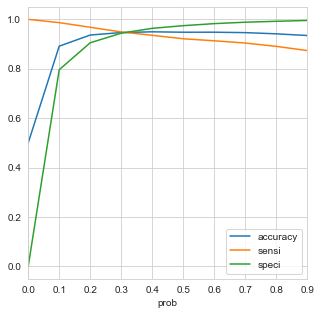

In [244]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize= [3, 3])
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], grid = True, figsize=(5,5))
plt.show()

From the curve above, we will take 0.3 as the optimum cutoff probability.

In [245]:
y_pred_final['final_predicted'] = y_pred_final.Fraud_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_pred_final.head()

TransID  Class  Fraud_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0        0      0    0.051935          0    1    0    0    0    0    0    0   
1        1      0    0.101838          0    1    1    0    0    0    0    0   
2        2      0    0.000198          0    1    0    0    0    0    0    0   
3        3      0    0.023677          0    1    0    0    0    0    0    0   
4        4      0    0.003229          0    1    0    0    0    0    0    0   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    0    0    0                0  
2    0    0    0                0  
3    0    0    0                0  
4    0    0    0                0

#### Metrics Analysis on the train set for Logisitic Regression Model

In [246]:
ModelMetrics(y_pred_final.Class, y_pred_final.final_predicted)

********* Classification Report *********
              precision    recall  f1-score   support

           0       0.95      0.94      0.95    227451
           1       0.94      0.95      0.95    227451

   micro avg       0.95      0.95      0.95    454902
   macro avg       0.95      0.95      0.95    454902
weighted avg       0.95      0.95      0.95    454902

**** Confusion Matrix ****
[[214730  12721]
 [ 11592 215859]]


Accuracy Score: 0.9466
Sensitivity: 0.949
Specificity: 0.9441
False Positive Rate: 0.0559
Positive Predictive Value: 0.9443
Negative Predictive Value: 0.9488
Precision: 0.9443
Recall: 0.949
F1 Score: 0.9466


#### Plotting the ROC Curve for the Train Dataset

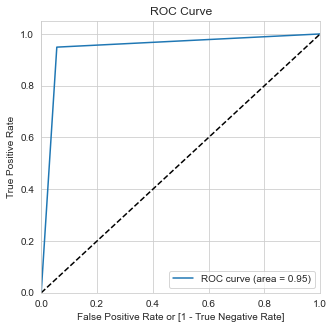

In [247]:
draw_roc(y_pred_final.Class, y_pred_final.final_predicted)

### Decision Tree with SMOTE Balanced Classes

#### Decision tree with default hyperparameters

In [248]:
fraud_tree = DecisionTreeClassifier(max_depth = 10)
fraud_tree.fit(X_train_sm, y_train_sm)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [249]:
# Making predictions
y_train_pred = fraud_tree.predict(X_train_sm)

In [250]:
ModelMetrics(y_train_sm, y_train_pred)

********* Classification Report *********
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    227451
           1       0.99      0.99      0.99    227451

   micro avg       0.99      0.99      0.99    454902
   macro avg       0.99      0.99      0.99    454902
weighted avg       0.99      0.99      0.99    454902

**** Confusion Matrix ****
[[224777   2674]
 [  2346 225105]]


Accuracy Score: 0.989
Sensitivity: 0.9897
Specificity: 0.9882
False Positive Rate: 0.0118
Positive Predictive Value: 0.9883
Negative Predictive Value: 0.9897
Precision: 0.9883
Recall: 0.9897
F1 Score: 0.989


#### Decision tree with hyperparameters tuning : Tuning max_depth

In [251]:
# GridSearchCV to find optimal max_depth

# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", random_state = 100)

# fit tree on training data
tree = GridSearchCV(estimator = dtree, 
                    param_grid = parameters, 
                    cv = n_folds, 
                    return_train_score = True,
                    scoring = "roc_auc")
tree.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(1, 40)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='roc_auc', verbose=0)

In [252]:
cv_results = pd.DataFrame(tree.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
28      27.058876      0.602392         0.084676        0.004925   
26      27.110192      0.558862         0.079013        0.001408   
29      27.131295      0.511703         0.101844        0.014738   
27      27.042941      0.561104         0.083340        0.004028   
23      26.954880      0.118506         0.088340        0.011442   

   param_max_depth             params  split0_test_score  split1_test_score  \
28              29  {'max_depth': 29}           0.998173           0.998050   
26              27  {'max_depth': 27}           0.998127           0.998104   
29              30  {'max_depth': 30}           0.998185           0.998066   
27              28  {'max_depth': 28}           0.998148           0.998083   
23              24  {'max_depth': 24}           0.997995           0.998199   

    split2_test_score  mean_test_score  std_test_score  rank_test_score  \
28           0.998351         0.998192        0.000124                1   
26           0.998313         0.998181        0.000094                2   
29           0.998294         0.998181        0.000093                3   
27           0.998300         0.998177        0.000091                4   
23           0.998293         0.998162        0.000124                5   

    split0_train_score  split1_train_score  split2_train_score  \
28            0.999998            0.999997            0.999997   
26            0.999985            0.999995            0.999993   
29            0.999999            0.999999            0.999997   
27            0.999989            0.999996            0.999995   
23            0.999958            0.999990            0.999982   

    mean_train_score  std_train_score  
28          0.999997     4.585295e-07  
26          0.999991     4.164449e-06  
29          0.999998     6.476059e-07  
27          0.999993     3.071060e-06  
23          0.999977     1.344430e-05

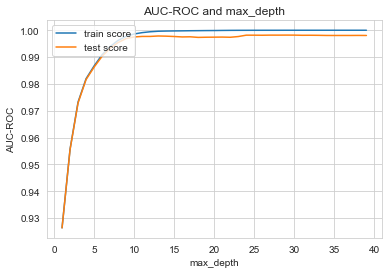

In [253]:
# plotting mean test and train scores with max_depth 
plt.figure(figsize= [6, 4])

plt.plot(cv_results['param_max_depth'], cv_results['mean_train_score'])
plt.plot(cv_results['param_max_depth'], cv_results['mean_test_score'])
plt.xlabel('max_depth')
plt.ylabel('AUC-ROC')
plt.title("AUC-ROC and max_depth")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### Decision tree with hyperparameters tuning : Tuning min_samples_leaf

In [254]:
# GridSearchCV to find optimal min_samples_leaf

# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", random_state = 100)

# fit tree on training data
tree = GridSearchCV(estimator = dtree, 
                    param_grid = parameters, 
                    cv = n_folds, 
                    return_train_score = True,
                    scoring = "roc_auc")
tree.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [255]:
cv_results = pd.DataFrame(tree.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
2      21.900540      1.890539         0.069016        0.001623   
3      20.410663      0.863748         0.064006        0.000816   
5      18.788384      0.765423         0.065671        0.003092   
1      25.488109      2.868065         0.067339        0.004189   
6      18.493944      0.699545         0.073544        0.002911   

  param_min_samples_leaf                     params  split0_test_score  \
2                     45   {'min_samples_leaf': 45}           0.999053   
3                     65   {'min_samples_leaf': 65}           0.998944   
5                    105  {'min_samples_leaf': 105}           0.998819   
1                     25   {'min_samples_leaf': 25}           0.999123   
6                    125  {'min_samples_leaf': 125}           0.998839   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
2           0.998927           0.999076         0.999019        0.000066   
3           0.999077           0.998977         0.998999        0.000056   
5           0.998967           0.998945         0.998910        0.000065   
1           0.998745           0.998801         0.998890        0.000166   
6           0.998911           0.998866         0.998872        0.000030   

   rank_test_score  split0_train_score  split1_train_score  \
2                1            0.999831            0.999833   
3                2            0.999762            0.999720   
5                3            0.999556            0.999515   
1                4            0.999931            0.999931   
6                5            0.999432            0.999401   

   split2_train_score  mean_train_score  std_train_score  
2            0.999843          0.999836     4.954882e-06  
3            0.999730          0.999737     1.792598e-05  
5            0.999504          0.999525     2.238680e-05  
1            0.999930          0.999931     4.558574e-07  
6            0.999380          0.999405     2.139996e-05

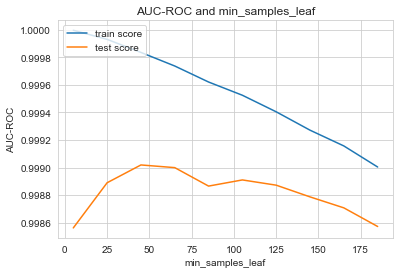

In [256]:
# plotting mean test and train scores with min_samples_leaf
plt.figure(figsize= [6, 4])

plt.plot(cv_results['param_min_samples_leaf'], cv_results['mean_train_score'])
plt.plot(cv_results['param_min_samples_leaf'], cv_results['mean_test_score'])
plt.xlabel('min_samples_leaf')
plt.ylabel('AUC-ROC')
plt.title("AUC-ROC and min_samples_leaf")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### Decision tree with hyperparameters tuning : Tuning min_samples_split

In [257]:
# GridSearchCV to find optimal min_samples_split

# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", random_state = 100)

# fit tree on training data
tree = GridSearchCV(estimator = dtree, 
                    param_grid = parameters, 
                    cv = n_folds, 
                    return_train_score = True,
                    scoring = "roc_auc")
tree.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [258]:
cv_results = pd.DataFrame(tree.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
7      25.276167      1.004232         0.066672        0.002495   
8      25.054132      0.602457         0.073176        0.010272   
9      25.196435      0.695423         0.077006        0.011432   
6      24.732942      0.688615         0.073338        0.003090   
5      26.404916      0.436031         0.070000        0.004326   

  param_min_samples_split                      params  split0_test_score  \
7                     145  {'min_samples_split': 145}           0.998934   
8                     165  {'min_samples_split': 165}           0.998894   
9                     185  {'min_samples_split': 185}           0.998905   
6                     125  {'min_samples_split': 125}           0.998880   
5                     105  {'min_samples_split': 105}           0.998829   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
7           0.998783           0.998826         0.998848        0.000064   
8           0.998794           0.998825         0.998838        0.000042   
9           0.998701           0.998881         0.998829        0.000091   
6           0.998736           0.998779         0.998798        0.000060   
5           0.998670           0.998793         0.998764        0.000068   

   rank_test_score  split0_train_score  split1_train_score  \
7                1            0.999939            0.999944   
8                2            0.999922            0.999925   
9                3            0.999911            0.999912   
6                4            0.999959            0.999953   
5                5            0.999966            0.999966   

   split2_train_score  mean_train_score  std_train_score  
7            0.999936          0.999940     3.349588e-06  
8            0.999914          0.999920     4.776662e-06  
9            0.999899          0.999907     5.877926e-06  
6            0.999951          0.999954     3.289473e-06  
5            0.999966          0.999966     2.478057e-07

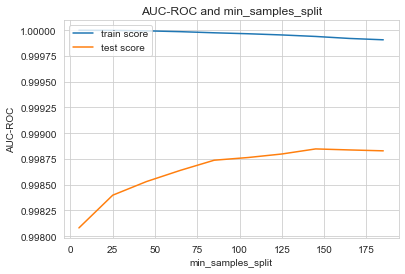

In [259]:
# plotting mean test and train scores with min_samples_split
plt.figure(figsize= [6, 4])

plt.plot(cv_results['param_min_samples_split'], cv_results['mean_train_score'])
plt.plot(cv_results['param_min_samples_split'], cv_results['mean_test_score'])
plt.xlabel('min_samples_split')
plt.ylabel('AUC-ROC')
plt.title("AUC-ROC and min_samples_split")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### Fitting the final model with the best parameters obtained from grid search

In [260]:
# model with optimal hyperparameters
tree_final = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=29, 
                                  min_samples_leaf=45,
                                  min_samples_split=145)
tree_final.fit(X_train_sm, y_train_sm)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=29,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=45, min_samples_split=145,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

#### Predictions on the train set

In [261]:
y_train_pred = tree_final.predict(X_train_sm)

#### Metrics Analysis on the train set for Decision Tree

In [262]:
ModelMetrics(y_train_sm, y_train_pred)

********* Classification Report *********
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    227451
           1       0.99      0.99      0.99    227451

   micro avg       0.99      0.99      0.99    454902
   macro avg       0.99      0.99      0.99    454902
weighted avg       0.99      0.99      0.99    454902

**** Confusion Matrix ****
[[225948   1503]
 [  1223 226228]]


Accuracy Score: 0.994
Sensitivity: 0.9946
Specificity: 0.9934
False Positive Rate: 0.0066
Positive Predictive Value: 0.9934
Negative Predictive Value: 0.9946
Precision: 0.9934
Recall: 0.9946
F1 Score: 0.994


#### Plotting the ROC Curve for the Train Dataset

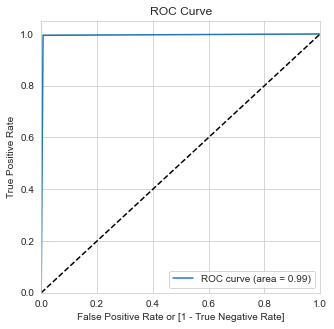

In [263]:
draw_roc(y_train_sm, y_train_pred)

### Random Forest with SMOTE Balanced Classes

#### Random Forest with default hyperparameters

In [264]:
fraud_forest = RandomForestClassifier(max_depth = 5)
fraud_forest.fit(X_train_sm, y_train_sm)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [265]:
# Making predictions
y_train_pred = fraud_forest.predict(X_train_sm)

In [266]:
ModelMetrics(y_train_sm, y_train_pred)

********* Classification Report *********
              precision    recall  f1-score   support

           0       0.90      0.99      0.95    227451
           1       0.99      0.90      0.94    227451

   micro avg       0.95      0.95      0.95    454902
   macro avg       0.95      0.95      0.94    454902
weighted avg       0.95      0.95      0.94    454902

**** Confusion Matrix ****
[[226214   1237]
 [ 23769 203682]]


Accuracy Score: 0.945
Sensitivity: 0.8955
Specificity: 0.9946
False Positive Rate: 0.0054
Positive Predictive Value: 0.994
Negative Predictive Value: 0.9049
Precision: 0.994
Recall: 0.8955
F1 Score: 0.9422


#### Random forest with hyperparameters tuning : Tuning max_depth

In [267]:
# GridSearchCV to find optimal max_depth

# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier(criterion = "gini", random_state = 100)

# fit random forest on training data
rf = GridSearchCV(estimator = rf, 
                    param_grid = parameters, 
                    cv = n_folds, 
                    return_train_score = True,
                    scoring = "roc_auc")
rf.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(2, 20, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='roc_auc', verbose=0)

In [268]:
cv_results = pd.DataFrame(rf.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
3      24.708694      2.180112         0.254353        0.022426   
2      19.542653      0.203064         0.210690        0.003099   
1      13.415301      0.445470         0.176864        0.007887   
0       4.799482      0.097086         0.146389        0.002113   

  param_max_depth             params  split0_test_score  split1_test_score  \
3              17  {'max_depth': 17}           0.999968           0.999937   
2              12  {'max_depth': 12}           0.999792           0.999822   
1               7   {'max_depth': 7}           0.995690           0.995909   
0               2   {'max_depth': 2}           0.958253           0.959048   

   split2_test_score  mean_test_score  std_test_score  rank_test_score  \
3           0.999993         0.999966        0.000023                1   
2           0.999852         0.999822        0.000024                2   
1           0.995422         0.995674        0.000199                3   
0           0.954980         0.957427        0.001761                4   

   split0_train_score  split1_train_score  split2_train_score  \
3            0.999999            0.999999            1.000000   
2            0.999859            0.999899            0.999879   
1            0.996004            0.995934            0.995452   
0            0.958310            0.958780            0.955641   

   mean_train_score  std_train_score  
3          0.999999     3.838255e-07  
2          0.999879     1.639629e-05  
1          0.995796     2.453641e-04  
0          0.957577     1.382436e-03

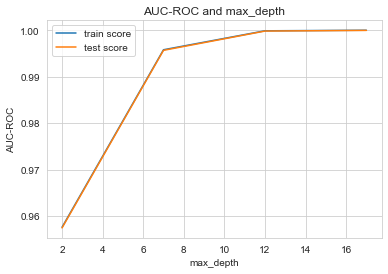

In [269]:
# plotting mean test and train scores with max_depth 
plt.figure(figsize= [6, 4])

plt.plot(cv_results['param_max_depth'], cv_results['mean_train_score'])
plt.plot(cv_results['param_max_depth'], cv_results['mean_test_score'])
plt.xlabel('max_depth')
plt.ylabel('AUC-ROC')
plt.title("AUC-ROC and max_depth")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### Random Forest with hyperparameters tuning : Tuning n_estimators

In [270]:
# GridSearchCV to find optimal n_estimators

# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'n_estimators': range(100, 500, 100)}

# instantiate the model
rf = RandomForestClassifier(criterion = "gini", random_state = 100, max_depth=4)

# fit random forest on training data
rf = GridSearchCV(estimator = rf, 
                    param_grid = parameters, 
                    cv = n_folds, 
                    return_train_score = True,
                    scoring = "roc_auc")
rf.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': range(100, 500, 100)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [271]:
cv_results = pd.DataFrame(rf.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      82.849632      2.451529         1.067581        0.023718   
2     245.945553      0.678956         3.077226        0.057484   
3     329.477956      0.954581         4.152191        0.043981   
1     165.661094      1.565549         2.137835        0.118224   

  param_n_estimators                 params  split0_test_score  \
0                100  {'n_estimators': 100}           0.987934   
2                300  {'n_estimators': 300}           0.987912   
3                400  {'n_estimators': 400}           0.987863   
1                200  {'n_estimators': 200}           0.987842   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.988679           0.988478         0.988364        0.000315   
2           0.988791           0.988368         0.988357        0.000359   
3           0.988649           0.988203         0.988239        0.000322   
1           0.988560           0.988136         0.988179        0.000295   

   rank_test_score  split0_train_score  split1_train_score  \
0                1            0.988290            0.988495   
2                2            0.988302            0.988614   
3                3            0.988253            0.988477   
1                4            0.988217            0.988364   

   split2_train_score  mean_train_score  std_train_score  
0            0.988638          0.988474         0.000143  
2            0.988502          0.988473         0.000129  
3            0.988336          0.988356         0.000092  
1            0.988273          0.988285         0.000061

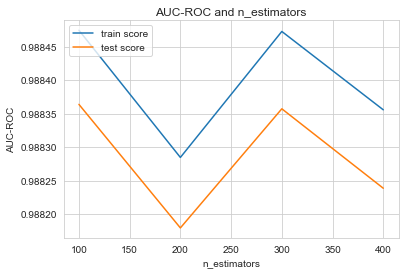

In [272]:
# plotting mean test and train scores with n_estimators
plt.figure(figsize= [6, 4])

plt.plot(cv_results['param_n_estimators'], cv_results['mean_train_score'])
plt.plot(cv_results['param_n_estimators'], cv_results['mean_test_score'])
plt.xlabel('n_estimators')
plt.ylabel('AUC-ROC')
plt.title("AUC-ROC and n_estimators")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### Random Forest with hyperparameters tuning : Tuning max_features

In [273]:
# GridSearchCV to find optimal max_features

# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(criterion = "gini", random_state = 100, max_depth=4)

# fit random forest on training data
rf = GridSearchCV(estimator = rf, 
                    param_grid = parameters, 
                    cv = n_folds, 
                    return_train_score = True,
                    scoring = "roc_auc")
rf.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_features': [4, 8, 14, 20, 24]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [274]:
cv_results = pd.DataFrame(rf.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
3      30.461170      0.492326         0.152345        0.002494   
4      35.617196      0.948237         0.148011        0.004967   
2      21.782754      0.478347         0.159225        0.002082   
1      13.780476      0.522152         0.172679        0.013475   
0       7.525075      0.349446         0.176013        0.012754   

  param_max_features                params  split0_test_score  \
3                 20  {'max_features': 20}           0.988800   
4                 24  {'max_features': 24}           0.986704   
2                 14  {'max_features': 14}           0.986542   
1                  8   {'max_features': 8}           0.985491   
0                  4   {'max_features': 4}           0.974009   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
3           0.988663           0.988784         0.988749        0.000061   
4           0.988625           0.986194         0.987174        0.001047   
2           0.986612           0.986880         0.986678        0.000146   
1           0.987121           0.985909         0.986174        0.000691   
0           0.974529           0.972693         0.973744        0.000773   

   rank_test_score  split0_train_score  split1_train_score  \
3                1            0.989028            0.988751   
4                2            0.987151            0.988735   
2                3            0.987071            0.986631   
1                4            0.985878            0.986874   
0                5            0.973907            0.974647   

   split2_train_score  mean_train_score  std_train_score  
3            0.988813          0.988864         0.000119  
4            0.986229          0.987372         0.001035  
2            0.986843          0.986848         0.000180  
1            0.986054          0.986269         0.000434  
0            0.973479          0.974011         0.000482

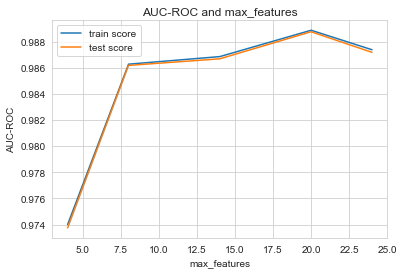

In [275]:
# plotting mean test and train scores with max_features
plt.figure(figsize= [6, 4])

plt.plot(cv_results['param_max_features'], cv_results['mean_train_score'])
plt.plot(cv_results['param_max_features'], cv_results['mean_test_score'])
plt.xlabel('max_features')
plt.ylabel('AUC-ROC')
plt.title("AUC-ROC and max_features")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### Random forest with hyperparameters tuning : Tuning min_samples_leaf

In [276]:
# GridSearchCV to find optimal min_samples_leaf

# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(criterion = "gini", random_state = 100)

# fit random forest on training data
rf = GridSearchCV(estimator = rf, 
                    param_grid = parameters, 
                    cv = n_folds, 
                    return_train_score = True,
                    scoring = "roc_auc")
rf.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': range(100, 400, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [277]:
cv_results = pd.DataFrame(rf.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      20.556522      0.305592         0.225429        0.008675   
1      19.692942      0.506946         0.213016        0.002160   
2      19.172541      0.214292         0.219025        0.003744   
3      19.974261      1.890437         0.227294        0.014090   
4      18.705173      0.517341         0.209034        0.001402   

  param_min_samples_leaf                     params  split0_test_score  \
0                    100  {'min_samples_leaf': 100}           0.999851   
1                    150  {'min_samples_leaf': 150}           0.999697   
2                    200  {'min_samples_leaf': 200}           0.999598   
3                    250  {'min_samples_leaf': 250}           0.999494   
4                    300  {'min_samples_leaf': 300}           0.999395   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.999826           0.999867         0.999848        0.000017   
1           0.999746           0.999763         0.999735        0.000028   
2           0.999604           0.999568         0.999590        0.000016   
3           0.999477           0.999571         0.999514        0.000041   
4           0.999347           0.999302         0.999348        0.000038   

   rank_test_score  split0_train_score  split1_train_score  \
0                1            0.999884            0.999889   
1                2            0.999753            0.999809   
2                3            0.999679            0.999679   
3                4            0.999553            0.999563   
4                5            0.999477            0.999452   

   split2_train_score  mean_train_score  std_train_score  
0            0.999875          0.999883         0.000006  
1            0.999776          0.999779         0.000023  
2            0.999610          0.999656         0.000033  
3            0.999593          0.999570         0.000017  
4            0.999327          0.999419         0.000065

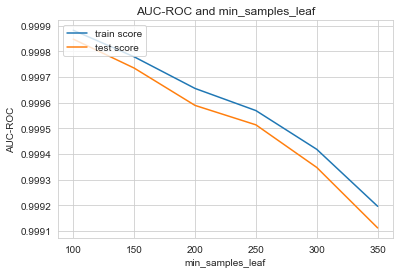

In [278]:
# plotting mean test and train scores with min_samples_leaf
plt.figure(figsize= [6, 4])

plt.plot(cv_results['param_min_samples_leaf'], cv_results['mean_train_score'])
plt.plot(cv_results['param_min_samples_leaf'], cv_results['mean_test_score'])
plt.xlabel('min_samples_leaf')
plt.ylabel('AUC-ROC')
plt.title("AUC-ROC and min_samples_leaf")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### Random forest with hyperparameters tuning : Tuning min_samples_split

In [279]:
# GridSearchCV to find optimal min_samples_split

# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(criterion = "gini", random_state = 100)

# fit random forest on training data
rf = GridSearchCV(estimator = rf, 
                    param_grid = parameters, 
                    cv = n_folds, 
                    return_train_score = True,
                    scoring = "roc_auc")
rf.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(200, 500, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [280]:
cv_results = pd.DataFrame(rf.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      22.460916      0.371995         0.223685        0.001248   
1      22.516816      0.385683         0.245020        0.004900   
2      22.760930      0.451824         0.231689        0.004789   
3      22.419854      0.274167         0.218016        0.002160   
4      22.595279      0.291371         0.237031        0.013159   

  param_min_samples_split                      params  split0_test_score  \
0                     200  {'min_samples_split': 200}           0.999972   
1                     250  {'min_samples_split': 250}           0.999967   
2                     300  {'min_samples_split': 300}           0.999950   
3                     350  {'min_samples_split': 350}           0.999939   
4                     400  {'min_samples_split': 400}           0.999921   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.999937           0.999981         0.999963        0.000019   
1           0.999933           0.999978         0.999959        0.000019   
2           0.999924           0.999972         0.999948        0.000020   
3           0.999917           0.999941         0.999932        0.000011   
4           0.999927           0.999941         0.999930        0.000008   

   rank_test_score  split0_train_score  split1_train_score  \
0                1            0.999995            0.999996   
1                2            0.999991            0.999992   
2                3            0.999983            0.999985   
3                4            0.999970            0.999979   
4                5            0.999964            0.999972   

   split2_train_score  mean_train_score  std_train_score  
0            0.999993          0.999995     8.803863e-07  
1            0.999991          0.999991     3.938921e-07  
2            0.999985          0.999984     1.179895e-06  
3            0.999963          0.999971     6.417401e-06  
4            0.999967          0.999968     3.132859e-06

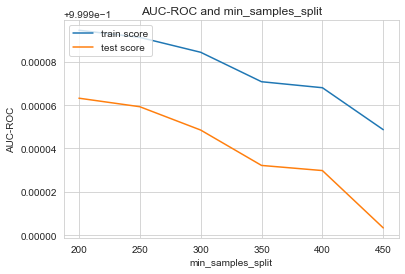

In [281]:
# plotting mean test and train scores with min_samples_split
plt.figure(figsize= [6, 4])

plt.plot(cv_results['param_min_samples_split'], cv_results['mean_train_score'])
plt.plot(cv_results['param_min_samples_split'], cv_results['mean_test_score'])
plt.xlabel('min_samples_split')
plt.ylabel('AUC-ROC')
plt.title("AUC-ROC and min_samples_split")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### Fitting the final model with the best parameters obtained from grid search

In [282]:
# model with optimal hyperparameters
rf_final = RandomForestClassifier(bootstrap=True,
                                     max_depth=17,
                                     min_samples_leaf=100, 
                                     min_samples_split=200,
                                     max_features=20,
                                     n_estimators=100,
                                     criterion = "gini", 
                                    random_state = 100)
rf_final.fit(X_train_sm, y_train_sm)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=17, max_features=20, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=200,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

#### Predictions on the train set

In [283]:
y_train_pred = rf_final.predict(X_train_sm)

#### Metrics Analysis on the train set for Random Forest

In [284]:
ModelMetrics(y_train_sm, y_train_pred)

********* Classification Report *********
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

   micro avg       1.00      1.00      1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902

**** Confusion Matrix ****
[[226874    577]
 [  1007 226444]]


Accuracy Score: 0.9965
Sensitivity: 0.9956
Specificity: 0.9975
False Positive Rate: 0.0025
Positive Predictive Value: 0.9975
Negative Predictive Value: 0.9956
Precision: 0.9975
Recall: 0.9956
F1 Score: 0.9965


#### Plotting the ROC Curve for the Train Dataset

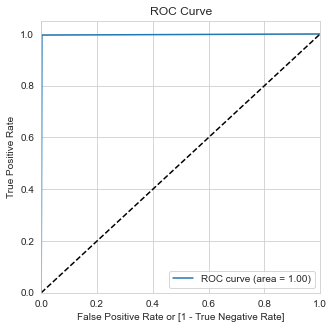

In [285]:
draw_roc(y_train_sm, y_train_pred)

### XGBoost with SMOTE Balanced Classes

#### XGBoost with default hyperparameters

In [286]:
fraud_xgboost = XGBClassifier()
fraud_xgboost.fit(X_train_sm, y_train_sm)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
       validate_parameters=False, verbosity=None)

In [287]:
# Making predictions
y_train_pred = fraud_xgboost.predict(X_train_sm)

In [288]:
ModelMetrics(y_train_sm, y_train_sm)

********* Classification Report *********
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

   micro avg       1.00      1.00      1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902

**** Confusion Matrix ****
[[227451      0]
 [     0 227451]]


Accuracy Score: 1.0
Sensitivity: 1.0
Specificity: 1.0
False Positive Rate: 0.0
Positive Predictive Value: 1.0
Negative Predictive Value: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


#### XGBoost with hyperparameters tuning : Tuning max_depth

In [289]:
# GridSearchCV to find optimal max_depth

# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_depth' : range(3,10,2)}

# instantiate the model
xgb_model = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=5,
                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

# fit the model on training data
xgb = GridSearchCV(estimator = xgb_model, 
                    param_grid = parameters, 
                    cv = n_folds, 
                    return_train_score = True,
                    scoring = "roc_auc")
xgb.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=0.8, gamma=0, gpu_id=None,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.1, max_delta_step=None, max_depth=5,
       min_child_weight=1,...eight=1, seed=27, subsample=0.8,
       tree_method=None, validate_parameters=False, verbosity=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(3, 10, 2)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='roc_auc', verbose=0)

In [290]:
cv_results = pd.DataFrame(xgb.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
3     109.431547      0.511754         0.706102        0.030108   
2      90.083649      0.143648         0.608557        0.035302   
1      65.032681      1.739831         0.460037        0.013144   
0      39.400431      0.215583         0.334359        0.007543   

  param_max_depth            params  split0_test_score  split1_test_score  \
3               9  {'max_depth': 9}           0.999988           0.999968   
2               7  {'max_depth': 7}           0.999988           0.999960   
1               5  {'max_depth': 5}           0.999942           0.999931   
0               3  {'max_depth': 3}           0.999380           0.999430   

   split2_test_score  mean_test_score  std_test_score  rank_test_score  \
3           0.999997         0.999984        0.000012                1   
2           0.999996         0.999981        0.000016                2   
1           0.999972         0.999948        0.000017                3   
0           0.999461         0.999424        0.000033                4   

   split0_train_score  split1_train_score  split2_train_score  \
3            1.000000            1.000000            1.000000   
2            0.999999            1.000000            1.000000   
1            0.999970            0.999981            0.999980   
0            0.999466            0.999501            0.999448   

   mean_train_score  std_train_score  
3          1.000000     0.000000e+00  
2          1.000000     1.277456e-07  
1          0.999977     5.073360e-06  
0          0.999472     2.194290e-05

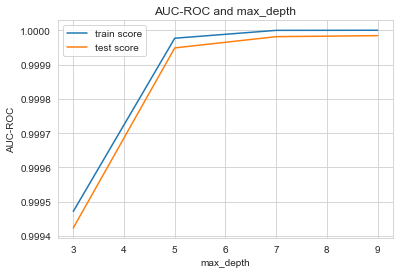

In [291]:
# plotting mean test and train scores with max_depth 
plt.figure(figsize= [6, 4])

plt.plot(cv_results['param_max_depth'], cv_results['mean_train_score'])
plt.plot(cv_results['param_max_depth'], cv_results['mean_test_score'])
plt.xlabel('max_depth')
plt.ylabel('AUC-ROC')
plt.title("AUC-ROC and max_depth")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### XGBoost with hyperparameters tuning : Tuning min_child_weight

In [292]:
# GridSearchCV to find optimal min_child_weight

# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_child_weight':range(1,6,2)}

# instantiate the model
xgb_model = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=5,
                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

# fit the model on training data
xgb = GridSearchCV(estimator = xgb_model, 
                    param_grid = parameters, 
                    cv = n_folds, 
                    return_train_score = True,
                    scoring = "roc_auc")
xgb.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=0.8, gamma=0, gpu_id=None,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.1, max_delta_step=None, max_depth=5,
       min_child_weight=1,...eight=1, seed=27, subsample=0.8,
       tree_method=None, validate_parameters=False, verbosity=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_child_weight': range(1, 6, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [293]:
cv_results = pd.DataFrame(xgb.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      66.679275      0.482750         0.488053        0.008652   
1      66.050694      0.338209         0.467047        0.015108   
2      65.461205      0.334060         0.465200        0.024953   

  param_min_child_weight                   params  split0_test_score  \
0                      1  {'min_child_weight': 1}           0.999942   
1                      3  {'min_child_weight': 3}           0.999930   
2                      5  {'min_child_weight': 5}           0.999930   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.999931           0.999972         0.999948        0.000017   
1           0.999931           0.999961         0.999941        0.000015   
2           0.999923           0.999963         0.999939        0.000017   

   rank_test_score  split0_train_score  split1_train_score  \
0                1            0.999970            0.999981   
1                2            0.999957            0.999980   
2                3            0.999955            0.999968   

   split2_train_score  mean_train_score  std_train_score  
0            0.999980          0.999977         0.000005  
1            0.999968          0.999968         0.000010  
2            0.999960          0.999961         0.000005

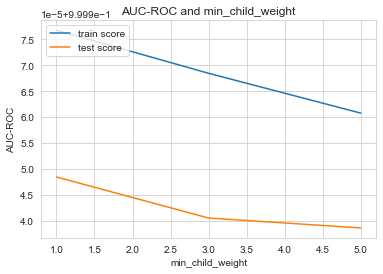

In [294]:
# plotting mean test and train scores with min_child_weight 
plt.figure(figsize= [6, 4])

plt.plot(cv_results['param_min_child_weight'], cv_results['mean_train_score'])
plt.plot(cv_results['param_min_child_weight'], cv_results['mean_test_score'])
plt.xlabel('min_child_weight')
plt.ylabel('AUC-ROC')
plt.title("AUC-ROC and min_child_weight")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### XGBoost with hyperparameters tuning : Tuning gamma

In [295]:
# GridSearchCV to find optimal gamma

# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'gamma':[i/5.0 for i in range(0,5)]}

# instantiate the model
xgb_model = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=5,
                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

# fit the model on training data
xgb = GridSearchCV(estimator = xgb_model, 
                    param_grid = parameters, 
                    cv = n_folds, 
                    return_train_score = True,
                    scoring = "roc_auc")
xgb.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=0.8, gamma=0, gpu_id=None,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.1, max_delta_step=None, max_depth=5,
       min_child_weight=1,...eight=1, seed=27, subsample=0.8,
       tree_method=None, validate_parameters=False, verbosity=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'gamma': [0.0, 0.2, 0.4, 0.6, 0.8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [296]:
cv_results = pd.DataFrame(xgb.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_gamma  \
1      63.900185      0.265787         0.468708        0.029487         0.2   
4      69.202426      0.353847         0.509382        0.028828         0.8   
3      72.290371      0.454180         0.477223        0.018526         0.6   
2      75.364835      2.842496         0.477875        0.012427         0.4   
0      71.140352      0.553207         0.462542        0.017442           0   

           params  split0_test_score  split1_test_score  split2_test_score  \
1  {'gamma': 0.2}           0.999951           0.999936           0.999966   
4  {'gamma': 0.8}           0.999941           0.999942           0.999970   
3  {'gamma': 0.6}           0.999948           0.999933           0.999968   
2  {'gamma': 0.4}           0.999947           0.999934           0.999968   
0  {'gamma': 0.0}           0.999942           0.999931           0.999972   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
1         0.999951        0.000012                1            0.999973   
4         0.999951        0.000014                2            0.999969   
3         0.999950        0.000014                3            0.999972   
2         0.999949        0.000014                4            0.999973   
0         0.999948        0.000017                5            0.999970   

   split1_train_score  split2_train_score  mean_train_score  std_train_score  
1            0.999983            0.999972          0.999976         0.000005  
4            0.999984            0.999976          0.999976         0.000006  
3            0.999985            0.999978          0.999978         0.000005  
2            0.999983            0.999970          0.999975         0.000005  
0            0.999981            0.999980          0.999977         0.000005

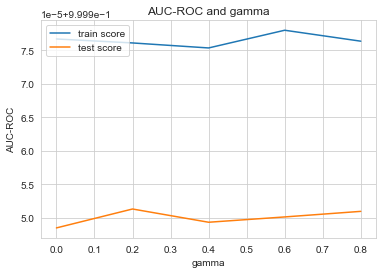

In [297]:
# plotting mean test and train scores with gamma 
plt.figure(figsize= [6, 4])

plt.plot(cv_results['param_gamma'], cv_results['mean_train_score'])
plt.plot(cv_results['param_gamma'], cv_results['mean_test_score'])
plt.xlabel('gamma')
plt.ylabel('AUC-ROC')
plt.title("AUC-ROC and gamma")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### XGBoost with hyperparameters tuning : Tuning subsample and colsample_bytree

In [298]:
# GridSearchCV to find optimal subsample and colsample_bytree

# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {
            'subsample':[i/10.0 for i in range(6,10)],
            'colsample_bytree':[i/10.0 for i in range(6,10)]
            }

# instantiate the model
xgb_model = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=5,
                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

# fit the model on training data
xgb = GridSearchCV(estimator = xgb_model, 
                    param_grid = parameters, 
                    cv = n_folds, 
                    return_train_score = True,
                    scoring = "roc_auc")
xgb.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=0.8, gamma=0, gpu_id=None,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.1, max_delta_step=None, max_depth=5,
       min_child_weight=1,...eight=1, seed=27, subsample=0.8,
       tree_method=None, validate_parameters=False, verbosity=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'subsample': [0.6, 0.7, 0.8, 0.9], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [299]:
cv_results = pd.DataFrame(xgb.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
14      87.545122      2.481262         0.549567        0.045794   
12      85.105234      5.628509         0.532727        0.032974   
9       71.925199      2.011454         0.508414        0.012025   
13      97.649273      0.801689         0.559381        0.016663   
10      73.417949      4.471240         0.480538        0.024744   

   param_colsample_bytree param_subsample  \
14                    0.9             0.8   
12                    0.9             0.6   
9                     0.8             0.7   
13                    0.9             0.7   
10                    0.8             0.8   

                                         params  split0_test_score  \
14  {'colsample_bytree': 0.9, 'subsample': 0.8}           0.999954   
12  {'colsample_bytree': 0.9, 'subsample': 0.6}           0.999948   
9   {'colsample_bytree': 0.8, 'subsample': 0.7}           0.999947   
13  {'colsample_bytree': 0.9, 'subsample': 0.7}           0.999947   
10  {'colsample_bytree': 0.8, 'subsample': 0.8}           0.999942   

    split1_test_score  split2_test_score  mean_test_score  std_test_score  \
14           0.999924           0.999974         0.999951        0.000020   
12           0.999935           0.999968         0.999950        0.000014   
9            0.999937           0.999967         0.999950        0.000013   
13           0.999937           0.999966         0.999950        0.000012   
10           0.999931           0.999972         0.999948        0.000017   

    rank_test_score  split0_train_score  split1_train_score  \
14                1            0.999973            0.999982   
12                2            0.999974            0.999984   
9                 3            0.999972            0.999984   
13                4            0.999968            0.999983   
10                5            0.999970            0.999981   

    split2_train_score  mean_train_score  std_train_score  
14            0.999979          0.999978         0.000004  
12            0.999971          0.999976         0.000006  
9             0.999971          0.999975         0.000006  
13            0.999974          0.999975         0.000006  
10            0.999980          0.999977         0.000005

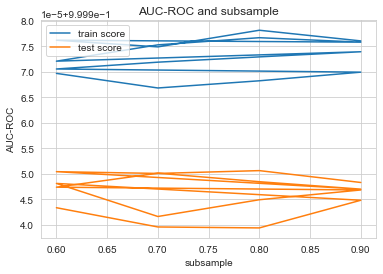

In [300]:
# plotting mean test and train scores with subsample 
plt.figure(figsize= [6, 4])

plt.plot(cv_results['param_subsample'], cv_results['mean_train_score'])
plt.plot(cv_results['param_subsample'], cv_results['mean_test_score'])
plt.xlabel('subsample')
plt.ylabel('AUC-ROC')
plt.title("AUC-ROC and subsample")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

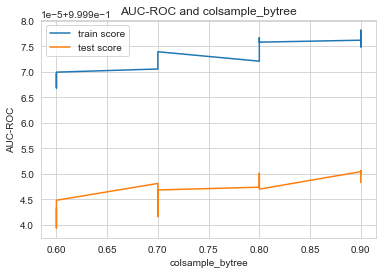

In [301]:
# plotting mean test and train scores with colsample_bytree 
plt.figure(figsize= [6, 4])

plt.plot(cv_results['param_colsample_bytree'], cv_results['mean_train_score'])
plt.plot(cv_results['param_colsample_bytree'], cv_results['mean_test_score'])
plt.xlabel('colsample_bytree')
plt.ylabel('AUC-ROC')
plt.title("AUC-ROC and colsample_bytree")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### XGBoost with hyperparameters tuning : Tuning regularization parameters

In [302]:
# GridSearchCV to find optimal regularization parameters

# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]}

# instantiate the model
xgb_model = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=5,
                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

# fit the model on training data
xgb = GridSearchCV(estimator = xgb_model, 
                    param_grid = parameters, 
                    cv = n_folds, 
                    return_train_score = True,
                    scoring = "roc_auc")
xgb.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=0.8, gamma=0, gpu_id=None,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.1, max_delta_step=None, max_depth=5,
       min_child_weight=1,...eight=1, seed=27, subsample=0.8,
       tree_method=None, validate_parameters=False, verbosity=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'reg_alpha': [0, 0.001, 0.005, 0.01, 0.05]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [303]:
cv_results = pd.DataFrame(xgb.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
3      69.999328      1.256790         1.107854        0.844710   
0     109.431365     21.043784         0.497540        0.023288   
2      87.655731     28.407402         0.506549        0.009119   
4      88.974740     20.815536         0.542728        0.031316   
1      84.898936     22.939090         0.547049        0.031796   

  param_reg_alpha                params  split0_test_score  split1_test_score  \
3            0.01   {'reg_alpha': 0.01}           0.999944           0.999931   
0               0      {'reg_alpha': 0}           0.999942           0.999931   
2           0.005  {'reg_alpha': 0.005}           0.999938           0.999934   
4            0.05   {'reg_alpha': 0.05}           0.999938           0.999933   
1           0.001  {'reg_alpha': 0.001}           0.999936           0.999931   

   split2_test_score  mean_test_score  std_test_score  rank_test_score  \
3           0.999972         0.999949        0.000017                1   
0           0.999972         0.999948        0.000017                2   
2           0.999970         0.999947        0.000016                3   
4           0.999970         0.999947        0.000017                4   
1           0.999972         0.999946        0.000018                5   

   split0_train_score  split1_train_score  split2_train_score  \
3            0.999972            0.999978            0.999979   
0            0.999970            0.999981            0.999980   
2            0.999971            0.999981            0.999979   
4            0.999966            0.999980            0.999974   
1            0.999967            0.999981            0.999980   

   mean_train_score  std_train_score  
3          0.999976         0.000003  
0          0.999977         0.000005  
2          0.999977         0.000004  
4          0.999973         0.000006  
1          0.999976         0.000007

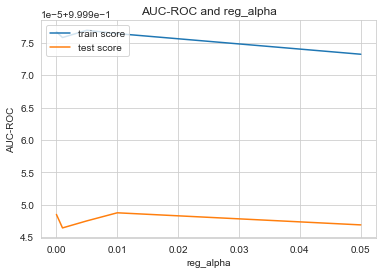

In [304]:
# plotting mean test and train scores with reg_alpha 
plt.figure(figsize= [6, 4])

plt.plot(cv_results['param_reg_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_reg_alpha'], cv_results['mean_test_score'])
plt.xlabel('reg_alpha')
plt.ylabel('AUC-ROC')
plt.title("AUC-ROC and reg_alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### XGBoost with hyperparameters tuning : Tuning learning rate

In [305]:
# GridSearchCV to find optimal learning rate

# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'learning_rate':[.05, .01, .005]}

# instantiate the model
xgb_model = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=5,
                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

# fit the model on training data
xgb = GridSearchCV(estimator = xgb_model, 
                    param_grid = parameters, 
                    cv = n_folds, 
                    return_train_score = True,
                    scoring = "roc_auc")
xgb.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=0.8, gamma=0, gpu_id=None,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.1, max_delta_step=None, max_depth=5,
       min_child_weight=1,...eight=1, seed=27, subsample=0.8,
       tree_method=None, validate_parameters=False, verbosity=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.05, 0.01, 0.005]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [306]:
cv_results = pd.DataFrame(xgb.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0     170.897614    141.140079         0.456036        0.041886   
1      69.577006      8.686560         0.379211        0.022679   
2      63.695231      2.628097         0.411879        0.046385   

  param_learning_rate                    params  split0_test_score  \
0                0.05   {'learning_rate': 0.05}           0.999645   
1                0.01   {'learning_rate': 0.01}           0.996632   
2               0.005  {'learning_rate': 0.005}           0.994598   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.999672           0.999708         0.999675        0.000025   
1           0.996769           0.996813         0.996738        0.000077   
2           0.994859           0.994708         0.994722        0.000107   

   rank_test_score  split0_train_score  split1_train_score  \
0                1            0.999716            0.999744   
1                2            0.996763            0.996913   
2                3            0.994874            0.994989   

   split2_train_score  mean_train_score  std_train_score  
0            0.999730          0.999730         0.000011  
1            0.996921          0.996866         0.000073  
2            0.994790          0.994884         0.000082

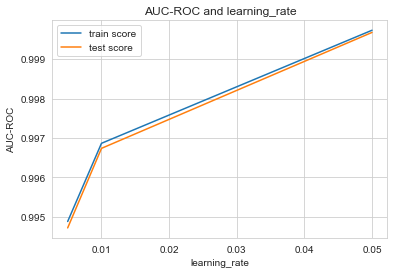

In [307]:
# plotting mean test and train scores with learning_rate 
plt.figure(figsize= [6, 4])

plt.plot(cv_results['param_learning_rate'], cv_results['mean_train_score'])
plt.plot(cv_results['param_learning_rate'], cv_results['mean_test_score'])
plt.xlabel('learning_rate')
plt.ylabel('AUC-ROC')
plt.title("AUC-ROC and learning_rate")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### XGBoost with hyperparameters tuning : Tuning n_estimators

In [308]:
# GridSearchCV to find optimal n_estimators

# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'n_estimators':range(200, 1000, 200)}

# instantiate the model
xgb_model = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=5,
                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

# fit the model on training data
xgb = GridSearchCV(estimator = xgb_model, 
                    param_grid = parameters, 
                    cv = n_folds, 
                    return_train_score = True,
                    scoring = "roc_auc")
xgb.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=0.8, gamma=0, gpu_id=None,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.1, max_delta_step=None, max_depth=5,
       min_child_weight=1,...eight=1, seed=27, subsample=0.8,
       tree_method=None, validate_parameters=False, verbosity=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': range(200, 1000, 200)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [309]:
cv_results = pd.DataFrame(xgb.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
3     937.520093    682.871477         2.015848        0.140160   
2     297.759135      4.290939         1.724677        0.069540   
1     185.053937      1.044295         1.020586        0.007182   
0      94.926853      0.414776         0.594883        0.019691   

  param_n_estimators                 params  split0_test_score  \
3                800  {'n_estimators': 800}           0.999995   
2                600  {'n_estimators': 600}           0.999995   
1                400  {'n_estimators': 400}           0.999993   
0                200  {'n_estimators': 200}           0.999977   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
3           0.999981           1.000000         0.999992        0.000008   
2           0.999979           1.000000         0.999991        0.000009   
1           0.999972           0.999999         0.999988        0.000012   
0           0.999956           0.999991         0.999975        0.000014   

   rank_test_score  split0_train_score  split1_train_score  \
3                1            1.000000            1.000000   
2                2            1.000000            1.000000   
1                3            1.000000            1.000000   
0                4            0.999994            0.999997   

   split2_train_score  mean_train_score  std_train_score  
3            1.000000          1.000000     0.000000e+00  
2            1.000000          1.000000     0.000000e+00  
1            1.000000          1.000000     6.409876e-17  
0            0.999995          0.999995     1.219957e-06

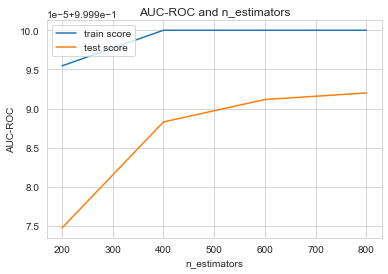

In [310]:
# plotting mean test and train scores with n_estimators 
plt.figure(figsize= [6, 4])

plt.plot(cv_results['param_n_estimators'], cv_results['mean_train_score'])
plt.plot(cv_results['param_n_estimators'], cv_results['mean_test_score'])
plt.xlabel('n_estimators')
plt.ylabel('AUC-ROC')
plt.title("AUC-ROC and n_estimators")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### Fitting the final model with the best parameters obtained from grid search

In [311]:
# model with optimal hyperparameters
xgb_final = XGBClassifier(learning_rate = 0.05,
                         n_estimators = 800,
                         max_depth = 9,
                         min_child_weight = 1,
                         gamma = 0.2,
                         subsample = 0.8,
                         colsample_bytree = 0.9,
                         reg_alpha = 0.01,
                         objective = 'binary:logistic',
                         nthread = 4,
                         scale_pos_weight = 1,
                         seed = 27)
xgb_final.fit(X_train_sm, y_train_sm)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.9, gamma=0.2, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.05, max_delta_step=0, max_depth=9,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=800, n_jobs=4, nthread=4, num_parallel_tree=1,
       objective='binary:logistic', random_state=27, reg_alpha=0.01,
       reg_lambda=1, scale_pos_weight=1, seed=27, subsample=0.8,
       tree_method=None, validate_parameters=False, verbosity=None)

#### Predictions on the train set

In [312]:
y_train_pred = xgb_final.predict(X_train_sm)

#### Metrics Analysis on the train set for XGBoost

In [313]:
ModelMetrics(y_train_sm, y_train_pred)

********* Classification Report *********
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

   micro avg       1.00      1.00      1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902

**** Confusion Matrix ****
[[227451      0]
 [     0 227451]]


Accuracy Score: 1.0
Sensitivity: 1.0
Specificity: 1.0
False Positive Rate: 0.0
Positive Predictive Value: 1.0
Negative Predictive Value: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


#### Plotting the ROC Curve for the Train Dataset

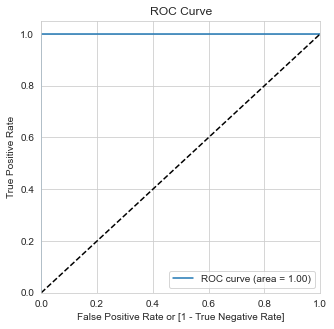

In [314]:
draw_roc(y_train_sm, y_train_pred)

## ADASYN

In [315]:
from imblearn.over_sampling import ADASYN

In [316]:
print("Number of fraud transactions before ADASYN: ",y_train.value_counts()[1])
print("Number of non fraud transactions before ADASYN: ",y_train.value_counts()[0])

Number of fraud transactions before ADASYN:  394
Number of non fraud transactions before ADASYN:  227451


In [317]:
ad = ADASYN(n_neighbors=4, random_state=42)
X_train_ad, y_train_ad = ad.fit_sample(X_train_pt, y_train)

In [318]:
print("Number of fraud transactions after ADASYN: ", sum(y_train_ad == 1))
print("Number of non fraud transactions after ADAYSN: ", sum(y_train_ad == 0))

Number of fraud transactions after ADASYN:  227431
Number of non fraud transactions after ADAYSN:  227451


### Print the class distribution after applying ADASYN

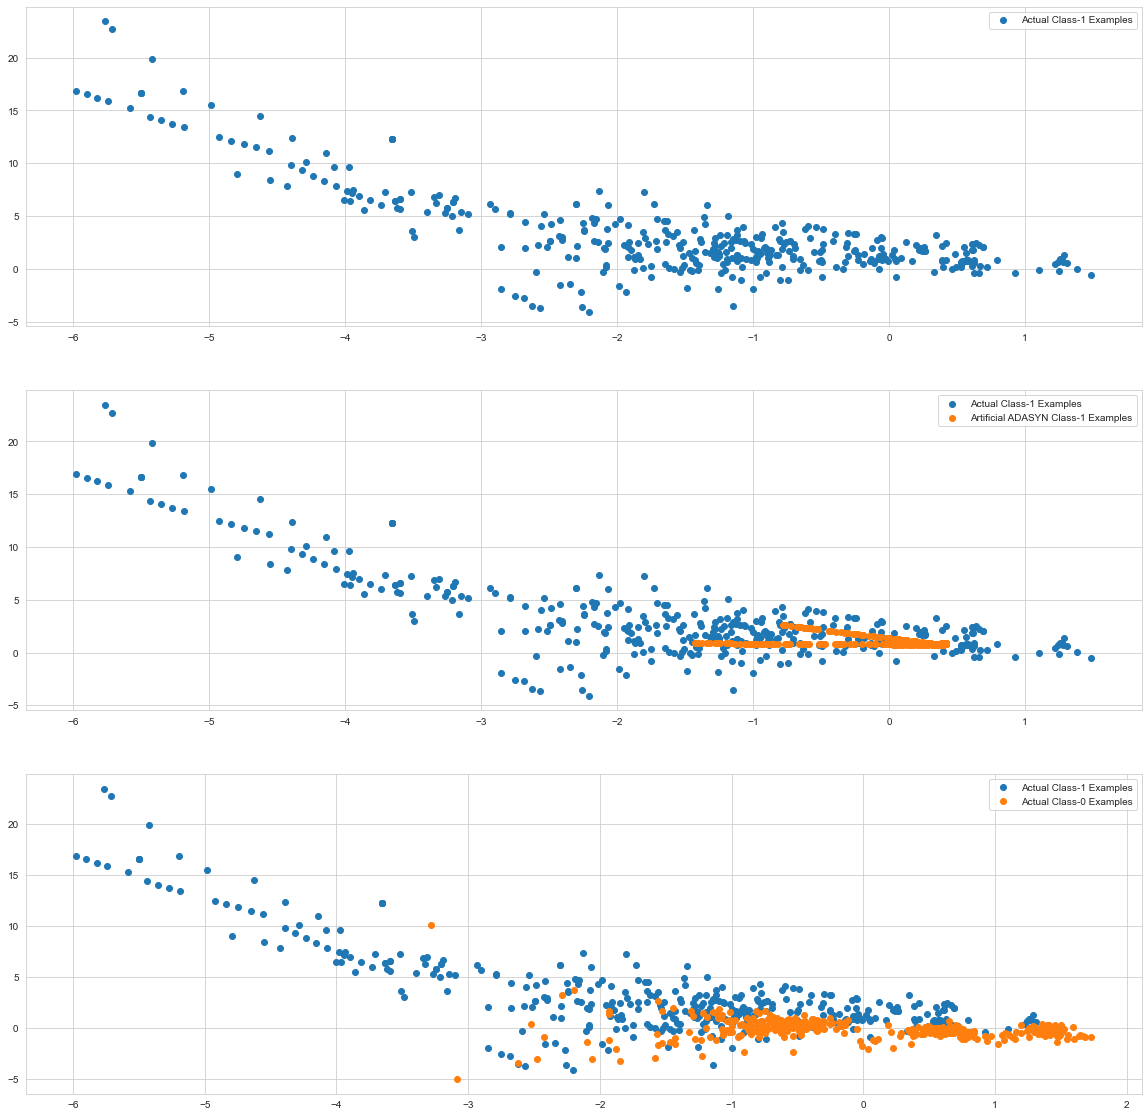

In [319]:
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_ad[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

<b> The Graphical representation of the ADASYN algorithm: </b> <br> <br>
Graph 1:
- ADASYN starts from a set of blue points representing the minority Class - Class-1 Examples

Graph 2:
- It then finds the k-nearest neighbors of each minority example.
- It calculates the dominance of the majority class in each specific neighbourhood.
- It normalizes the dominance by generating synthetic examples for those neighbourhoods.
- These synthetic samples will thus have a density distribution. They are represented as orange coloured points.
- This procedure is repeated for all the Class-1 examples by adding each time a new synthetic example.

Graph 3:
- The actual Class-1 and Class-0 examples are represented as blue points and orange points respectively.

### Logistic Regression with ADASYN Balanced Classes

#### Logistic Regression with default hyperparameters

In [320]:
lr = LogisticRegression()
lr = lr.fit(X_train_ad, y_train_ad)

#### Predictions on the train set

In [321]:
# Making predictions
y_pred = lr.predict_proba(X_train_ad)

# Converting y_pred to a dataframe
y_pred_df = pd.DataFrame(y_pred)

# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

y_pred_1.head()

1
0  0.115900
1  0.321403
2  0.000235
3  0.046845
4  0.006819

In [322]:
# Converting y_test to dataframe
y_train_df = pd.DataFrame(y_train_ros)

# Renaming the column 
y_train_df = y_train_df.rename(columns={ 0 : 'Class'})

y_train_df.head()

Class
0      0
1      0
2      0
3      0
4      0

In [323]:
# Putting TransID to index
y_train_df['TransID'] = y_train_df.index

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_train_df.reset_index(drop=True, inplace=True)

# Appending y_train_df and y_pred_1
y_pred_final = pd.concat([y_train_df,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Fraud_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['TransID','Class','Fraud_Prob'], axis=1)

y_pred_final.head()

TransID  Class  Fraud_Prob
0        0      0    0.115900
1        1      0    0.321403
2        2      0    0.000235
3        3      0    0.046845
4        4      0    0.006819

In [324]:
# Creating new column 'predicted' with 1 if Fraud_Prob > 0.5 else 0
y_pred_final['predicted'] = y_pred_final.Fraud_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

TransID  Class  Fraud_Prob  predicted
0        0      0    0.115900          0
1        1      0    0.321403          0
2        2      0    0.000235          0
3        3      0    0.046845          0
4        4      0    0.006819          0

In [325]:
ModelMetrics(y_pred_final.Class, y_pred_final.predicted)

********* Classification Report *********
              precision    recall  f1-score   support

           0       0.88      0.91      0.90    227451
           1       0.91      0.88      0.89    227451

   micro avg       0.90      0.90      0.90    454902
   macro avg       0.90      0.90      0.90    454902
weighted avg       0.90      0.90      0.90    454902

**** Confusion Matrix ****
[[207076  20375]
 [ 27168 200283]]


Accuracy Score: 0.8955
Sensitivity: 0.8806
Specificity: 0.9104
False Positive Rate: 0.0896
Positive Predictive Value: 0.9077
Negative Predictive Value: 0.884
Precision: 0.9077
Recall: 0.8806
F1 Score: 0.8939


#### Logisitic Regression with hyperparameters tuning :  Tuning penalty, C and solver

In [326]:
# GridSearchCV to find optimal hyperparameters 

# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'penalty' : ['l1', 'l2'], # l1 or l2 regularization
              'C' : np.logspace(-4, 4, 20), # size of penalty
              'solver' : ['liblinear']} # type of solver used  

# instantiate the model
logsk = LogisticRegression(random_state = 100)

# fit tree on training data
log_grid = GridSearchCV(estimator = logsk, 
                    param_grid = parameters, 
                    cv = n_folds, 
                    return_train_score = True,
                    scoring = "roc_auc")
log_grid.fit(X_train_ad, y_train_ad)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=100, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([1.00000e-04, 2.63665e-04, 6.95193e-04, 1.83298e-03, 4.83293e-03,
       1.27427e-02, 3.35982e-02, 8.85867e-02, 2.33572e-01, 6.15848e-01,
       1.62378e+00, 4.28133e+00, 1.12884e+01, 2.97635e+01, 7.84760e+01,
       2.06914e+02, 5.45559e+02, 1.43845e+03, 3.79269e+03, 1.00000e+04]), 'solver': ['liblinear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [327]:
cv_results = pd.DataFrame(log_grid.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time      param_C  \
2       1.388543      0.027648         0.069335        0.006851  0.000263665   
4       2.399155      0.230594         0.064525        0.003883  0.000695193   
1       3.017916      0.172457         0.063685        0.004516       0.0001   
0       1.136924      0.041155         0.068670        0.001699       0.0001   
6       4.005672      0.071659         0.067185        0.001045   0.00183298   

  param_penalty param_solver  \
2            l1    liblinear   
4            l1    liblinear   
1            l2    liblinear   
0            l1    liblinear   
6            l1    liblinear   

                                              params  split0_test_score  \
2  {'C': 0.00026366508987303583, 'penalty': 'l1',...           0.951988   
4  {'C': 0.0006951927961775605, 'penalty': 'l1', ...           0.956141   
1  {'C': 0.0001, 'penalty': 'l2', 'solver': 'libl...           0.952243   
0  {'C': 0.0001, 'penalty': 'l1', 'solver': 'libl...           0.944042   
6  {'C': 0.0018329807108324356, 'penalty': 'l1', ...           0.958747   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
2           0.949211           0.936560         0.945920        0.006715   
4           0.950012           0.926585         0.944246        0.012736   
1           0.949233           0.925890         0.942455        0.011778   
0           0.942882           0.940179         0.942368        0.001618   
6           0.948259           0.920048         0.942351        0.016342   

   rank_test_score  split0_train_score  split1_train_score  \
2                1            0.956940            0.956923   
4                2            0.962012            0.960503   
1                3            0.960755            0.958193   
0                4            0.945512            0.945423   
6                5            0.964581            0.963454   

   split2_train_score  mean_train_score  std_train_score  
2            0.961522          0.958462         0.002164  
4            0.968070          0.963529         0.003270  
1            0.965504          0.961484         0.003029  
0            0.949952          0.946962         0.002114  
6            0.971048          0.966361         0.003346

In [328]:
log_grid.best_params_

{'C': 0.00026366508987303583, 'penalty': 'l1', 'solver': 'liblinear'}

#### Fitting the final model with the best parameters obtained from grid search

In [329]:
lr = LogisticRegression(C=0.000264, solver='liblinear', penalty='l1')
lr = lr.fit(X_train_ad, y_train_ad)

#### Predictions on the train set

In [330]:
# Making predictions
y_pred = lr.predict_proba(X_train_ad)

# Converting y_pred to a dataframe
y_pred_df = pd.DataFrame(y_pred)

# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

y_pred_1.head()

1
0  0.481407
1  0.236898
2  0.006261
3  0.206869
4  0.027807

In [331]:
# Converting y_train_ad to dataframe
y_train_df = pd.DataFrame(y_train_ad)

# Renaming the column 
y_train_df = y_train_df.rename(columns={ 0 : 'Class'})

y_train_df.head()

Class
0      0
1      0
2      0
3      0
4      0

In [332]:
# Putting TransID to index
y_train_df['TransID'] = y_train_df.index

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_train_df.reset_index(drop=True, inplace=True)

# Appending y_train_df and y_pred_1
y_pred_final = pd.concat([y_train_df,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Fraud_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['TransID','Class','Fraud_Prob'], axis=1)

y_pred_final.head()

TransID  Class  Fraud_Prob
0        0      0    0.481407
1        1      0    0.236898
2        2      0    0.006261
3        3      0    0.206869
4        4      0    0.027807

In [333]:
# Creating new column 'predicted' with 1 if Fraud_Prob > 0.5 else 0
y_pred_final['predicted'] = y_pred_final.Fraud_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

TransID  Class  Fraud_Prob  predicted
0        0      0    0.481407          0
1        1      0    0.236898          0
2        2      0    0.006261          0
3        3      0    0.206869          0
4        4      0    0.027807          0

#### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced accuracy, sensitivity and specificity

In [334]:
y_pred_final.head()

TransID  Class  Fraud_Prob  predicted
0        0      0    0.481407          0
1        1      0    0.236898          0
2        2      0    0.006261          0
3        3      0    0.206869          0
4        4      0    0.027807          0

In [335]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.Fraud_Prob.map(lambda x: 1 if x > i else 0)
y_pred_final.head()

TransID  Class  Fraud_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0        0      0    0.481407          0    1    1    1    1    1    0    0   
1        1      0    0.236898          0    1    1    1    0    0    0    0   
2        2      0    0.006261          0    1    0    0    0    0    0    0   
3        3      0    0.206869          0    1    1    1    0    0    0    0   
4        4      0    0.027807          0    1    0    0    0    0    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0

In [336]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in num:
    cm1 = confusion_matrix(y_pred_final.Class, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.499978  1.000000  0.000000
0.1   0.1  0.701806  0.998659  0.404980
0.2   0.2  0.812303  0.984343  0.640279
0.3   0.3  0.867508  0.960907  0.774118
0.4   0.4  0.887162  0.914101  0.860225
0.5   0.5  0.877718  0.852228  0.903206
0.6   0.6  0.860702  0.785355  0.936043
0.7   0.7  0.839037  0.716099  0.961965
0.8   0.8  0.812490  0.647366  0.977600
0.9   0.9  0.777151  0.565956  0.988327


<Figure size 216x216 with 0 Axes>

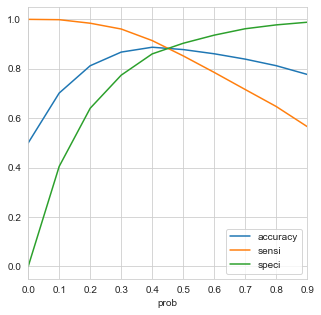

In [337]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize= [3, 3])
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], grid = True, figsize=(5,5))
plt.show()

From the curve above, we will take 0.45 as the optimum cutoff probability.

In [338]:
y_pred_final['final_predicted'] = y_pred_final.Fraud_Prob.map( lambda x: 1 if x > 0.45 else 0)

y_pred_final.head()

TransID  Class  Fraud_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0        0      0    0.481407          0    1    1    1    1    1    0    0   
1        1      0    0.236898          0    1    1    1    0    0    0    0   
2        2      0    0.006261          0    1    0    0    0    0    0    0   
3        3      0    0.206869          0    1    1    1    0    0    0    0   
4        4      0    0.027807          0    1    0    0    0    0    0    0   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                1  
1    0    0    0                0  
2    0    0    0                0  
3    0    0    0                0  
4    0    0    0                0

#### Metrics Analysis on the train set for Logisitic Regression Model

In [339]:
ModelMetrics(y_pred_final.Class, y_pred_final.final_predicted)

********* Classification Report *********
              precision    recall  f1-score   support

           0       0.89      0.88      0.89    227451
           1       0.88      0.89      0.89    227431

   micro avg       0.89      0.89      0.89    454882
   macro avg       0.89      0.89      0.89    454882
weighted avg       0.89      0.89      0.89    454882

**** Confusion Matrix ****
[[200836  26615]
 [ 24793 202638]]


Accuracy Score: 0.887
Sensitivity: 0.891
Specificity: 0.883
False Positive Rate: 0.117
Positive Predictive Value: 0.8839
Negative Predictive Value: 0.8901
Precision: 0.8839
Recall: 0.891
F1 Score: 0.8874


#### Plotting the ROC Curve for the Train Dataset

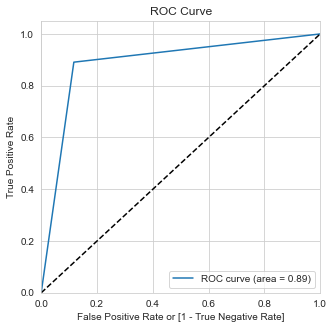

In [340]:
draw_roc(y_pred_final.Class, y_pred_final.final_predicted)

### Decision Tree with ADASYN Balanced Classes

#### Decision tree with default hyperparameters

In [341]:
fraud_tree = DecisionTreeClassifier(max_depth = 10)
fraud_tree.fit(X_train_ad, y_train_ad)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [342]:
# Making predictions
y_train_pred = fraud_tree.predict(X_train_ad)

In [343]:
ModelMetrics(y_train_ad, y_train_pred)

********* Classification Report *********
              precision    recall  f1-score   support

           0       0.99      0.95      0.97    227451
           1       0.96      0.99      0.97    227431

   micro avg       0.97      0.97      0.97    454882
   macro avg       0.97      0.97      0.97    454882
weighted avg       0.97      0.97      0.97    454882

**** Confusion Matrix ****
[[216948  10503]
 [  1393 226038]]


Accuracy Score: 0.9738
Sensitivity: 0.9939
Specificity: 0.9538
False Positive Rate: 0.0462
Positive Predictive Value: 0.9556
Negative Predictive Value: 0.9936
Precision: 0.9556
Recall: 0.9939
F1 Score: 0.9744


#### Decision tree with hyperparameters tuning : Tuning max_depth

In [344]:
# GridSearchCV to find optimal max_depth

# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", random_state = 100)

# fit tree on training data
tree = GridSearchCV(estimator = dtree, 
                    param_grid = parameters, 
                    cv = n_folds, 
                    return_train_score = True,
                    scoring = "roc_auc")
tree.fit(X_train_ad, y_train_ad)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(1, 40)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='roc_auc', verbose=0)

In [345]:
cv_results = pd.DataFrame(tree.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
10      13.774477      0.354897         0.066672        0.004921   
12      15.005895      0.314364         0.064338        0.001247   
11      14.760509      0.476591         0.068006        0.002160   
13      15.559770      0.315956         0.068004        0.002945   
7       11.188842      0.130106         0.066006        0.003267   

   param_max_depth             params  split0_test_score  split1_test_score  \
10              11  {'max_depth': 11}           0.951908           0.923611   
12              13  {'max_depth': 13}           0.952067           0.920037   
11              12  {'max_depth': 12}           0.952531           0.915765   
13              14  {'max_depth': 14}           0.953754           0.915260   
7                8   {'max_depth': 8}           0.950436           0.930017   

    split2_test_score  mean_test_score  std_test_score  rank_test_score  \
10           0.928117         0.934545        0.012414                1   
12           0.924950         0.932351        0.014085                2   
11           0.926791         0.931696        0.015405                3   
13           0.923440         0.930818        0.016559                4   
7            0.906895         0.929116        0.017787                5   

    split0_train_score  split1_train_score  split2_train_score  \
10            0.991027            0.993914            0.995406   
12            0.992608            0.995264            0.996447   
11            0.991893            0.994600            0.995959   
13            0.994028            0.995673            0.996801   
7             0.984674            0.988392            0.989851   

    mean_train_score  std_train_score  
10          0.993449         0.001818  
12          0.994773         0.001605  
11          0.994151         0.001690  
13          0.995501         0.001139  
7           0.987639         0.002180

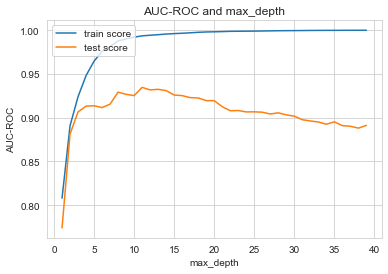

In [346]:
# plotting mean test and train scores with max_depth 
plt.figure(figsize= [6, 4])

plt.plot(cv_results['param_max_depth'], cv_results['mean_train_score'])
plt.plot(cv_results['param_max_depth'], cv_results['mean_test_score'])
plt.xlabel('max_depth')
plt.ylabel('AUC-ROC')
plt.title("AUC-ROC and max_depth")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### Decision tree with hyperparameters tuning : Tuning min_samples_leaf

In [347]:
# GridSearchCV to find optimal min_samples_leaf

# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", random_state = 100)

# fit tree on training data
tree = GridSearchCV(estimator = dtree, 
                    param_grid = parameters, 
                    cv = n_folds, 
                    return_train_score = True,
                    scoring = "roc_auc")
tree.fit(X_train_ad, y_train_ad)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [348]:
cv_results = pd.DataFrame(tree.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
9      19.587685      0.641189         0.065671        0.001700   
8      19.787593      0.877521         0.068696        0.002082   
7      20.033506      0.524907         0.069337        0.002867   
6      20.471034      0.640480         0.074006        0.002161   
5      21.172907      0.978240         0.070338        0.007587   

  param_min_samples_leaf                     params  split0_test_score  \
9                    185  {'min_samples_leaf': 185}           0.964977   
8                    165  {'min_samples_leaf': 165}           0.963426   
7                    145  {'min_samples_leaf': 145}           0.963864   
6                    125  {'min_samples_leaf': 125}           0.963738   
5                    105  {'min_samples_leaf': 105}           0.956729   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
9           0.948829           0.940210         0.951339        0.010266   
8           0.946158           0.934317         0.947967        0.011953   
7           0.941861           0.933803         0.946510        0.012705   
6           0.940123           0.920528         0.941463        0.017666   
5           0.931325           0.930882         0.939646        0.012081   

   rank_test_score  split0_train_score  split1_train_score  \
9                1            0.998756            0.999173   
8                2            0.998897            0.999289   
7                3            0.999152            0.999362   
6                4            0.999337            0.999502   
5                5            0.999478            0.999624   

   split2_train_score  mean_train_score  std_train_score  
9            0.999065          0.998998         0.000177  
8            0.999216          0.999134         0.000170  
7            0.999309          0.999274         0.000089  
6            0.999454          0.999431         0.000069  
5            0.999575          0.999559         0.000060

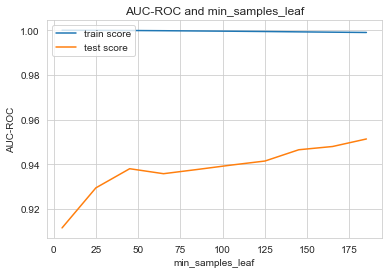

In [349]:
# plotting mean test and train scores with min_samples_leaf
plt.figure(figsize= [6, 4])

plt.plot(cv_results['param_min_samples_leaf'], cv_results['mean_train_score'])
plt.plot(cv_results['param_min_samples_leaf'], cv_results['mean_test_score'])
plt.xlabel('min_samples_leaf')
plt.ylabel('AUC-ROC')
plt.title("AUC-ROC and min_samples_leaf")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### Decision tree with hyperparameters tuning : Tuning min_samples_split

In [350]:
# GridSearchCV to find optimal min_samples_split

# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", random_state = 100)

# fit tree on training data
tree = GridSearchCV(estimator = dtree, 
                    param_grid = parameters, 
                    cv = n_folds, 
                    return_train_score = True,
                    scoring = "roc_auc")
tree.fit(X_train_ad, y_train_ad)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [351]:
cv_results = pd.DataFrame(tree.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
8      28.164298      1.122608         0.070235        0.007033   
9      28.327274      1.182675         0.068672        0.004497   
6      28.359235      1.108391         0.074005        0.008642   
7      28.392437      1.042265         0.069635        0.005132   
5      28.829985      1.398324         0.069339        0.002625   

  param_min_samples_split                      params  split0_test_score  \
8                     165  {'min_samples_split': 165}           0.912513   
9                     185  {'min_samples_split': 185}           0.910199   
6                     125  {'min_samples_split': 125}           0.911919   
7                     145  {'min_samples_split': 145}           0.912028   
5                     105  {'min_samples_split': 105}           0.910257   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
8           0.877932           0.896423         0.895622        0.014129   
9           0.877299           0.889657         0.892385        0.013569   
6           0.875351           0.886844         0.891371        0.015268   
7           0.873759           0.886808         0.890865        0.015884   
5           0.872268           0.887393         0.889973        0.015616   

   rank_test_score  split0_train_score  split1_train_score  \
8                1            0.999989            0.999991   
9                2            0.999987            0.999989   
6                3            0.999994            0.999996   
7                4            0.999992            0.999994   
5                5            0.999996            0.999997   

   split2_train_score  mean_train_score  std_train_score  
8            0.999986          0.999989     2.206231e-06  
9            0.999980          0.999985     4.106746e-06  
6            0.999997          0.999996     9.169905e-07  
7            0.999992          0.999993     7.219662e-07  
5            0.999998          0.999997     9.482034e-07

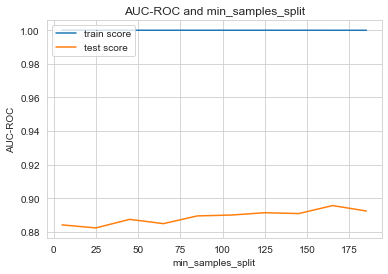

In [352]:
# plotting mean test and train scores with min_samples_split
plt.figure(figsize= [6, 4])

plt.plot(cv_results['param_min_samples_split'], cv_results['mean_train_score'])
plt.plot(cv_results['param_min_samples_split'], cv_results['mean_test_score'])
plt.xlabel('min_samples_split')
plt.ylabel('AUC-ROC')
plt.title("AUC-ROC and min_samples_split")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### Fitting the final model with the best parameters obtained from grid search

In [353]:
# model with optimal hyperparameters
tree_final = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=11, 
                                  min_samples_leaf=185,
                                  min_samples_split=165)
tree_final.fit(X_train_ad, y_train_ad)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=11,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=185, min_samples_split=165,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

#### Predictions on the train set

In [354]:
y_train_pred = tree_final.predict(X_train_ad)

#### Metrics Analysis on the train set for Decision Tree

In [355]:
ModelMetrics(y_train_ad, y_train_pred)

********* Classification Report *********
              precision    recall  f1-score   support

           0       0.99      0.95      0.97    227451
           1       0.96      0.99      0.97    227431

   micro avg       0.97      0.97      0.97    454882
   macro avg       0.97      0.97      0.97    454882
weighted avg       0.97      0.97      0.97    454882

**** Confusion Matrix ****
[[217031  10420]
 [  1866 225565]]


Accuracy Score: 0.973
Sensitivity: 0.9918
Specificity: 0.9542
False Positive Rate: 0.0458
Positive Predictive Value: 0.9558
Negative Predictive Value: 0.9915
Precision: 0.9558
Recall: 0.9918
F1 Score: 0.9735


#### Plotting the ROC Curve for the Train Dataset

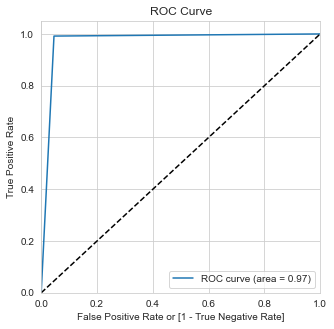

In [356]:
draw_roc(y_train_ad, y_train_pred)

### Random Forest with ADASYN Balanced Classes

#### Random Forest with default hyperparameters

In [357]:
fraud_forest = RandomForestClassifier(max_depth = 5)
fraud_forest.fit(X_train_ad, y_train_ad)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [358]:
# Making predictions
y_train_pred = fraud_forest.predict(X_train_ad)

In [359]:
ModelMetrics(y_train_ad, y_train_pred)

********* Classification Report *********
              precision    recall  f1-score   support

           0       0.93      0.95      0.94    227451
           1       0.95      0.93      0.94    227431

   micro avg       0.94      0.94      0.94    454882
   macro avg       0.94      0.94      0.94    454882
weighted avg       0.94      0.94      0.94    454882

**** Confusion Matrix ****
[[216663  10788]
 [ 16088 211343]]


Accuracy Score: 0.9409
Sensitivity: 0.9293
Specificity: 0.9526
False Positive Rate: 0.0474
Positive Predictive Value: 0.9514
Negative Predictive Value: 0.9309
Precision: 0.9514
Recall: 0.9293
F1 Score: 0.9402


#### Random forest with hyperparameters tuning : Tuning max_depth

In [360]:
# GridSearchCV to find optimal max_depth

# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier(criterion = "gini", random_state = 100)

# fit random forest on training data
rf = GridSearchCV(estimator = rf, 
                    param_grid = parameters, 
                    cv = n_folds, 
                    return_train_score = True,
                    scoring = "roc_auc")
rf.fit(X_train_ad, y_train_ad)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(2, 20, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='roc_auc', verbose=0)

In [361]:
cv_results = pd.DataFrame(rf.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
2      17.360796      0.226090         0.191519        0.003236   
3      19.446655      0.280273         0.205314        0.011281   
1      12.499111      0.230393         0.200012        0.033659   
0       4.642210      0.273174         0.151358        0.007935   

  param_max_depth             params  split0_test_score  split1_test_score  \
2              12  {'max_depth': 12}           0.987013           0.985612   
3              17  {'max_depth': 17}           0.986408           0.971203   
1               7   {'max_depth': 7}           0.981950           0.969537   
0               2   {'max_depth': 2}           0.903882           0.883816   

   split2_test_score  mean_test_score  std_test_score  rank_test_score  \
2           0.972335         0.981653        0.006614                1   
3           0.978989         0.978867        0.006208                2   
1           0.977955         0.976481        0.005174                3   
0           0.869354         0.885684        0.014158                4   

   split0_train_score  split1_train_score  split2_train_score  \
2            0.999881            0.999910            0.999920   
3            0.999997            1.000000            0.999995   
1            0.994559            0.995059            0.996422   
0            0.900985            0.905544            0.891295   

   mean_train_score  std_train_score  
2          0.999904         0.000016  
3          0.999997         0.000002  
1          0.995347         0.000787  
0          0.899275         0.005941

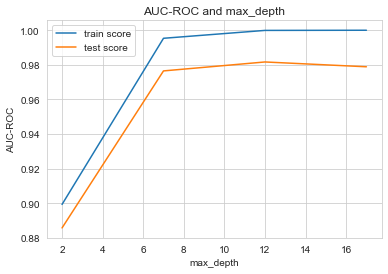

In [362]:
# plotting mean test and train scores with max_depth 
plt.figure(figsize= [6, 4])

plt.plot(cv_results['param_max_depth'], cv_results['mean_train_score'])
plt.plot(cv_results['param_max_depth'], cv_results['mean_test_score'])
plt.xlabel('max_depth')
plt.ylabel('AUC-ROC')
plt.title("AUC-ROC and max_depth")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### Random Forest with hyperparameters tuning : Tuning n_estimators

In [363]:
# GridSearchCV to find optimal n_estimators

# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'n_estimators': range(100, 500, 100)}

# instantiate the model
rf = RandomForestClassifier(criterion = "gini", random_state = 100, max_depth=4)

# fit random forest on training data
rf = GridSearchCV(estimator = rf, 
                    param_grid = parameters, 
                    cv = n_folds, 
                    return_train_score = True,
                    scoring = "roc_auc")
rf.fit(X_train_ad, y_train_ad)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': range(100, 500, 100)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [364]:
cv_results = pd.DataFrame(rf.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
1     160.582208      4.259818         2.053799        0.021512   
2     246.430157      0.363738         3.126987        0.103137   
3     310.813321      1.378226         4.023745        0.018252   
0      78.283736      0.435002         1.069277        0.054522   

  param_n_estimators                 params  split0_test_score  \
1                200  {'n_estimators': 200}           0.966422   
2                300  {'n_estimators': 300}           0.966105   
3                400  {'n_estimators': 400}           0.965625   
0                100  {'n_estimators': 100}           0.964066   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
1           0.961106           0.969469         0.965666        0.003456   
2           0.961359           0.969006         0.965490        0.003152   
3           0.960849           0.969346         0.965274        0.003478   
0           0.959776           0.967569         0.963804        0.003187   

   rank_test_score  split0_train_score  split1_train_score  \
1                1            0.978154            0.978945   
2                2            0.977873            0.978969   
3                3            0.977769            0.978699   
0                4            0.976972            0.977866   

   split2_train_score  mean_train_score  std_train_score  
1            0.980052          0.979050         0.000778  
2            0.980191          0.979011         0.000947  
3            0.980029          0.978832         0.000927  
0            0.978642          0.977827         0.000682

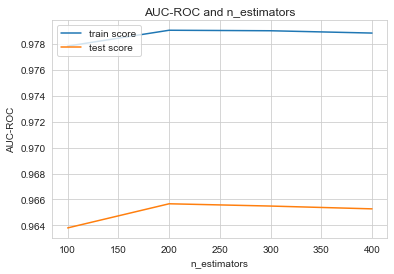

In [365]:
# plotting mean test and train scores with n_estimators
plt.figure(figsize= [6, 4])

plt.plot(cv_results['param_n_estimators'], cv_results['mean_train_score'])
plt.plot(cv_results['param_n_estimators'], cv_results['mean_test_score'])
plt.xlabel('n_estimators')
plt.ylabel('AUC-ROC')
plt.title("AUC-ROC and n_estimators")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### Random Forest with hyperparameters tuning : Tuning max_features

In [366]:
# GridSearchCV to find optimal max_features

# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(criterion = "gini", random_state = 100, max_depth=4)

# fit random forest on training data
rf = GridSearchCV(estimator = rf, 
                    param_grid = parameters, 
                    cv = n_folds, 
                    return_train_score = True,
                    scoring = "roc_auc")
rf.fit(X_train_ad, y_train_ad)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_features': [4, 8, 14, 20, 24]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [367]:
cv_results = pd.DataFrame(rf.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
2      19.842318      0.179813         0.162004        0.012070   
3      27.749885      0.105795         0.165346        0.018156   
1      12.207656      0.355700         0.155124        0.005126   
4      33.041076      0.096042         0.153678        0.008179   
0       6.818290      0.125044         0.159678        0.003400   

  param_max_features                params  split0_test_score  \
2                 14  {'max_features': 14}           0.963078   
3                 20  {'max_features': 20}           0.965844   
1                  8   {'max_features': 8}           0.955740   
4                 24  {'max_features': 24}           0.957916   
0                  4   {'max_features': 4}           0.959462   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
2           0.957715           0.966462         0.962418        0.003601   
3           0.957491           0.962075         0.961803        0.003416   
1           0.957003           0.965101         0.959281        0.004147   
4           0.949807           0.941568         0.949764        0.006674   
0           0.935109           0.925924         0.940165        0.014151   

   rank_test_score  split0_train_score  split1_train_score  \
2                1            0.976036            0.975594   
3                2            0.976814            0.973172   
1                3            0.971245            0.977498   
4                4            0.970055            0.970227   
0                5            0.970708            0.967621   

   split2_train_score  mean_train_score  std_train_score  
2            0.978515          0.976715         0.001285  
3            0.978667          0.976218         0.002283  
1            0.976540          0.975094         0.002750  
4            0.975885          0.972056         0.002709  
0            0.963119          0.967149         0.003116

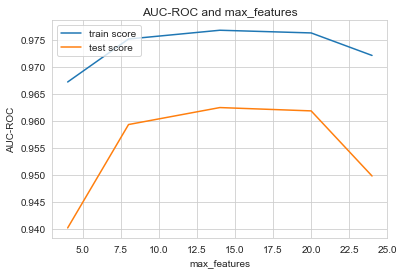

In [368]:
# plotting mean test and train scores with max_features
plt.figure(figsize= [6, 4])

plt.plot(cv_results['param_max_features'], cv_results['mean_train_score'])
plt.plot(cv_results['param_max_features'], cv_results['mean_test_score'])
plt.xlabel('max_features')
plt.ylabel('AUC-ROC')
plt.title("AUC-ROC and max_features")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### Random forest with hyperparameters tuning : Tuning min_samples_leaf

In [369]:
# GridSearchCV to find optimal min_samples_leaf

# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(criterion = "gini", random_state = 100)

# fit random forest on training data
rf = GridSearchCV(estimator = rf, 
                    param_grid = parameters, 
                    cv = n_folds, 
                    return_train_score = True,
                    scoring = "roc_auc")
rf.fit(X_train_ad, y_train_ad)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': range(100, 400, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [370]:
cv_results = pd.DataFrame(rf.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
1      18.961631      0.379464         0.206685        0.004497   
0      19.754434      0.583264         0.208851        0.003706   
4     399.556580    539.931540         0.241400        0.050355   
5      20.317544      0.961042         0.226681        0.031941   
3      17.979451      0.342589         0.203706        0.002048   

  param_min_samples_leaf                     params  split0_test_score  \
1                    150  {'min_samples_leaf': 150}           0.988030   
0                    100  {'min_samples_leaf': 100}           0.987667   
4                    300  {'min_samples_leaf': 300}           0.987102   
5                    350  {'min_samples_leaf': 350}           0.989058   
3                    250  {'min_samples_leaf': 250}           0.983232   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
1           0.985440           0.984550         0.986007        0.001476   
0           0.982676           0.986088         0.985477        0.002083   
4           0.980614           0.983926         0.983881        0.002649   
5           0.976606           0.984029         0.983231        0.005115   
3           0.982693           0.983714         0.983213        0.000417   

   rank_test_score  split0_train_score  split1_train_score  \
1                1            0.999843            0.999891   
0                2            0.999927            0.999935   
4                3            0.999570            0.999691   
5                4            0.999561            0.999581   
3                5            0.999718            0.999764   

   split2_train_score  mean_train_score  std_train_score  
1            0.999886          0.999873         0.000021  
0            0.999917          0.999926         0.000007  
4            0.999701          0.999654         0.000060  
5            0.999564          0.999568         0.000009  
3            0.999776          0.999753         0.000025

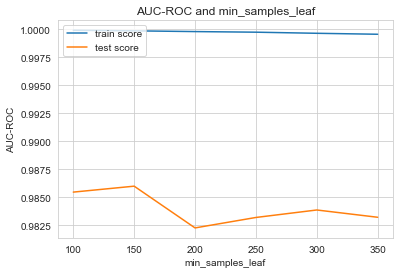

In [371]:
# plotting mean test and train scores with min_samples_leaf
plt.figure(figsize= [6, 4])

plt.plot(cv_results['param_min_samples_leaf'], cv_results['mean_train_score'])
plt.plot(cv_results['param_min_samples_leaf'], cv_results['mean_test_score'])
plt.xlabel('min_samples_leaf')
plt.ylabel('AUC-ROC')
plt.title("AUC-ROC and min_samples_leaf")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### Random forest with hyperparameters tuning : Tuning min_samples_split

In [372]:
# GridSearchCV to find optimal min_samples_split

# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(criterion = "gini", random_state = 100)

# fit random forest on training data
rf = GridSearchCV(estimator = rf, 
                    param_grid = parameters, 
                    cv = n_folds, 
                    return_train_score = True,
                    scoring = "roc_auc")
rf.fit(X_train_ad, y_train_ad)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(200, 500, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [373]:
cv_results = pd.DataFrame(rf.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      23.887523      0.607297         0.220187        0.002456   
2      26.657638      1.925116         0.255558        0.042963   
3      25.968254      0.983801         0.238690        0.002617   
4      27.023677      0.661528         0.243695        0.011450   
1    7708.566677  10862.004952         0.264358        0.019597   

  param_min_samples_split                      params  split0_test_score  \
0                     200  {'min_samples_split': 200}           0.988214   
2                     300  {'min_samples_split': 300}           0.986960   
3                     350  {'min_samples_split': 350}           0.987215   
4                     400  {'min_samples_split': 400}           0.992773   
1                     250  {'min_samples_split': 250}           0.983080   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.979050           0.984952         0.984072        0.003793   
2           0.979760           0.983284         0.983335        0.002940   
3           0.978266           0.980620         0.982034        0.003788   
4           0.977060           0.975738         0.981857        0.007738   
1           0.980680           0.980370         0.981377        0.001211   

   rank_test_score  split0_train_score  split1_train_score  \
0                1            0.999999            0.999999   
2                2            0.999999            0.999998   
3                3            0.999999            0.999997   
4                4            0.999999            0.999997   
1                5            0.999999            1.000000   

   split2_train_score  mean_train_score  std_train_score  
0            1.000000          0.999999     1.728274e-07  
2            0.999998          0.999998     4.335812e-07  
3            0.999998          0.999998     6.510917e-07  
4            0.999995          0.999997     1.712485e-06  
1            0.999997          0.999999     1.031046e-06

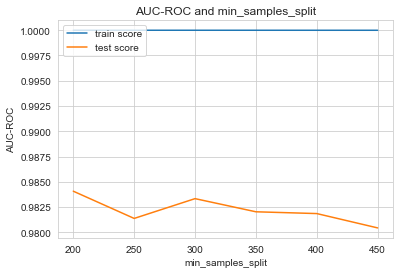

In [374]:
# plotting mean test and train scores with min_samples_split
plt.figure(figsize= [6, 4])

plt.plot(cv_results['param_min_samples_split'], cv_results['mean_train_score'])
plt.plot(cv_results['param_min_samples_split'], cv_results['mean_test_score'])
plt.xlabel('min_samples_split')
plt.ylabel('AUC-ROC')
plt.title("AUC-ROC and min_samples_split")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### Fitting the final model with the best parameters obtained from grid search

In [375]:
# model with optimal hyperparameters
rf_final = RandomForestClassifier(bootstrap=True,
                                     max_depth=12,
                                     min_samples_leaf=150, 
                                     min_samples_split=200,
                                     max_features=14,
                                     n_estimators=200,
                                     criterion = "gini", 
                                    random_state = 100)
rf_final.fit(X_train_ad, y_train_ad)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features=14, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=150, min_samples_split=200,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

#### Predictions on the train set

In [376]:
y_train_pred = rf_final.predict(X_train_ad)

#### Metrics Analysis on the train set for Random Forest

In [377]:
ModelMetrics(y_train_ad, y_train_pred)

********* Classification Report *********
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    227451
           1       0.99      1.00      0.99    227431

   micro avg       0.99      0.99      0.99    454882
   macro avg       1.00      0.99      0.99    454882
weighted avg       1.00      0.99      0.99    454882

**** Confusion Matrix ****
[[225159   2292]
 [     4 227427]]


Accuracy Score: 0.995
Sensitivity: 1.0
Specificity: 0.9899
False Positive Rate: 0.0101
Positive Predictive Value: 0.99
Negative Predictive Value: 1.0
Precision: 0.99
Recall: 1.0
F1 Score: 0.995


#### Plotting the ROC Curve for the Train Dataset

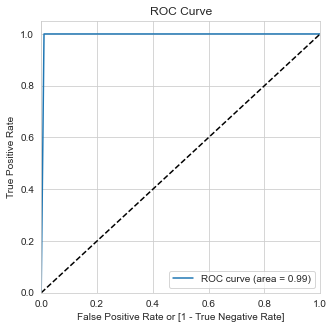

In [378]:
draw_roc(y_train_ad, y_train_pred)

### XGBoost with ADASYN Balanced Classes

#### XGBoost with default hyperparameters

In [379]:
fraud_xgboost = XGBClassifier()
fraud_xgboost.fit(X_train_ad, y_train_ad)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
       validate_parameters=False, verbosity=None)

In [380]:
# Making predictions
y_train_pred = fraud_xgboost.predict(X_train_ad)

In [381]:
ModelMetrics(y_train_ad, y_train_pred)

********* Classification Report *********
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227431

   micro avg       1.00      1.00      1.00    454882
   macro avg       1.00      1.00      1.00    454882
weighted avg       1.00      1.00      1.00    454882

**** Confusion Matrix ****
[[227450      1]
 [     0 227431]]


Accuracy Score: 1.0
Sensitivity: 1.0
Specificity: 1.0
False Positive Rate: 0.0
Positive Predictive Value: 1.0
Negative Predictive Value: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


#### XGBoost with hyperparameters tuning : Tuning max_depth

In [382]:
# GridSearchCV to find optimal max_depth

# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_depth' : range(3,10,2)}

# instantiate the model
xgb_model = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=5,
                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

# fit the model on training data
xgb = GridSearchCV(estimator = xgb_model, 
                    param_grid = parameters, 
                    cv = n_folds, 
                    return_train_score = True,
                    scoring = "roc_auc")
xgb.fit(X_train_ad, y_train_ad)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=0.8, gamma=0, gpu_id=None,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.1, max_delta_step=None, max_depth=5,
       min_child_weight=1,...eight=1, seed=27, subsample=0.8,
       tree_method=None, validate_parameters=False, verbosity=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(3, 10, 2)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='roc_auc', verbose=0)

In [383]:
cv_results = pd.DataFrame(xgb.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
3     106.542297      5.955603         0.666217        0.037996   
2     482.572418    568.018709         0.547733        0.026215   
1      60.595366      2.454816         0.461540        0.031327   
0      38.383895      0.099584         0.344726        0.002032   

  param_max_depth            params  split0_test_score  split1_test_score  \
3               9  {'max_depth': 9}           0.992726           0.998645   
2               7  {'max_depth': 7}           0.993614           0.998043   
1               5  {'max_depth': 5}           0.991770           0.993485   
0               3  {'max_depth': 3}           0.991389           0.990849   

   split2_test_score  mean_test_score  std_test_score  rank_test_score  \
3           0.998563         0.996645        0.002771                1   
2           0.996300         0.995986        0.001822                2   
1           0.987049         0.990768        0.002721                3   
0           0.976105         0.986114        0.007081                4   

   split0_train_score  split1_train_score  split2_train_score  \
3            1.000000            1.000000            1.000000   
2            1.000000            1.000000            1.000000   
1            0.999955            0.999981            0.999963   
0            0.998780            0.999096            0.998949   

   mean_train_score  std_train_score  
3          1.000000     6.395889e-09  
2          1.000000     1.882651e-07  
1          0.999967     1.090086e-05  
0          0.998942     1.291193e-04

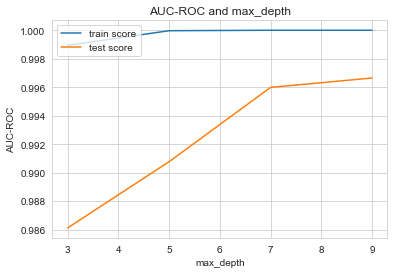

In [384]:
# plotting mean test and train scores with max_depth 
plt.figure(figsize= [6, 4])

plt.plot(cv_results['param_max_depth'], cv_results['mean_train_score'])
plt.plot(cv_results['param_max_depth'], cv_results['mean_test_score'])
plt.xlabel('max_depth')
plt.ylabel('AUC-ROC')
plt.title("AUC-ROC and max_depth")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### XGBoost with hyperparameters tuning : Tuning min_child_weight

In [385]:
# GridSearchCV to find optimal min_child_weight

# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_child_weight':range(1,6,2)}

# instantiate the model
xgb_model = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=5,
                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

# fit the model on training data
xgb = GridSearchCV(estimator = xgb_model, 
                    param_grid = parameters, 
                    cv = n_folds, 
                    return_train_score = True,
                    scoring = "roc_auc")
xgb.fit(X_train_ad, y_train_ad)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=0.8, gamma=0, gpu_id=None,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.1, max_delta_step=None, max_depth=5,
       min_child_weight=1,...eight=1, seed=27, subsample=0.8,
       tree_method=None, validate_parameters=False, verbosity=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_child_weight': range(1, 6, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [386]:
cv_results = pd.DataFrame(xgb.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
1      72.066098     13.947631         0.474878        0.016943   
0      65.331810      0.304335         0.486730        0.014163   
2      66.400943      1.378021         0.472706        0.015200   

  param_min_child_weight                   params  split0_test_score  \
1                      3  {'min_child_weight': 3}           0.992809   
0                      1  {'min_child_weight': 1}           0.991770   
2                      5  {'min_child_weight': 5}           0.991840   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
1           0.994956           0.987599         0.991788        0.003089   
0           0.993485           0.987049         0.990768        0.002721   
2           0.994345           0.984519         0.990235        0.004169   

   rank_test_score  split0_train_score  split1_train_score  \
1                1            0.999964            0.999967   
0                2            0.999955            0.999981   
2                3            0.999957            0.999951   

   split2_train_score  mean_train_score  std_train_score  
1            0.999947          0.999959         0.000009  
0            0.999963          0.999967         0.000011  
2            0.999931          0.999946         0.000011

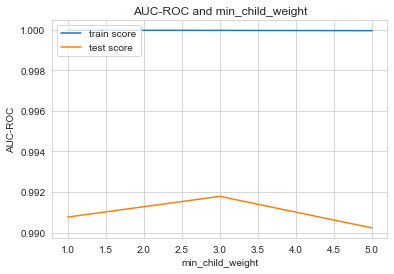

In [387]:
# plotting mean test and train scores with min_child_weight 
plt.figure(figsize= [6, 4])

plt.plot(cv_results['param_min_child_weight'], cv_results['mean_train_score'])
plt.plot(cv_results['param_min_child_weight'], cv_results['mean_test_score'])
plt.xlabel('min_child_weight')
plt.ylabel('AUC-ROC')
plt.title("AUC-ROC and min_child_weight")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### XGBoost with hyperparameters tuning : Tuning gamma

In [388]:
# GridSearchCV to find optimal gamma

# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'gamma':[i/5.0 for i in range(0,5)]}

# instantiate the model
xgb_model = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=5,
                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

# fit the model on training data
xgb = GridSearchCV(estimator = xgb_model, 
                    param_grid = parameters, 
                    cv = n_folds, 
                    return_train_score = True,
                    scoring = "roc_auc")
xgb.fit(X_train_ad, y_train_ad)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=0.8, gamma=0, gpu_id=None,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.1, max_delta_step=None, max_depth=5,
       min_child_weight=1,...eight=1, seed=27, subsample=0.8,
       tree_method=None, validate_parameters=False, verbosity=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'gamma': [0.0, 0.2, 0.4, 0.6, 0.8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [389]:
cv_results = pd.DataFrame(xgb.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_gamma  \
3      66.021961      1.380632         0.478876        0.015151         0.6   
2      65.804380      0.290079         0.483879        0.020740         0.4   
1      63.839754      2.820128         0.469537        0.003342         0.2   
0      78.029241     11.483778         0.508539        0.051241           0   
4      65.275861      0.241982         0.494881        0.027865         0.8   

           params  split0_test_score  split1_test_score  split2_test_score  \
3  {'gamma': 0.6}           0.992681           0.994659           0.986774   
2  {'gamma': 0.4}           0.991604           0.994311           0.986811   
1  {'gamma': 0.2}           0.991908           0.994594           0.985819   
0  {'gamma': 0.0}           0.991770           0.993485           0.987049   
4  {'gamma': 0.8}           0.992084           0.994283           0.985442   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
3         0.991371        0.003350                1            0.999954   
2         0.990909        0.003101                2            0.999954   
1         0.990774        0.003671                3            0.999957   
0         0.990768        0.002721                4            0.999955   
4         0.990603        0.003758                5            0.999967   

   split1_train_score  split2_train_score  mean_train_score  std_train_score  
3            0.999976            0.999963          0.999964         0.000009  
2            0.999979            0.999966          0.999966         0.000010  
1            0.999981            0.999955          0.999964         0.000012  
0            0.999981            0.999963          0.999967         0.000011  
4            0.999981            0.999969          0.999972         0.000006

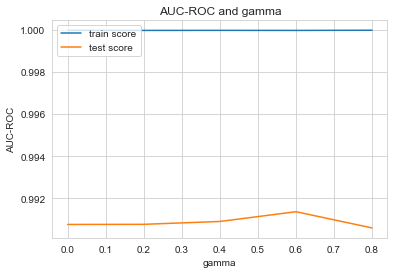

In [390]:
# plotting mean test and train scores with gamma 
plt.figure(figsize= [6, 4])

plt.plot(cv_results['param_gamma'], cv_results['mean_train_score'])
plt.plot(cv_results['param_gamma'], cv_results['mean_test_score'])
plt.xlabel('gamma')
plt.ylabel('AUC-ROC')
plt.title("AUC-ROC and gamma")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### XGBoost with hyperparameters tuning : Tuning subsample and colsample_bytree

In [391]:
# GridSearchCV to find optimal subsample and colsample_bytree

# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {
            'subsample':[i/10.0 for i in range(6,10)],
            'colsample_bytree':[i/10.0 for i in range(6,10)]
            }

# instantiate the model
xgb_model = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=5,
                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

# fit the model on training data
xgb = GridSearchCV(estimator = xgb_model, 
                    param_grid = parameters, 
                    cv = n_folds, 
                    return_train_score = True,
                    scoring = "roc_auc")
xgb.fit(X_train_ad, y_train_ad)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=0.8, gamma=0, gpu_id=None,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.1, max_delta_step=None, max_depth=5,
       min_child_weight=1,...eight=1, seed=27, subsample=0.8,
       tree_method=None, validate_parameters=False, verbosity=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'subsample': [0.6, 0.7, 0.8, 0.9], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [392]:
cv_results = pd.DataFrame(xgb.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
3      57.066524      1.203180         0.474036        0.020610   
6      59.940863      3.105298         0.452204        0.010492   
5     692.821752    906.754379         0.519059        0.045731   
1      52.267937      0.253024         0.497280        0.024786   
9      63.419402      0.707543         0.524826        0.007969   

  param_colsample_bytree param_subsample  \
3                    0.6             0.9   
6                    0.7             0.8   
5                    0.7             0.7   
1                    0.6             0.7   
9                    0.8             0.7   

                                        params  split0_test_score  \
3  {'colsample_bytree': 0.6, 'subsample': 0.9}           0.991998   
6  {'colsample_bytree': 0.7, 'subsample': 0.8}           0.993362   
5  {'colsample_bytree': 0.7, 'subsample': 0.7}           0.994585   
1  {'colsample_bytree': 0.6, 'subsample': 0.7}           0.992480   
9  {'colsample_bytree': 0.8, 'subsample': 0.7}           0.991385   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
3           0.994577           0.989298         0.991958        0.002155   
6           0.994620           0.987883         0.991955        0.002925   
5           0.995133           0.985950         0.991889        0.004205   
1           0.994362           0.986810         0.991217        0.003209   
9           0.994426           0.987592         0.991134        0.002795   

   rank_test_score  split0_train_score  split1_train_score  \
3                1            0.999959            0.999976   
6                2            0.999961            0.999974   
5                3            0.999969            0.999980   
1                4            0.999941            0.999980   
9                5            0.999969            0.999975   

   split2_train_score  mean_train_score  std_train_score  
3            0.999962          0.999966         0.000007  
6            0.999960          0.999965         0.000006  
5            0.999962          0.999970         0.000007  
1            0.999963          0.999961         0.000016  
9            0.999955          0.999966         0.000008

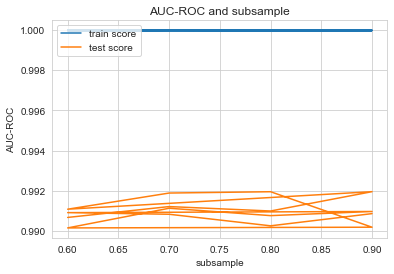

In [393]:
# plotting mean test and train scores with subsample 
plt.figure(figsize= [6, 4])

plt.plot(cv_results['param_subsample'], cv_results['mean_train_score'])
plt.plot(cv_results['param_subsample'], cv_results['mean_test_score'])
plt.xlabel('subsample')
plt.ylabel('AUC-ROC')
plt.title("AUC-ROC and subsample")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

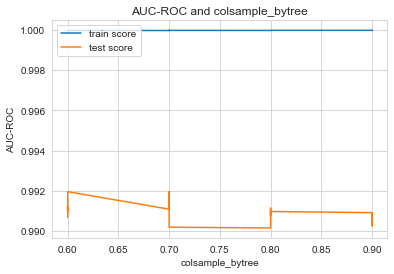

In [394]:
# plotting mean test and train scores with colsample_bytree 
plt.figure(figsize= [6, 4])

plt.plot(cv_results['param_colsample_bytree'], cv_results['mean_train_score'])
plt.plot(cv_results['param_colsample_bytree'], cv_results['mean_test_score'])
plt.xlabel('colsample_bytree')
plt.ylabel('AUC-ROC')
plt.title("AUC-ROC and colsample_bytree")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### XGBoost with hyperparameters tuning : Tuning regularization parameters

In [395]:
# GridSearchCV to find optimal regularization parameters

# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]}

# instantiate the model
xgb_model = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=5,
                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

# fit the model on training data
xgb = GridSearchCV(estimator = xgb_model, 
                    param_grid = parameters, 
                    cv = n_folds, 
                    return_train_score = True,
                    scoring = "roc_auc")
xgb.fit(X_train_ad, y_train_ad)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=0.8, gamma=0, gpu_id=None,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.1, max_delta_step=None, max_depth=5,
       min_child_weight=1,...eight=1, seed=27, subsample=0.8,
       tree_method=None, validate_parameters=False, verbosity=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'reg_alpha': [0, 0.001, 0.005, 0.01, 0.05]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [396]:
cv_results = pd.DataFrame(xgb.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
3      66.537826      1.069006         0.505374        0.011148   
2      66.575555      0.943408         0.515371        0.040436   
1      65.524384      0.446955         0.473537        0.015914   
0      72.649180      1.025011         0.494372        0.020074   
4      65.656942      0.071585         0.497040        0.020608   

  param_reg_alpha                params  split0_test_score  split1_test_score  \
3            0.01   {'reg_alpha': 0.01}           0.992069           0.994025   
2           0.005  {'reg_alpha': 0.005}           0.991774           0.994341   
1           0.001  {'reg_alpha': 0.001}           0.992288           0.993485   
0               0      {'reg_alpha': 0}           0.991770           0.993485   
4            0.05   {'reg_alpha': 0.05}           0.991739           0.994353   

   split2_test_score  mean_test_score  std_test_score  rank_test_score  \
3           0.987306         0.991133        0.002822                1   
2           0.987046         0.991054        0.003021                2   
1           0.987045         0.990939        0.002797                3   
0           0.987049         0.990768        0.002721                4   
4           0.985305         0.990466        0.003802                5   

   split0_train_score  split1_train_score  split2_train_score  \
3            0.999956            0.999981            0.999963   
2            0.999955            0.999976            0.999963   
1            0.999953            0.999981            0.999963   
0            0.999955            0.999981            0.999963   
4            0.999961            0.999977            0.999962   

   mean_train_score  std_train_score  
3          0.999967         0.000011  
2          0.999965         0.000009  
1          0.999966         0.000012  
0          0.999967         0.000011  
4          0.999967         0.000008

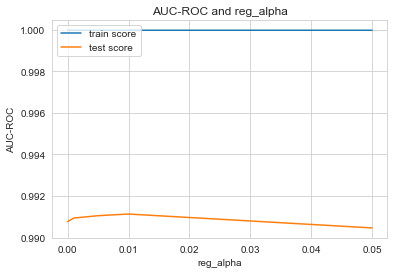

In [397]:
# plotting mean test and train scores with reg_alpha 
plt.figure(figsize= [6, 4])

plt.plot(cv_results['param_reg_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_reg_alpha'], cv_results['mean_test_score'])
plt.xlabel('reg_alpha')
plt.ylabel('AUC-ROC')
plt.title("AUC-ROC and reg_alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### XGBoost with hyperparameters tuning : Tuning learning rate

In [398]:
# GridSearchCV to find optimal learning rate

# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'learning_rate':[.05, .01, .005]}

# instantiate the model
xgb_model = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=5,
                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

# fit the model on training data
xgb = GridSearchCV(estimator = xgb_model, 
                    param_grid = parameters, 
                    cv = n_folds, 
                    return_train_score = True,
                    scoring = "roc_auc")
xgb.fit(X_train_ad, y_train_ad)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=0.8, gamma=0, gpu_id=None,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.1, max_delta_step=None, max_depth=5,
       min_child_weight=1,...eight=1, seed=27, subsample=0.8,
       tree_method=None, validate_parameters=False, verbosity=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.05, 0.01, 0.005]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [399]:
cv_results = pd.DataFrame(xgb.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      66.264312      0.546898         0.458621        0.003728   
1      67.359836      0.692568         0.434366        0.029411   
2      66.992868      0.167157         0.413700        0.007587   

  param_learning_rate                    params  split0_test_score  \
0                0.05   {'learning_rate': 0.05}           0.992064   
1                0.01   {'learning_rate': 0.01}           0.983527   
2               0.005  {'learning_rate': 0.005}           0.980374   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.990913           0.981306         0.988094        0.004823   
1           0.981724           0.974890         0.980047        0.003720   
2           0.977291           0.971631         0.976432        0.003621   

   rank_test_score  split0_train_score  split1_train_score  \
0                1            0.999617            0.999680   
1                2            0.994015            0.994974   
2                3            0.990163            0.992744   

   split2_train_score  mean_train_score  std_train_score  
0            0.999594          0.999630         0.000036  
1            0.996507          0.995165         0.001027  
2            0.994581          0.992496         0.001812

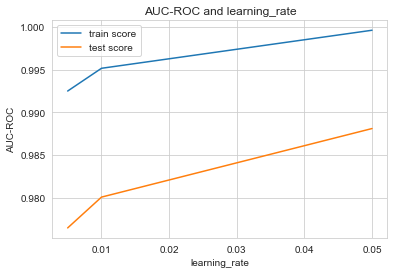

In [400]:
# plotting mean test and train scores with learning_rate 
plt.figure(figsize= [6, 4])

plt.plot(cv_results['param_learning_rate'], cv_results['mean_train_score'])
plt.plot(cv_results['param_learning_rate'], cv_results['mean_test_score'])
plt.xlabel('learning_rate')
plt.ylabel('AUC-ROC')
plt.title("AUC-ROC and learning_rate")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### XGBoost with hyperparameters tuning : Tuning n_estimators

In [401]:
# GridSearchCV to find optimal n_estimators

# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'n_estimators':range(200, 1000, 200)}

# instantiate the model
xgb_model = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=5,
                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

# fit the model on training data
xgb = GridSearchCV(estimator = xgb_model, 
                    param_grid = parameters, 
                    cv = n_folds, 
                    return_train_score = True,
                    scoring = "roc_auc")
xgb.fit(X_train_ad, y_train_ad)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=0.8, gamma=0, gpu_id=None,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.1, max_delta_step=None, max_depth=5,
       min_child_weight=1,...eight=1, seed=27, subsample=0.8,
       tree_method=None, validate_parameters=False, verbosity=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': range(200, 1000, 200)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [402]:
cv_results = pd.DataFrame(xgb.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
3     368.309075     14.069860         2.122289        0.130345   
2     267.284883      2.960964         1.592480        0.075078   
1     183.032683      1.182679         1.109892        0.031908   
0     104.975338      7.269060         0.688564        0.059216   

  param_n_estimators                 params  split0_test_score  \
3                800  {'n_estimators': 800}           0.993511   
2                600  {'n_estimators': 600}           0.993287   
1                400  {'n_estimators': 400}           0.993327   
0                200  {'n_estimators': 200}           0.992292   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
3           0.999352           0.999654         0.997506        0.002827   
2           0.999160           0.999576         0.997341        0.002872   
1           0.998743           0.999133         0.997068        0.002650   
0           0.995256           0.992439         0.993329        0.001364   

   rank_test_score  split0_train_score  split1_train_score  \
3                1            1.000000            1.000000   
2                2            1.000000            1.000000   
1                3            1.000000            1.000000   
0                4            0.999999            0.999995   

   split2_train_score  mean_train_score  std_train_score  
3            1.000000          1.000000     0.000000e+00  
2            1.000000          1.000000     0.000000e+00  
1            1.000000          1.000000     2.639695e-08  
0            0.999994          0.999996     2.276719e-06

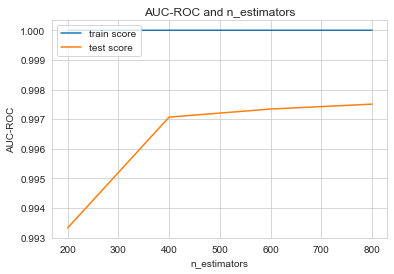

In [403]:
# plotting mean test and train scores with n_estimators 
plt.figure(figsize= [6, 4])

plt.plot(cv_results['param_n_estimators'], cv_results['mean_train_score'])
plt.plot(cv_results['param_n_estimators'], cv_results['mean_test_score'])
plt.xlabel('n_estimators')
plt.ylabel('AUC-ROC')
plt.title("AUC-ROC and n_estimators")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### Fitting the final model with the best parameters obtained from grid search

In [404]:
# model with optimal hyperparameters
xgb_final = XGBClassifier(learning_rate = 0.05,
                         n_estimators = 800,
                         max_depth = 9,
                         min_child_weight = 3,
                         gamma = 0.6,
                         subsample = 0.9,
                         colsample_bytree = 0.6,
                         reg_alpha = 0.01,
                         objective = 'binary:logistic',
                         nthread = 4,
                         scale_pos_weight = 1,
                         seed = 27)
xgb_final.fit(X_train_ad, y_train_ad)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.6, gamma=0.6, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.05, max_delta_step=0, max_depth=9,
       min_child_weight=3, missing=nan, monotone_constraints=None,
       n_estimators=800, n_jobs=4, nthread=4, num_parallel_tree=1,
       objective='binary:logistic', random_state=27, reg_alpha=0.01,
       reg_lambda=1, scale_pos_weight=1, seed=27, subsample=0.9,
       tree_method=None, validate_parameters=False, verbosity=None)

#### Predictions on the train set

In [405]:
y_train_pred = xgb_final.predict(X_train_ad)

#### Metrics Analysis on the train set for XGBoost

In [406]:
ModelMetrics(y_train_ad, y_train_pred)

********* Classification Report *********
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227431

   micro avg       1.00      1.00      1.00    454882
   macro avg       1.00      1.00      1.00    454882
weighted avg       1.00      1.00      1.00    454882

**** Confusion Matrix ****
[[227450      1]
 [     0 227431]]


Accuracy Score: 1.0
Sensitivity: 1.0
Specificity: 1.0
False Positive Rate: 0.0
Positive Predictive Value: 1.0
Negative Predictive Value: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


#### Plotting the ROC Curve for the Train Dataset

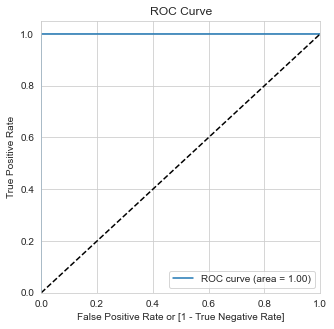

In [407]:
draw_roc(y_train_ad, y_train_pred)

### Metrics Analysis of the Classifiers on balanced Train data using the following techniques:

#### Random Oversampled data:
| -- | Precision | Recall | F1 - Score	 | ROC - AUC | 
| --- | --- | --- | --- | --- |
| Logistic Regression |  0.9442  | 0.9493   |  0.9467 | 0.95  |
| Decision Tree | 0.9989   | 1.0   | 0.9994  |  1.0 |
| Random Forest |  0.9977  |  1.0  |  0.9988 | 1.0  |
| XGBoost | 1.0   |   1.0 | 1.0  |  1.0 |

#### SMOTE balanced data:
| -- | Precision | Recall | F1 - Score	 | ROC - AUC | 
| --- | --- | --- | --- | --- |
| Logistic Regression |  0.9443  |  0.949  | 0.9466  |  0.95 |
| Decision Tree |  0.9934  |  0.9946  | 0.994  |  0.99 |
| Random Forest |  0.9975  |  0.9956  | 0.9965  |  1.0 |
| XGBoost |  1.0  | 1.0   | 1.0  | 1.0  |

#### ADASYN balanced data:
| -- | Precision | Recall | F1 - Score	 | ROC - AUC | 
| --- | --- | --- | --- | --- |
| Logistic Regression |  0.8839  | 0.891   | 0.8874  | 0.89  |
| Decision Tree | 0.9558   | 0.9918   |  0.9735 | 0.97  |
| Random Forest |  0.99  |   1.0 | 0.995  | 0.99  |
| XGBoost |  1.0  | 1.0   | 1.0  | 1.0  |


If we look at the metrics (Precision, Recall, F1 Score and ROC - AUC) of the different classifiers on the balanced train data, we can see that the better metrics are given by Decision Trees, Random Forests and XGBoost on the Random Oversampling, SMOTE and ADASYN balanced train sets. So we will evaluate all these models on test data and see how the models perform on test data.

### Testing the Models on the Test Data

#### Testing Decision Tree built on Random Oversampled Train Data on the Test Data

In [408]:
#initialise the model with optimum hyperparameters
tree_test = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=22, 
                                  min_samples_leaf=25,
                                  min_samples_split=5)  

tree_test.fit(X_train_ros, y_train_ros) # fit on the balanced dataset

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=22,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=25, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

#### Predictions on the test set

In [409]:
y_test_pred = tree_test.predict(X_test_pt)

#### Metrics Analysis on the test set for the best model

In [410]:
ModelMetrics(y_test, y_test_pred)

********* Classification Report *********
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.51      0.82      0.62        98

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.75      0.91      0.81     56962
weighted avg       1.00      1.00      1.00     56962

**** Confusion Matrix ****
[[56786    78]
 [   18    80]]


Accuracy Score: 0.9983
Sensitivity: 0.8163
Specificity: 0.9986
False Positive Rate: 0.0014
Positive Predictive Value: 0.5063
Negative Predictive Value: 0.9997
Precision: 0.5063
Recall: 0.8163
F1 Score: 0.625


#### Plotting the ROC Curve for the Test Dataset

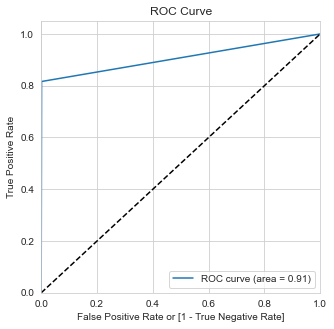

In [411]:
draw_roc(y_test, y_test_pred)

#### Testing Random Forest with Random Oversampling Balancing on the Test Data

In [412]:
#initialise the model with optimum hyperparameters
rf_test = RandomForestClassifier(bootstrap=True,
                                     max_depth=17,
                                     min_samples_leaf=100, 
                                     min_samples_split=200,
                                     max_features=24,
                                     n_estimators=100,
                                     criterion = "gini", 
                                    random_state = 100)  

rf_test.fit(X_train_ros, y_train_ros) # fit on the balanced dataset

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=17, max_features=24, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=200,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

#### Predictions on the test set

In [413]:
y_test_pred = rf_test.predict(X_test_pt)

#### Metrics Analysis on the test set for the best model

In [414]:
ModelMetrics(y_test, y_test_pred)

********* Classification Report *********
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.35      0.82      0.49        98

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.67      0.91      0.74     56962
weighted avg       1.00      1.00      1.00     56962

**** Confusion Matrix ****
[[56715   149]
 [   18    80]]


Accuracy Score: 0.9971
Sensitivity: 0.8163
Specificity: 0.9974
False Positive Rate: 0.0026
Positive Predictive Value: 0.3493
Negative Predictive Value: 0.9997
Precision: 0.3493
Recall: 0.8163
F1 Score: 0.4892


#### Plotting the ROC Curve for the Test Dataset

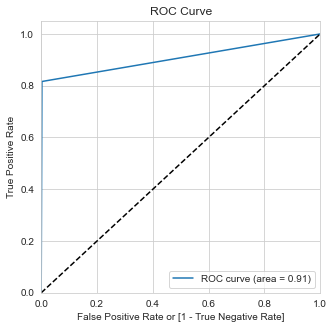

In [415]:
draw_roc(y_test, y_test_pred)

#### Testing XGBoost with Random Oversampling Balancing on the Test Data

In [416]:
#initialise the model with optimum hyperparameters
xgb_test = XGBClassifier(learning_rate = 0.05,
                         n_estimators = 600,
                         max_depth = 7,
                         min_child_weight = 1,
                         gamma = 0,
                         subsample = 0.8,
                         colsample_bytree = 0.8,
                         reg_alpha = 0.001,
                         objective = 'binary:logistic',
                         nthread = 4,
                         scale_pos_weight = 1,
                         seed = 27)  

xgb_test.fit(X_train_ros, y_train_ros) # fit on the balanced dataset

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.05, max_delta_step=0, max_depth=7,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=600, n_jobs=4, nthread=4, num_parallel_tree=1,
       objective='binary:logistic', random_state=27, reg_alpha=0.001,
       reg_lambda=1, scale_pos_weight=1, seed=27, subsample=0.8,
       tree_method=None, validate_parameters=False, verbosity=None)

#### Predictions on the test set

In [83]:
y_test_pred = xgb_test.predict(X_test_pt)

#### Metrics Analysis on the test set for the best model

In [84]:
ModelMetrics(y_test, y_test_pred)

********* Classification Report *********
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.83      0.88        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962

**** Confusion Matrix ****
[[56858     6]
 [   17    81]]


Accuracy Score: 0.9996
Sensitivity: 0.8265
Specificity: 0.9999
False Positive Rate: 0.0001
Positive Predictive Value: 0.931
Negative Predictive Value: 0.9997
Precision: 0.931
Recall: 0.8265
F1 Score: 0.8756


#### Plotting the ROC Curve for the Test Dataset

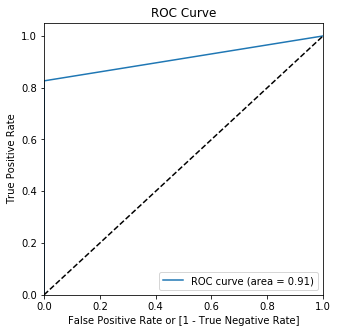

In [85]:
draw_roc(y_test, y_test_pred)

#### Testing Decision Tree with SMOTE Balancing on the Test Data

In [426]:
#initialise the model with optimum hyperparameters
tree_test = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=29, 
                                  min_samples_leaf=45,
                                  min_samples_split=145)  

tree_test.fit(X_train_sm, y_train_sm) # fit on the balanced dataset

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=29,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=45, min_samples_split=145,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

#### Predictions on the test set

In [427]:
y_test_pred = tree_test.predict(X_test_pt)

#### Metrics Analysis on the test set for the best model

In [428]:
ModelMetrics(y_test, y_test_pred)

********* Classification Report *********
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.15      0.79      0.26        98

   micro avg       0.99      0.99      0.99     56962
   macro avg       0.58      0.89      0.63     56962
weighted avg       1.00      0.99      0.99     56962

**** Confusion Matrix ****
[[56442   422]
 [   21    77]]


Accuracy Score: 0.9922
Sensitivity: 0.7857
Specificity: 0.9926
False Positive Rate: 0.0074
Positive Predictive Value: 0.1543
Negative Predictive Value: 0.9996
Precision: 0.1543
Recall: 0.7857
F1 Score: 0.2579


#### Plotting the ROC Curve for the Test Dataset

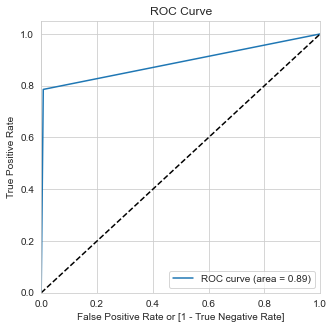

In [429]:
draw_roc(y_test, y_test_pred)

#### Testing Random Forest with SMOTE Balancing on the Test Data

In [430]:
#initialise the model with optimum hyperparameters
rf_test = RandomForestClassifier(bootstrap=True,
                                     max_depth=17,
                                     min_samples_leaf=100, 
                                     min_samples_split=200,
                                     max_features=20,
                                     n_estimators=100,
                                     criterion = "gini", 
                                    random_state = 100)  

rf_test.fit(X_train_sm, y_train_sm) # fit on the balanced dataset

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=17, max_features=20, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=200,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

#### Predictions on the test set

In [431]:
y_test_pred = rf_test.predict(X_test_pt)

#### Metrics Analysis on the test set for the best model

In [432]:
ModelMetrics(y_test, y_test_pred)

********* Classification Report *********
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.33      0.84      0.48        98

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.67      0.92      0.74     56962
weighted avg       1.00      1.00      1.00     56962

**** Confusion Matrix ****
[[56699   165]
 [   16    82]]


Accuracy Score: 0.9968
Sensitivity: 0.8367
Specificity: 0.9971
False Positive Rate: 0.0029
Positive Predictive Value: 0.332
Negative Predictive Value: 0.9997
Precision: 0.332
Recall: 0.8367
F1 Score: 0.4754


#### Plotting the ROC Curve for the Test Dataset

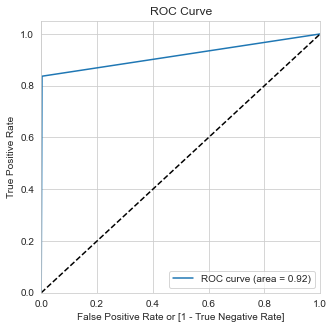

In [433]:
draw_roc(y_test, y_test_pred)

#### Testing XGBoost with SMOTE Balancing on the Test Data

In [434]:
#initialise the model with optimum hyperparameters
xgb_test = XGBClassifier(learning_rate = 0.05,
                         n_estimators = 800,
                         max_depth = 9,
                         min_child_weight = 1,
                         gamma = 0.2,
                         subsample = 0.8,
                         colsample_bytree = 0.9,
                         reg_alpha = 0.01,
                         objective = 'binary:logistic',
                         nthread = 4,
                         scale_pos_weight = 1,
                         seed = 27)  

xgb_test.fit(X_train_sm, y_train_sm) # fit on the balanced dataset

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.9, gamma=0.2, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.05, max_delta_step=0, max_depth=9,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=800, n_jobs=4, nthread=4, num_parallel_tree=1,
       objective='binary:logistic', random_state=27, reg_alpha=0.01,
       reg_lambda=1, scale_pos_weight=1, seed=27, subsample=0.8,
       tree_method=None, validate_parameters=False, verbosity=None)

#### Predictions on the test set

In [66]:
y_test_pred = xgb_test.predict(X_test_pt)

#### Metrics Analysis on the test set for the best model

In [67]:
ModelMetrics(y_test, y_test_pred)

********* Classification Report *********
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.83      0.83        98

    accuracy                           1.00     56962
   macro avg       0.91      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962

**** Confusion Matrix ****
[[56847    17]
 [   17    81]]


Accuracy Score: 0.9994
Sensitivity: 0.8265
Specificity: 0.9997
False Positive Rate: 0.0003
Positive Predictive Value: 0.8265
Negative Predictive Value: 0.9997
Precision: 0.8265
Recall: 0.8265
F1 Score: 0.8265


#### Plotting the ROC Curve for the Test Dataset

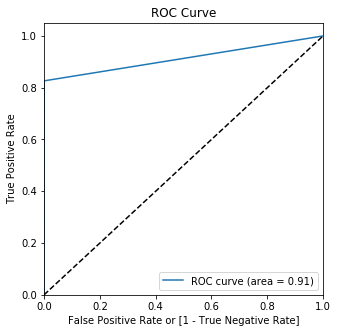

In [68]:
draw_roc(y_test, y_test_pred)

#### Testing Decision Tree with ADASYN Balancing on the Test Data

In [435]:
#initialise the model with optimum hyperparameters
tree_test = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=11, 
                                  min_samples_leaf=185,
                                  min_samples_split=165)  

tree_test.fit(X_train_ad, y_train_ad) # fit on the balanced dataset

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=11,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=185, min_samples_split=165,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

#### Predictions on the test set

In [436]:
y_test_pred = tree_test.predict(X_test_pt)

#### Metrics Analysis on the test set for the best model

In [437]:
ModelMetrics(y_test, y_test_pred)

********* Classification Report *********
              precision    recall  f1-score   support

           0       1.00      0.95      0.98     56864
           1       0.03      0.85      0.06        98

   micro avg       0.95      0.95      0.95     56962
   macro avg       0.52      0.90      0.52     56962
weighted avg       1.00      0.95      0.97     56962

**** Confusion Matrix ****
[[54233  2631]
 [   15    83]]


Accuracy Score: 0.9535
Sensitivity: 0.8469
Specificity: 0.9537
False Positive Rate: 0.0463
Positive Predictive Value: 0.0306
Negative Predictive Value: 0.9997
Precision: 0.0306
Recall: 0.8469
F1 Score: 0.0591


#### Plotting the ROC Curve for the Test Dataset

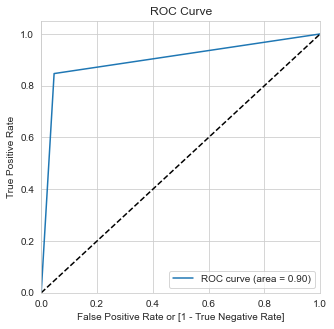

In [438]:
draw_roc(y_test, y_test_pred)

#### Testing Random Forest with ADASYN Balancing on the Test Data

In [439]:
#initialise the model with optimum hyperparameters
rf_test = RandomForestClassifier(bootstrap=True,
                                     max_depth=12,
                                     min_samples_leaf=150, 
                                     min_samples_split=200,
                                     max_features=14,
                                     n_estimators=200,
                                     criterion = "gini", 
                                    random_state = 100)  

rf_test.fit(X_train_ad, y_train_ad) # fit on the balanced dataset

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features=14, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=150, min_samples_split=200,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

#### Predictions on the test set

In [440]:
y_test_pred = rf_test.predict(X_test_pt)

#### Metrics Analysis on the test set for the best model

In [441]:
ModelMetrics(y_test, y_test_pred)

********* Classification Report *********
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.13      0.85      0.22        98

   micro avg       0.99      0.99      0.99     56962
   macro avg       0.56      0.92      0.61     56962
weighted avg       1.00      0.99      0.99     56962

**** Confusion Matrix ****
[[56298   566]
 [   15    83]]


Accuracy Score: 0.9898
Sensitivity: 0.8469
Specificity: 0.99
False Positive Rate: 0.01
Positive Predictive Value: 0.1279
Negative Predictive Value: 0.9997
Precision: 0.1279
Recall: 0.8469
F1 Score: 0.2222


#### Plotting the ROC Curve for the Test Dataset

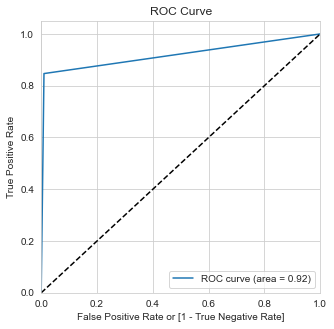

In [442]:
draw_roc(y_test, y_test_pred)

#### Testing XGBoost with ADASYN Balancing on the Test Data

In [443]:
#initialise the model with optimum hyperparameters
xgb_test = XGBClassifier(learning_rate = 0.05,
                         n_estimators = 800,
                         max_depth = 9,
                         min_child_weight = 3,
                         gamma = 0.6,
                         subsample = 0.9,
                         colsample_bytree = 0.6,
                         reg_alpha = 0.01,
                         objective = 'binary:logistic',
                         nthread = 4,
                         scale_pos_weight = 1,
                         seed = 27)  

xgb_test.fit(X_train_ad, y_train_ad) # fit on the balanced dataset

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.6, gamma=0.6, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.05, max_delta_step=0, max_depth=9,
       min_child_weight=3, missing=nan, monotone_constraints=None,
       n_estimators=800, n_jobs=4, nthread=4, num_parallel_tree=1,
       objective='binary:logistic', random_state=27, reg_alpha=0.01,
       reg_lambda=1, scale_pos_weight=1, seed=27, subsample=0.9,
       tree_method=None, validate_parameters=False, verbosity=None)

#### Predictions on the test set

In [21]:
y_test_pred = xgb_test.predict(X_test_pt)

#### Metrics Analysis on the test set for the best model

In [22]:
ModelMetrics(y_test, y_test_pred)

********* Classification Report *********
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.79      0.82      0.80        98

    accuracy                           1.00     56962
   macro avg       0.90      0.91      0.90     56962
weighted avg       1.00      1.00      1.00     56962

**** Confusion Matrix ****
[[56843    21]
 [   18    80]]


Accuracy Score: 0.9993
Sensitivity: 0.8163
Specificity: 0.9996
False Positive Rate: 0.0004
Positive Predictive Value: 0.7921
Negative Predictive Value: 0.9997
Precision: 0.7921
Recall: 0.8163
F1 Score: 0.804


#### Plotting the ROC Curve for the Test Dataset

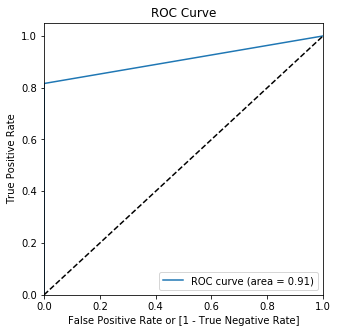

In [27]:
draw_roc(y_test, y_test_pred)

### Metrics of the Classification models on the test data using the model tuned and trained on the balanced datasets:

#### Random Over Sampling:

| -- |  Precision | Recall | F1 - Score	 | ROC - AUC | 
| --- | --- | --- | --- | --- |
| Decision Tree |  0.5063   | 0.8163   | 0.625  | 0.91 |
| Random Forest |   0.3493  |  0.8163  |  0.4892 | 0.91  |
| XGBoost |  0.931   |   0.8265 | 0.8756  |  0.91 |

#### SMOTE:

| -- |  Precision | Recall | F1 - Score	 | ROC - AUC | 
| --- | --- | --- | --- | --- |
| Decision Tree |  0.1543   | 0.7857   | 0.2579  | 0.89 |
| Random Forest |   0.332  |  0.8367  |  0.4754 | 0.92  |
| XGBoost |  0.8265   |   0.8265 | 0.8265 |  0.91 |

#### ADASYN:

| -- |  Precision | Recall | F1 - Score	 | ROC - AUC | 
| --- | --- | --- | --- | --- |
| Decision Tree |  0.0306   | 0.8469   | 0.0591  | 0.90 |
| Random Forest |   0.1279  |  0.8469  |  0.2222 | 0.92  |
| XGBoost |  0.7921   |   0.8163 | 0.804 |  0.91 |

Looking at the metrics (Precision, Recall, F1 Score and ROC - AUC) of the different classifiers on the test data, we can see that the better metrics are given by XGBoost using the Random Oversampling Balancing technique. So we will proceed with this model to find the optimal threshold and our final metrics.

### Selecting the oversampling method which shows the best result on a model

Random Over Sampling method gives better metrics on XGBoost Classifier for the given Data

Here, we will
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [446]:
#initialise the model with optimum hyperparameters
clf = XGBClassifier(learning_rate = 0.05,
                         n_estimators = 600,
                         max_depth = 7,
                         min_child_weight = 1,
                         gamma = 0,
                         subsample = 0.8,
                         colsample_bytree = 0.8,
                         reg_alpha = 0.001,
                         objective = 'binary:logistic',
                         nthread = 4,
                         scale_pos_weight = 1,
                         seed = 27)  

clf.fit(X_train_ros, y_train_ros) # fit on the balanced dataset

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.05, max_delta_step=0, max_depth=7,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=600, n_jobs=4, nthread=4, num_parallel_tree=1,
       objective='binary:logistic', random_state=27, reg_alpha=0.001,
       reg_lambda=1, scale_pos_weight=1, seed=27, subsample=0.8,
       tree_method=None, validate_parameters=False, verbosity=None)

#### Predictions on the test set

In [78]:
y_test_pred = clf.predict(X_test_pt)

#### Metrics Analysis on the test set for the best model

In [79]:
ModelMetrics(y_test, y_test_pred)

********* Classification Report *********
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.83      0.88        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962

**** Confusion Matrix ****
[[56858     6]
 [   17    81]]


Accuracy Score: 0.9996
Sensitivity: 0.8265
Specificity: 0.9999
False Positive Rate: 0.0001
Positive Predictive Value: 0.931
Negative Predictive Value: 0.9997
Precision: 0.931
Recall: 0.8265
F1 Score: 0.8756


#### Plotting the ROC Curve for the Test Dataset

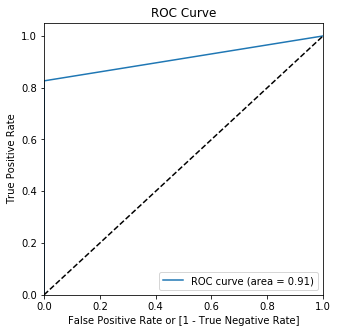

In [80]:
draw_roc(y_test, y_test_pred)

#### Finding optimal threshold

In [83]:
# Making predictions
y_test_pred = clf.predict_proba(X_test_pt)

# Converting y_test_pred to a dataframe
y_test_pred_df = pd.DataFrame(y_test_pred)

# Converting to column dataframe
y_test_pred_1 = y_test_pred_df.iloc[:,[1]]

y_test_pred_1.head()

1
0  0.000009
1  0.000001
2  0.000003
3  0.000002
4  0.000001

In [84]:
# Converting y_train to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

Class
248750      0
161573      0
65893       0
12836       0
132224      0

In [85]:
# Putting TransID to index
y_test_df['TransID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_test_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_train_df and y_pred_1
y_test_pred_final = pd.concat([y_test_df,y_test_pred_1],axis=1)

# Renaming the column 
y_test_pred_final= y_test_pred_final.rename(columns={ 1 : 'Fraud_Prob'})

# Rearranging the columns
y_test_pred_final = y_test_pred_final.reindex(['TransID','Class','Fraud_Prob'], axis=1)

y_test_pred_final.head()

TransID  Class  Fraud_Prob
0   248750      0    0.000009
1   161573      0    0.000001
2    65893      0    0.000003
3    12836      0    0.000002
4   132224      0    0.000001

In [86]:
# Creating new column 'predicted' with 1 if Fraud_Prob > 0.5 else 0
y_test_pred_final['predicted'] = y_test_pred_final.Fraud_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_test_pred_final.head()

TransID  Class  Fraud_Prob  predicted
0   248750      0    0.000009          0
1   161573      0    0.000001          0
2    65893      0    0.000003          0
3    12836      0    0.000002          0
4   132224      0    0.000001          0

#### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced accuracy, sensitivity and specificity

In [87]:
y_test_pred_final.head()

TransID  Class  Fraud_Prob  predicted
0   248750      0    0.000009          0
1   161573      0    0.000001          0
2    65893      0    0.000003          0
3    12836      0    0.000002          0
4   132224      0    0.000001          0

In [88]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_test_pred_final[i]= y_test_pred_final.Fraud_Prob.map(lambda x: 1 if x > i else 0)
y_test_pred_final.head()

TransID  Class  Fraud_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0   248750      0    0.000009          0    1    0    0    0    0    0    0   
1   161573      0    0.000001          0    1    0    0    0    0    0    0   
2    65893      0    0.000003          0    1    0    0    0    0    0    0   
3    12836      0    0.000002          0    1    0    0    0    0    0    0   
4   132224      0    0.000001          0    1    0    0    0    0    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0

In [89]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in num:
    cm1 = confusion_matrix(y_test_pred_final.Class, y_test_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.001720  1.000000  0.000000
0.1   0.1  0.999421  0.826531  0.999719
0.2   0.2  0.999491  0.826531  0.999789
0.3   0.3  0.999508  0.826531  0.999807
0.4   0.4  0.999579  0.826531  0.999877
0.5   0.5  0.999596  0.826531  0.999894
0.6   0.6  0.999614  0.826531  0.999912
0.7   0.7  0.999614  0.826531  0.999912
0.8   0.8  0.999614  0.816327  0.999930
0.9   0.9  0.999614  0.806122  0.999947


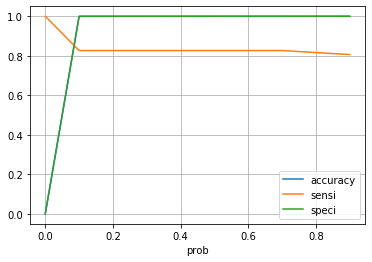

In [90]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], grid = True)
plt.show()

From the curve above, we will take 0.1 as the optimum cutoff probability.

In [95]:
y_test_pred_final['final_predicted'] = y_test_pred_final.Fraud_Prob.map( lambda x: 1 if x > 0.1 else 0)

y_test_pred_final.head()

TransID  Class  Fraud_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0   248750      0    0.000009          0    1    0    0    0    0    0    0   
1   161573      0    0.000001          0    1    0    0    0    0    0    0   
2    65893      0    0.000003          0    1    0    0    0    0    0    0   
3    12836      0    0.000002          0    1    0    0    0    0    0    0   
4   132224      0    0.000001          0    1    0    0    0    0    0    0   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    0    0    0                0  
2    0    0    0                0  
3    0    0    0                0  
4    0    0    0                0

#### Metrics Analysis on the test set for XGBoost Model

In [96]:
ModelMetrics(y_test_pred_final.Class, y_test_pred_final.final_predicted)

********* Classification Report *********
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.83      0.83        98

    accuracy                           1.00     56962
   macro avg       0.92      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962

**** Confusion Matrix ****
[[56848    16]
 [   17    81]]


Accuracy Score: 0.9994
Sensitivity: 0.8265
Specificity: 0.9997
False Positive Rate: 0.0003
Positive Predictive Value: 0.8351
Negative Predictive Value: 0.9997
Precision: 0.8351
Recall: 0.8265
F1 Score: 0.8308


#### Plotting the ROC Curve for the Test Dataset

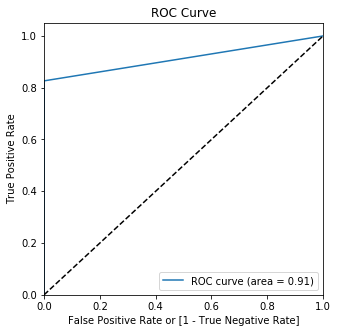

In [97]:
draw_roc(y_test_pred_final.Class, y_test_pred_final.final_predicted)

#### Print the FPR,TPR & select the best threshold from the roc curve

In [98]:
print('Train auc =', metrics.roc_auc_score(y_test_pred_final.Class, y_test_pred_final.final_predicted))
fpr, tpr, thresholds = metrics.roc_curve(y_test_pred_final.Class, y_test_pred_final.final_predicted)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Train auc = 0.913124619572083
1


### Printing the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 10
3rd Top var = 4


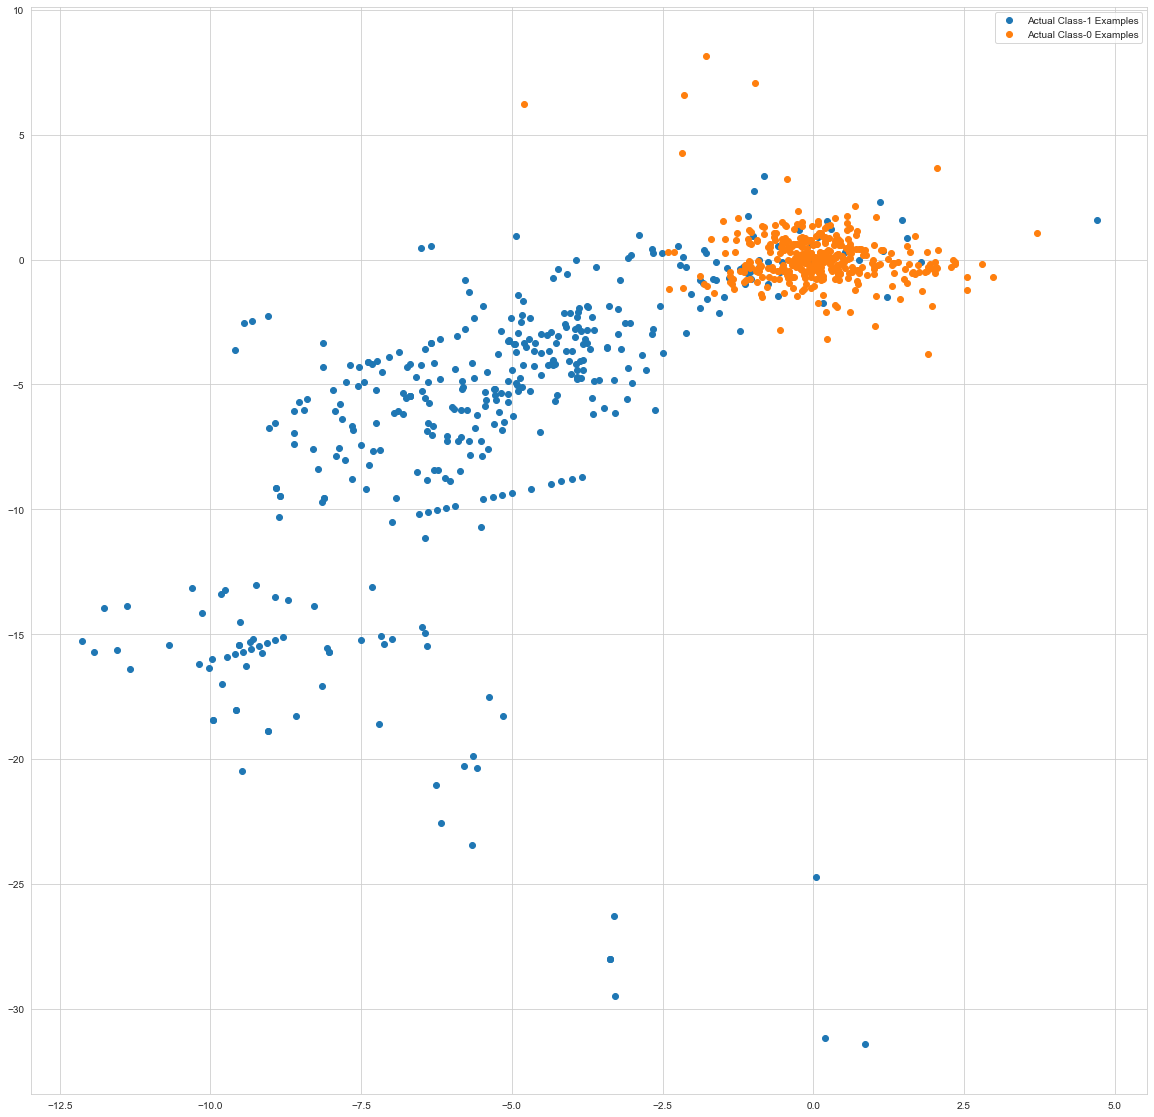

In [447]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train_ad[np.where(y_train==1.0)]
X_train_0 = X_train_ad[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Conclusion

The purpose of the Credit Card Fraud Detection case study was to predict a fraudalent transaction. Here we were supposed to analyse a given transaction and predict how likely that transaction was to be a fraudalent transaction. To this end, we built predictive models using the following machine learning algorithms:
1. Logisitic Regression
2. Decision Trees
3. Random Forest
4. XGBoost

After balancing the highly imbalanced Train Data using the balancing techniques, and after finding the optimal hyperparameters, we could arrive at the evaluation metrics. 

On analyzing the evalution metrics, we could conclude that XGBoost Classifier built over Random Over Sampled Train Data could predict the fradulent transactions to greater extent.

## Recommendations

Thus the selected model when deployed can learn and recognize new patterns of fraud transactions that may have been missed by any other approaches. Thereby saving huge sums of money and customer satisfaction.

This can drastically improve speed of detection, scalability in future and demonstrates greater efficiency.